In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    # You can set another font here or leave this to use the default font
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\MIRCA-OS"
base_dir_2000 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\Validation2"

# Crop names
crops = [ "Cotton","Maize", "Soybeans", "Wheat"]

# Create a plot for each crop
# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters and calculate percentages for the bar chart
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Plot map
    # Plot map with black background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]  # Green for agreement
    combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
    combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
    # Plot map
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent1)
    ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
    ax_map.set_frame_on(False) 
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Removing x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
        colors = ['green', 'blue', 'red']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
    # Plot bar chart
    labels = ['Agreement', 'MIRCA_OS Only', 'MIRCA_2000 Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
    ax_bar.set_title('Percentage of Agreement/Disagreement')
    ax_bar.set_ylabel('Percentage (%)')
    ax_bar.set_ylim(0, 100)
    for index, value in enumerate(percentages):
        ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
    plt.tight_layout()
#     plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\irr_{crop}_MIRCA2000.png', bbox_inches='tight')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches

# The functions read_raster, compare_rasters, get_extent, and clean_raster_data remain unchanged
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    """Calculate the extent of a raster dataset."""
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    """
    Cleans raster data by replacing extreme negative values with 0.
    
    Parameters:
    - raster_data: The raster data array.
    - extreme_value_threshold: Values below this threshold are considered missing/extreme.
    
    Returns:
    - Cleaned raster data array.
    """
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data
# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\MIRCA-OS"
base_dir_2000 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\Validation2"

# Crop names
crops = ["Cotton", "Maize", "Soybeans", "Wheat"]

# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='w')
    
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')
    
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)
    
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]
    combined_rgb[mirca_os_only] = [1, 0, 0]
    combined_rgb[mirca_2000_only] = [0, 0, 1]
    
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax.imshow(combined_rgb, extent=extent1)
    ax.set_title(crop, fontsize=14)
    
    # Overlay the shapefile
    world.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    ax.axis('off')
    
    # Only add the legend to the last plot
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
        colors = ['green', 'red', 'blue']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()


In [ ]:
import os
import rasterio
from rasterio.enums import Resampling

# Define the input and output directories
input_directory = "E:\\Crop Scape\\Corn\\corn"
output_directory = "E:\\Crop Scape\\Corn\\corn only"

# Create the output directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop over each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.tif'):  # Check for TIFF files
        # Construct the full file path
        file_path = os.path.join(input_directory, filename)
        # Open the raster file
        with rasterio.open(file_path) as src:
            # Read the first band (assuming pixel values are in the first band)
            band1 = src.read(1)
            # Create a mask for pixels equal to 1
            mask = band1 == 1
            # Apply the mask to set pixels not equal to 1 to 0
            band1[~mask] = 0

            # Define the output file path
            output_file_path = os.path.join(output_directory, f'extracted_1_{filename}')
            
            # Copy the metadata
            out_meta = src.meta.copy()
            # Update the metadata to reflect the number of layers
            out_meta.update({"count": 1})
            
            # Write the output file with the extracted pixel values
            with rasterio.open(output_file_path, 'w', **out_meta) as out_raster:
                out_raster.write(band1, 1)
        
        print(f'File saved: {output_file_path}')


In [4]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.warp import reproject, Resampling
import numpy as np
# Define the directory containing the TIFF files to be merged
input_directory = "E:\\Crop Scape\\Corn\\corn only"
# Define the directory where the merged file will be saved
merged_output_path = "E:\\Crop Scape\\Corn\\Merged\\merged.tif"
# Define the directory where the resampled file will be saved
resampled_output_path = "E:\\Crop Scape\\Corn\\Resampled\\Corn_res.tif"
target_resolution = (0.083333, 0.083333)
# List to hold open raster file objects
src_files_to_mosaic = []

# Open each TIFF file and add it to the list
for filename in os.listdir(input_directory):
    if filename.endswith('.tif'):
        file_path = os.path.join(input_directory, filename)
        src = rasterio.open(file_path)
        src_files_to_mosaic.append(src)

# Merge TIFF files
mosaic, out_trans = merge(src_files_to_mosaic)

# Copy the metadata of one of the source files
out_meta = src_files_to_mosaic[0].meta.copy()

# Update the metadata with the new merged array shape
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})

# Write the merged raster to file
with rasterio.open(merged_output_path, 'w', **out_meta) as dest:
    dest.write(mosaic)

# Define target CRS if different from source files
target_crs = src_files_to_mosaic[0].crs

# Define the target resolution
target_resolution = (0.083333, 0.083333)  # For 5 arc-minutes resolution

# Calculate the target transform and dimensions for the desired resolution
# Note: 'mosaic' is the merged raster, and 'out_trans' is its transform
target_transform, width, height = rasterio.warp.calculate_default_transform(
    src_crs=src_files_to_mosaic[0].crs, dst_crs=target_crs,
    width=mosaic.shape[2], height=mosaic.shape[1],
    left=out_trans.c, bottom=out_trans.f + out_trans.e * mosaic.shape[1],
    right=out_trans.c + out_trans.a * mosaic.shape[2], top=out_trans.f,
    dst_width=None, dst_height=None, resolution=target_resolution
)


# Update metadata with the new transform, width, and height
out_meta.update({
    "transform": target_transform,
    "width": width,
    "height": height
})

# Perform the resampling
resampled_mosaic = np.empty(shape=(1, height, width), dtype=mosaic.dtype)
reproject(
    source=mosaic,
    destination=resampled_mosaic,
    src_transform=out_trans,
    src_crs=target_crs,
    dst_transform=target_transform,
    dst_crs=target_crs,
    resampling=Resampling.sum  # Use average resampling
)

# Write the resampled raster to file
with rasterio.open(resampled_output_path, 'w', **out_meta) as dest:
    dest.write(resampled_mosaic)

# Close the source files
for src in src_files_to_mosaic:
    src.close()


MemoryError: Unable to allocate 1.71 PiB for an array with shape (1, 34748419, 55372182) and data type uint8

In [1]:
import os
import rasterio
from rasterio.merge import merge
from rasterio import shutil as rio_shutil

def mosaic_rasters(input_folder, output_file):
    # Get a list of all raster files in the input folder
    raster_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.tif')]

    # Open each raster file and read its metadata
    src_files_to_mosaic = []
    for raster_file in raster_files:
        src = rasterio.open(raster_file)
        src_files_to_mosaic.append(src)

    # Perform the mosaic
    mosaic, out_trans = merge(src_files_to_mosaic)

    # Update metadata for the output file
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                     "height": mosaic.shape[1],
                     "width": mosaic.shape[2],
                     "transform": out_trans})

    # Write the mosaic to the output file
    with rasterio.open(output_file, "w", **out_meta) as dest:
        dest.write(mosaic)

    # Close all source files
    for src in src_files_to_mosaic:
        src.close()

if __name__ == "__main__":
    input_folder = "E:\\Crop Scape\\Corn\\corn only"
    output_file = "E:\\Crop Scape\\Corn\\Temp"
    mosaic_rasters(input_folder, output_file)


RasterioIOError: Attempt to create new tiff file 'E:/Crop Scape/Corn/Temp' failed: Permission denied

In [ ]:
from osgeo import gdal

def resample_raster(input_raster_path, output_raster_path, target_cell_size, resampling_method='near'):
    """
    Resample a raster to a new cell size using GDAL.

    Parameters:
    input_raster_path (str): Path to the input raster.
    output_raster_path (str): Path to the output resampled raster.
    target_cell_size (float): The target cell size for resampling.
    resampling_method (str): Resampling method (e.g., 'near', 'bilinear', 'cubic', etc.)
    """
    input_raster = gdal.Open(input_raster_path)
    input_transform = input_raster.GetGeoTransform()

    # Calculate the new geotransform
    new_x_size = input_transform[1] * (input_raster.RasterXSize / target_cell_size)
    new_y_size = input_transform[5] * (input_raster.RasterYSize / target_cell_size)

    # Create the output raster
    output_raster = gdal.GetDriverByName('GTiff').Create(output_raster_path, int(new_x_size), int(new_y_size),
                                                         input_raster.RasterCount, input_raster.GetRasterBand(1).DataType)
    output_raster.SetGeoTransform(
        (input_transform[0], input_transform[1] * input_raster.RasterXSize / new_x_size, 0,
         input_transform[3], 0, input_transform[5] * input_raster.RasterYSize / new_y_size)
    )

    # Perform the resampling
    resampling_methods = {
        'near': gdal.GRA_NearestNeighbour,
        'bilinear': gdal.GRA_Bilinear,
        'cubic': gdal.GRA_Cubic,
        'cubicspline': gdal.GRA_CubicSpline,
        'lanczos': gdal.GRA_Lanczos,
        'average': gdal.GRA_Average,
        'mode': gdal.GRA_Mode
    }

    gdal.ReprojectImage(input_raster, output_raster, None, None, resampling_methods[resampling_method])
    output_raster.FlushCache()

# Example usage
input_raster_path = 'path/to/your/input/raster.tif'
output_raster_path = 'path/to/your/output/resampled_raster.tif'
target_cell_size = 10  # The target cell size
resample_raster(input_raster_path, output_raster_path, target_cell_size, 'bilinear')


In [8]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np

# Paths to your datasets
corn_map_path = "E:\\Crop Scape\\Resampled\\Corn_CS.tif"
corine_map_path = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\New Folder\\Mine\\Cotton.tif"
corn_map_path = "E:\\Crop Scape\\Resampled\\alternative"
output_raster_path = os.path.join(output_dir, "corn_resampled.tif")
# Load the corn map
with rasterio.open(corn_map_path) as corn_src:
    corn_map = corn_src.read(1)  # Assuming the data is in the first band
    corn_affine = corn_src.transform
    corn_crs = corn_src.crs

# Load the CORINE map
with rasterio.open(corine_map_path) as corine_src:
    corine_map = corine_src.read(1)  # Assuming the data is in the first band
    corine_affine = corine_src.transform
    corine_crs = corine_src.crs

# Check if CRS is the same, if not, reproject CORINE to match the corn map
if corine_crs != corn_crs:
    corine_map_reprojected = np.empty_like(corn_map)
    reproject(
        source=corine_map,
        destination=corine_map_reprojected,
        src_transform=corine_affine,
        src_crs=corine_crs,
        dst_transform=corn_affine,
        dst_crs=corn_crs,
        resampling=Resampling.nearest
    )
else:
    corine_map_reprojected = corine_map

# Update corn map pixel values based on the condition
for i in range(corn_map.shape[0]):
    for j in range(corn_map.shape[1]):
        # If either the corn map or the resampled CORINE map has a zero value, set the corn map's pixel to 0
        if corn_map[i, j] == 0 or corine_map_reprojected[i, j] == 0:
            corn_map[i, j] = 0

# Save the modified corn map
output_path = "E:\\Crop Scape\\Resampled\\alternatve\\Corn.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=corn_map.shape[0],
    width=corn_map.shape[1],
    count=1,
    dtype=corn_map.dtype,
    crs=corn_crs,
    transform=corn_affine,
) as dst:
    dst.write(corn_map, 1)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\endal\AppData\Local\Temp\ipykernel_2816\1395161239.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\endal\anaconda3\envs\mirca_

In [15]:
import os
import rasterio
import numpy as np

# Path to the folder containing crop maps and the path to the irrigated area map
crop_maps_folder = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Ah"
irrigated_area_map_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\2015_2.tif"

# Ensure the folder for the modified maps exists
modified_maps_folder = os.path.join(crop_maps_folder, "modified_maps")
if not os.path.exists(modified_maps_folder):
    os.makedirs(modified_maps_folder)

# Load the irrigated area map
with rasterio.open(irrigated_area_map_path) as irrigated_area_map:
    irrigated_area_data = irrigated_area_map.read(1)  # Read the first band

# Loop through each file in the crop maps folder
for filename in os.listdir(crop_maps_folder):
    if filename.endswith(".tif"):  # Check if the file is a TIF
        crop_map_path = os.path.join(crop_maps_folder, filename)
#         print(filename)
        # Open the crop map
        with rasterio.open(crop_map_path) as crop_map:
            crop_map_data = crop_map.read(1)  # Read the first band

            # Apply the condition: keep the crop value if both crop and irrigated pixels are > 0, else set to 0
            modified_crop_data = np.where((crop_map_data > 0) & (irrigated_area_data > 0), crop_map_data, 0)

            # Define the output path for the modified crop map
            output_folder="D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\Filtered"
            output_path = os.path.join(output_folder, f"{filename}")

            # Save the modified crop map
            with rasterio.open(
                output_path,
                'w',
                driver='GTiff',
                height=crop_map_data.shape[0],
                width=crop_map_data.shape[1],
                count=1,
                dtype=crop_map_data.dtype,
                crs=crop_map.crs,
                transform=crop_map.transform,
            ) as dst:
                dst.write(modified_crop_data, 1)


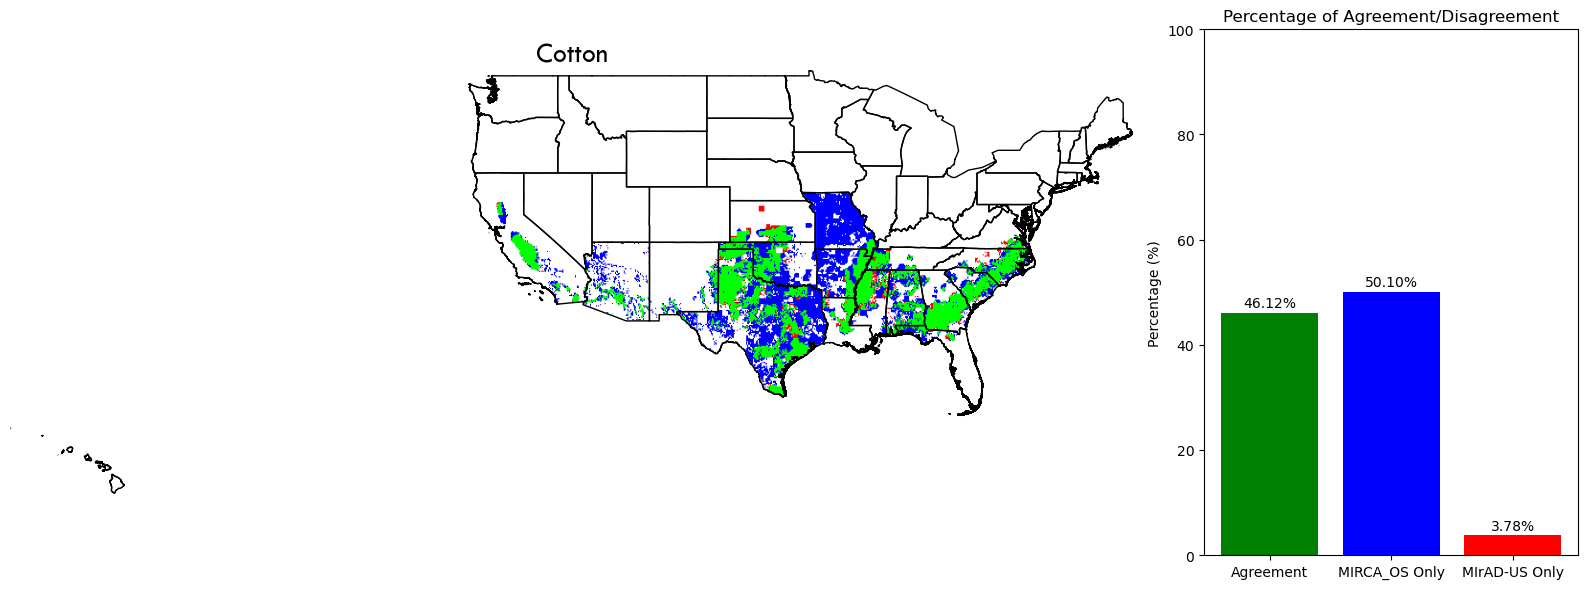

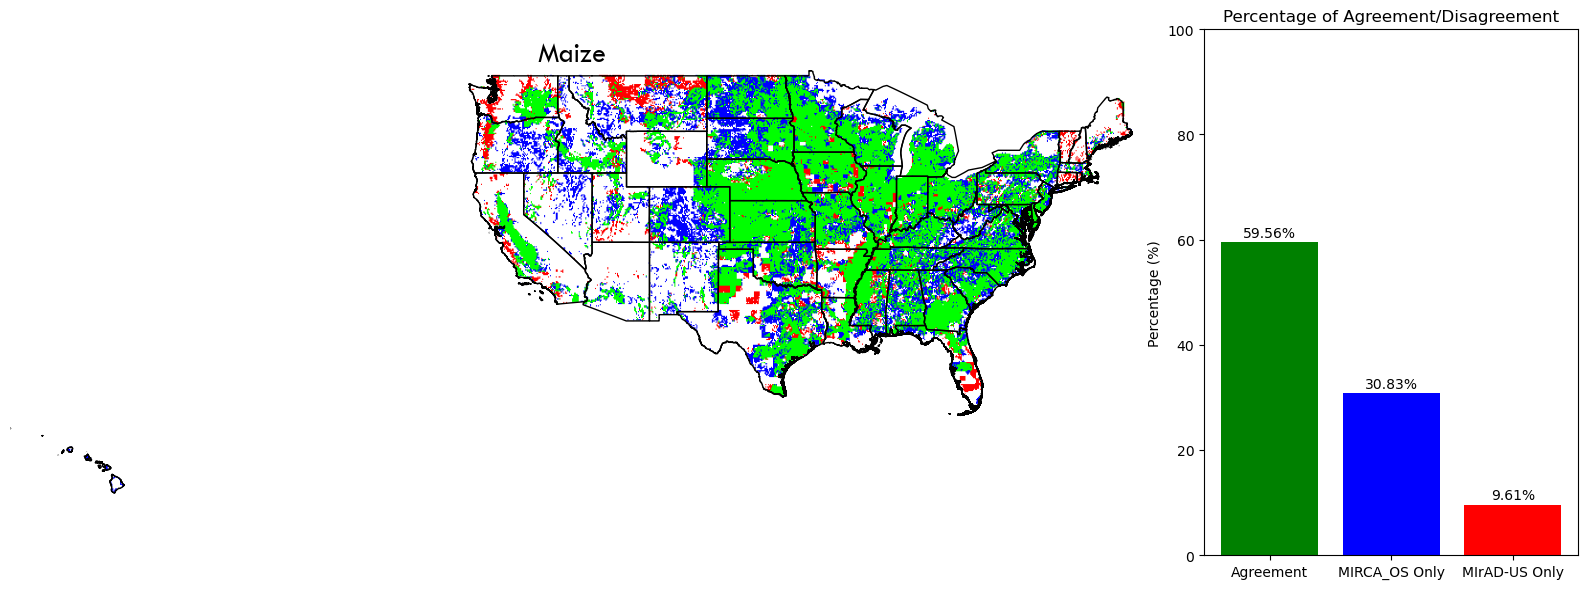

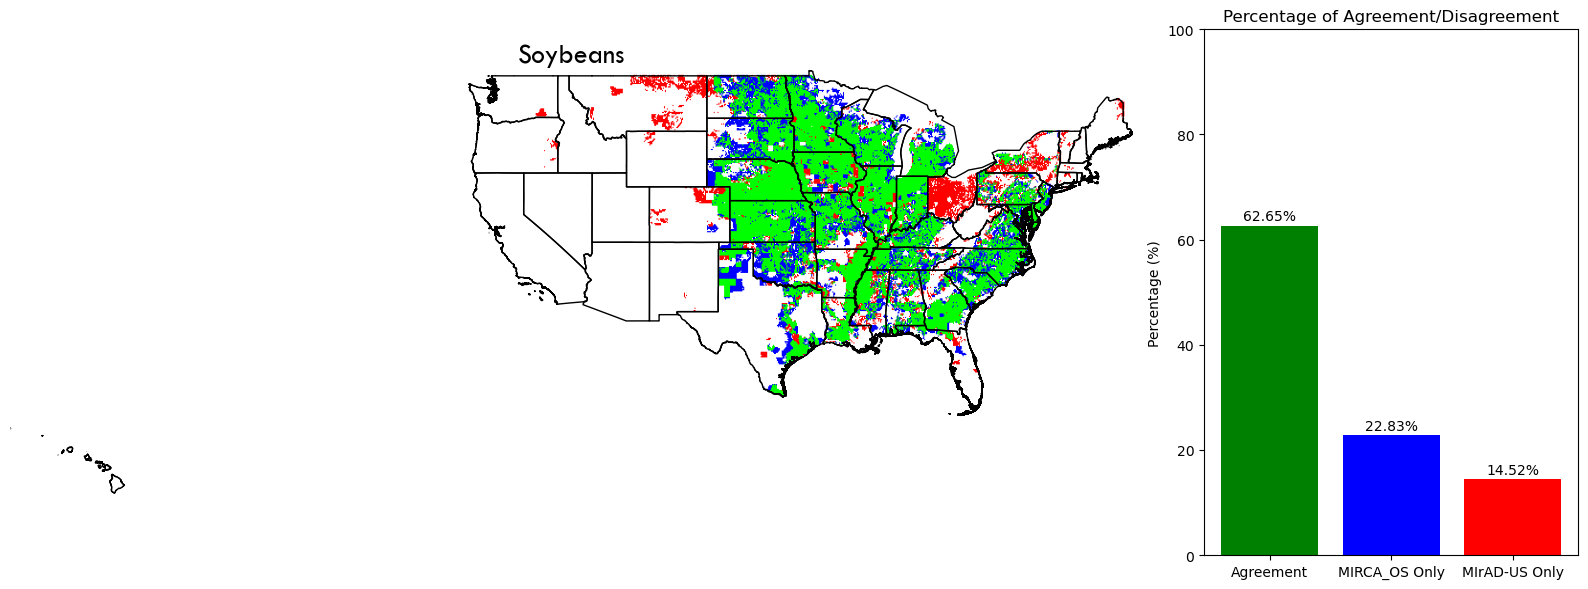

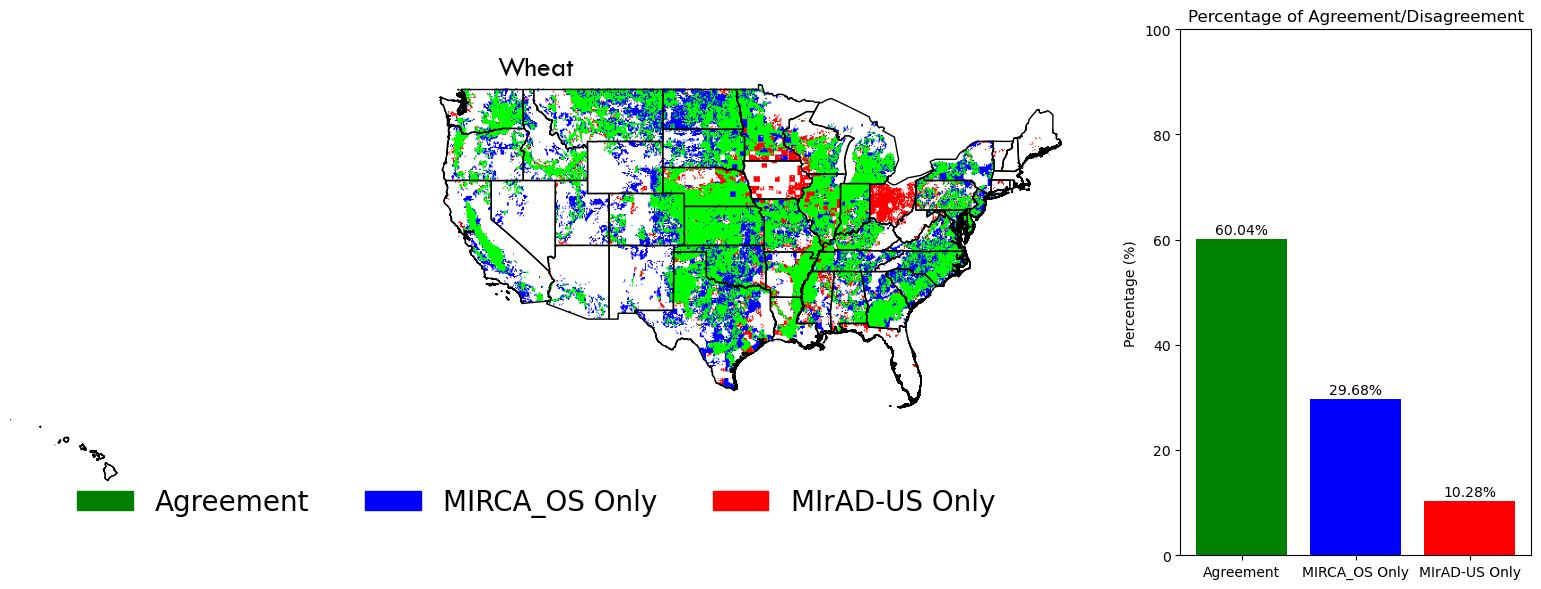

In [21]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    # You can set another font here or leave this to use the default font
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\MIRCA-OS"
base_dir_2000 ="E:\\Crop Scape\\Corn\\New Folder\\New folder\\Validation2"

# Crop names
crops = [ "Cotton","Maize", "Soybeans", "Wheat"]

# Create a plot for each crop
# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters and calculate percentages for the bar chart
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Plot map
    # Plot map with black background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]  # Green for agreement
    combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
    combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
    # Plot map
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent1)
    ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
    ax_map.set_frame_on(False) 
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Removing x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
        colors = ['green', 'blue', 'red']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
    # Plot bar chart
    labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
    ax_bar.set_title('Percentage of Agreement/Disagreement')
    ax_bar.set_ylabel('Percentage (%)')
    ax_bar.set_ylim(0, 100)
    for index, value in enumerate(percentages):
        ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
    plt.tight_layout()
    plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\MiRAD\\MiRAD_{crop}_MIRCA2000.png', bbox_inches='tight')
    plt.show()


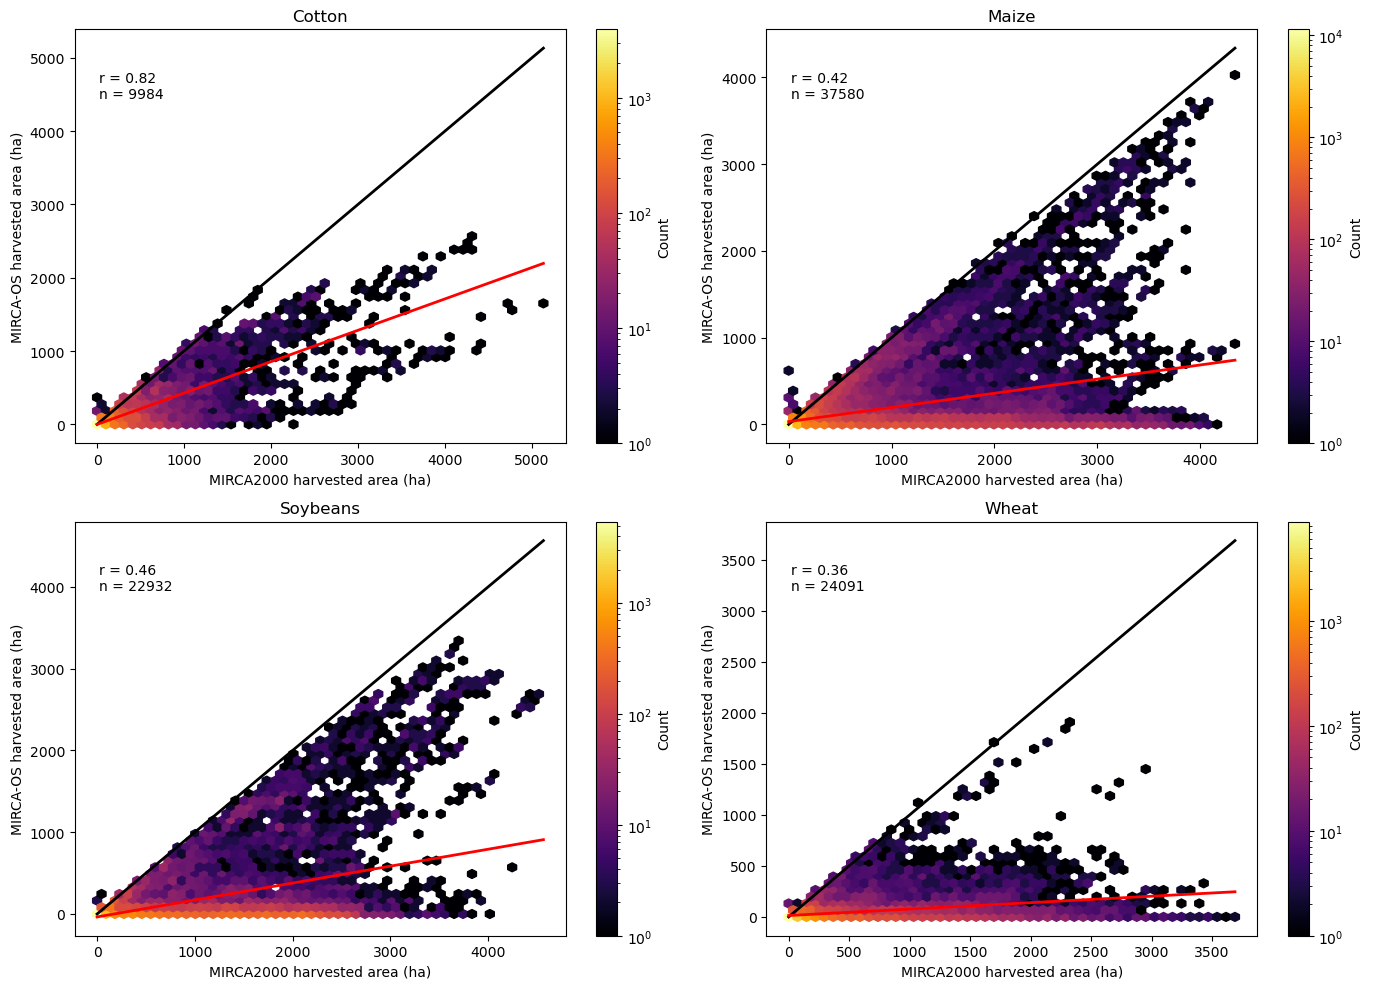

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from scipy.stats import linregress, pearsonr

# Define the clean_raster_data function
def clean_raster_data(raster_data, nodata_value, no_data_value=0):
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)
    cleaned_data = np.where((cleaned_data < -1e+38) | np.isnan(cleaned_data), no_data_value, cleaned_data)
    return cleaned_data

# Define the plot_scatter_and_regression function to accept the ax parameter
def plot_scatter_and_regression(ax, x, y, crop_name):
    # Ensure that we remove no_data_values from the data before plotting
    mask = (x != no_data_value) & (y != no_data_value)
    x = x[mask]
    y = y[mask]
    
    # Calculate the Pearson correlation coefficient
    r, _ = pearsonr(x, y)

    # Calculate the common range for x and y axes
    common_min = min(np.nanmin(x), np.nanmin(y))
    common_max = max(np.nanmax(x), np.nanmax(y))
    
    hb = ax.hexbin(x, y, gridsize=50, cmap='inferno', bins='log', extent=(common_min, common_max, common_min, common_max))
    ax.figure.colorbar(hb, ax=ax, label='Count')
    
    # Add the 1:1 line
    ax.plot([common_min, common_max], [common_min, common_max], color='black', linestyle='-', linewidth=2)
    
    # Linear regression
    slope, intercept, _, _, _ = linregress(x, y)
    ax.plot([common_min, common_max], [intercept + slope * common_min, intercept + slope * common_max], color='red', linewidth=2)
    
    # Determine position for text annotation (top left corner inside the plot)
    text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
    text_y = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1
    
    # Print r and n within the boundary of the plot
    ax.text(text_x, text_y, f'r = {r:.2f}\nn = {len(x)}', color='black', ha='left', va='top', backgroundcolor='white')
    
    ax.set_xlabel('MIRCA2000 harvested area (ha)')
    ax.set_ylabel('MIRCA-OS harvested area (ha)')
    ax.set_title(f'{crop_name}')

# Define no_data_value
no_data_value = -9999  # Update this to your no-data value

# Update the folder paths to reflect the correct datasets
folder1 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\Validation2"  # MIRCA2000
folder2 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\MIRCA-OS\\New\\New"  # MIRCA-OS

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel() # Flatten the 2x2 array of axes

# List the raster files
rasters1 = {os.path.splitext(file)[0]: os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.tif')}  # MIRCA2000
rasters2 = {os.path.splitext(file)[0]: os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.tif')}  # MIRCA-OS

# Iterate over the rasters
for i, (crop_name, raster_path1) in enumerate(rasters1.items()):
    if i >= 4:  # Only plot the first 4 matches
        break
    raster_path2 = rasters2.get(crop_name)
    if raster_path2:
        ax = axs[i]  # Get the corresponding Axes object
        with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
            # Read and clean data
            data1 = clean_raster_data(src1.read(1), src1.nodata, no_data_value)  # MIRCA2000
            data2 = clean_raster_data(src2.read(1), src2.nodata, no_data_value)  # MIRCA-OS
            
            # Flatten the arrays
            data1 = data1.flatten()
            data2 = data2.flatten()
            
            # Check if there is any valid data left
            if np.all(data1 == no_data_value) or np.all(data2 == no_data_value):
                print(f"All data for {crop_name} are no-data after cleaning.")
                continue
            
            # Plot the data on the corresponding subplot axis
            plot_scatter_and_regression(ax, data1, data2, crop_name)

# Adjust the layout and display the plot
plt.tight_layout()
# plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\MiRAD\\Scatter_{crop}.png', bbox_inches='tight')
plt.show()


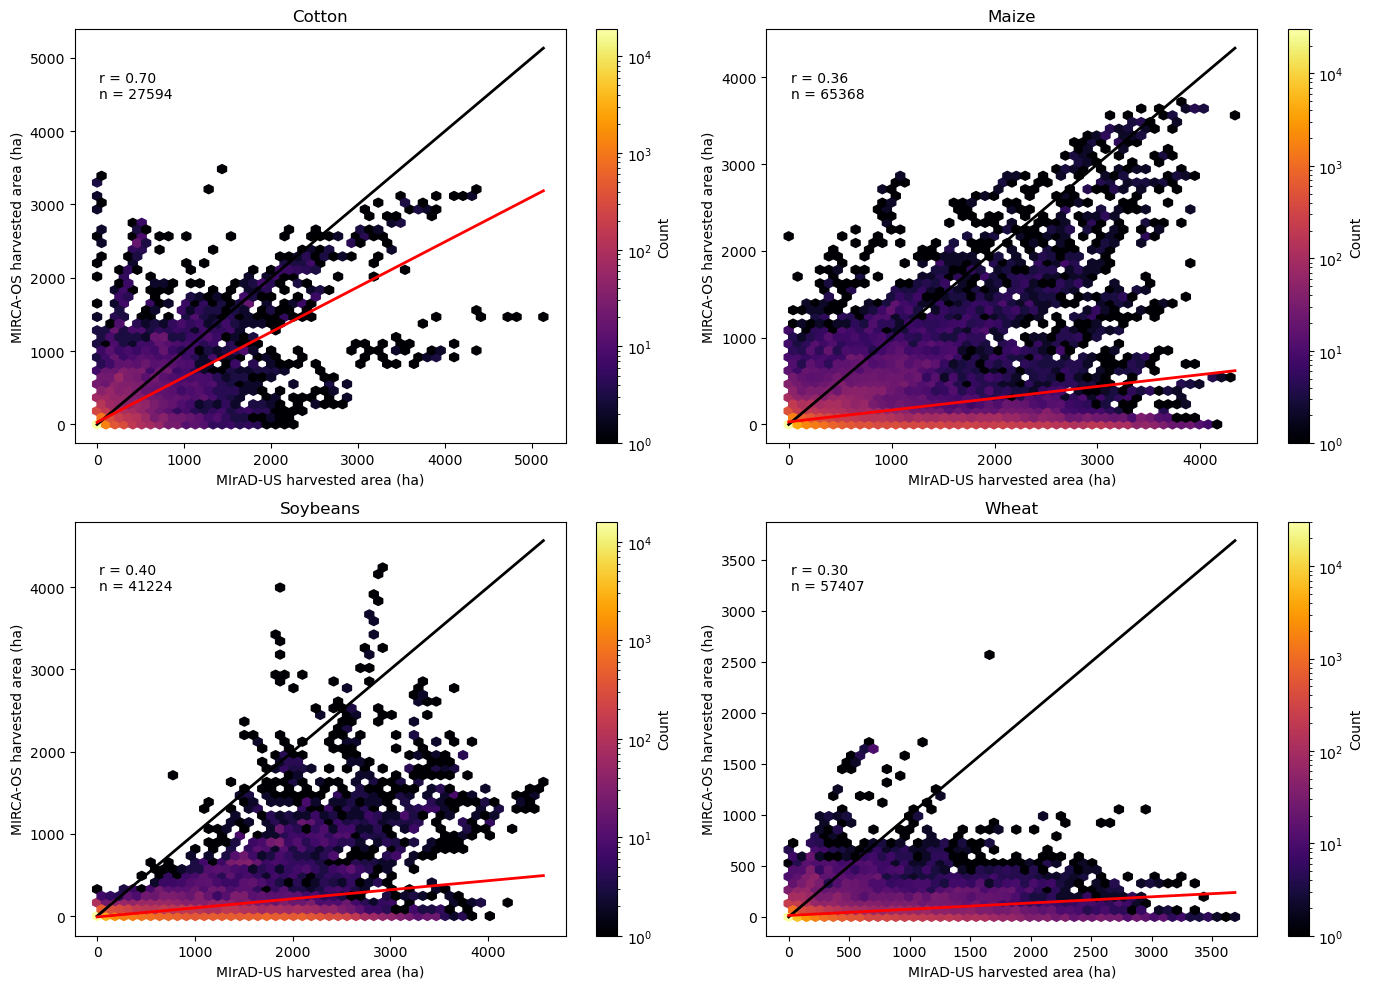

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from scipy.stats import linregress, pearsonr

# Define the clean_raster_data function
def clean_raster_data(raster_data, nodata_value, no_data_value=0):
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)
    cleaned_data = np.where((cleaned_data < -1e+38) | np.isnan(cleaned_data), no_data_value, cleaned_data)
    return cleaned_data

# Define the plot_scatter_and_regression function to accept the ax parameter
def plot_scatter_and_regression(ax, x, y, crop_name):
    # Ensure that we remove no_data_values from the data before plotting
    mask = (x != no_data_value) & (y != no_data_value)
    x = x[mask]
    y = y[mask]
    
    # Calculate the Pearson correlation coefficient
    r, _ = pearsonr(x, y)

    # Calculate the common range for x and y axes
    common_min = min(np.nanmin(x), np.nanmin(y))
    common_max = max(np.nanmax(x), np.nanmax(y))
    
    hb = ax.hexbin(x, y, gridsize=50, cmap='inferno', bins='log', extent=(common_min, common_max, common_min, common_max))
    ax.figure.colorbar(hb, ax=ax, label='Count')
    
    # Add the 1:1 line
    ax.plot([common_min, common_max], [common_min, common_max], color='black', linestyle='-', linewidth=2)
    
    # Linear regression
    slope, intercept, _, _, _ = linregress(x, y)
    ax.plot([common_min, common_max], [intercept + slope * common_min, intercept + slope * common_max], color='red', linewidth=2)
    
    # Determine position for text annotation (top left corner inside the plot)
    text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
    text_y = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1
    
    # Print r and n within the boundary of the plot
    ax.text(text_x, text_y, f'r = {r:.2f}\nn = {len(x)}', color='black', ha='left', va='top', backgroundcolor='white')
    
    ax.set_xlabel('MIrAD-US harvested area (ha)')
    ax.set_ylabel('MIRCA-OS harvested area (ha)')
    ax.set_title(f'{crop_name}')

# Define no_data_value
no_data_value = -9999  # Update this to your no-data value

# Define the paths to the directories
folder1 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\Validation2"
folder2 = "E:\\Crop Scape\\Corn\\New Folder\\New folder\\MIRCA-OS"

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel() # Flatten the 2x2 array of axes

# List the raster files
rasters1 = {os.path.splitext(file)[0]: os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.tif')}
rasters2 = {os.path.splitext(file)[0]: os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.tif')}

# Iterate over the rasters
for i, (crop_name, raster_path1) in enumerate(rasters1.items()):
    if i >= 4:  # Only plot the first 4 matches
        break
    raster_path2 = rasters2.get(crop_name)
    if raster_path2:
        ax = axs[i]  # Get the corresponding Axes object
        with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
            # Read and clean data as before
            data1 = clean_raster_data(src1.read(1), src1.nodata, no_data_value)
            data2 = clean_raster_data(src2.read(1), src2.nodata, no_data_value)
            
            # Flatten the arrays as before
            data1 = data1.flatten()
            data2 = data2.flatten()
            
            # Check if there is any valid data left as before
            if np.all(data1 == no_data_value) or np.all(data2 == no_data_value):
                print(f"All data for {crop_name} are no-data after cleaning.")
                continue
            
            # Plot the data on the corresponding subplot axis
            plot_scatter_and_regression(ax, data1, data2, crop_name)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\MiRAD\\Scatter_{crop}.png', bbox_inches='tight')
plt.show()

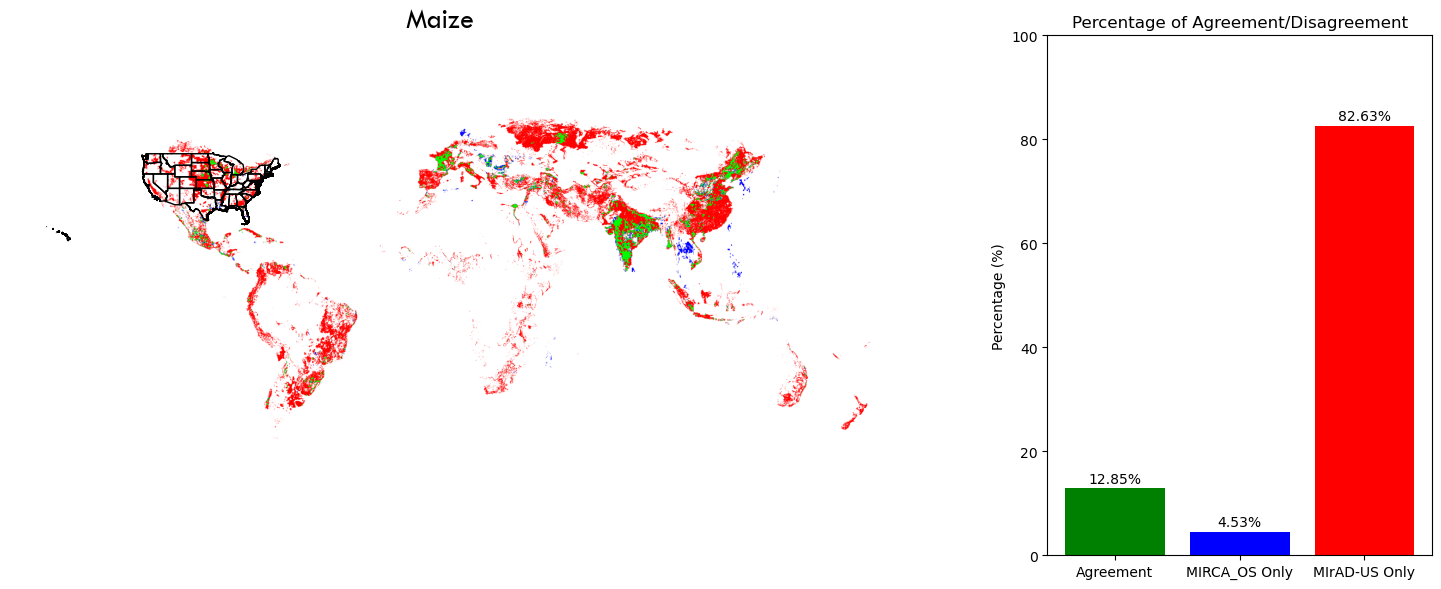

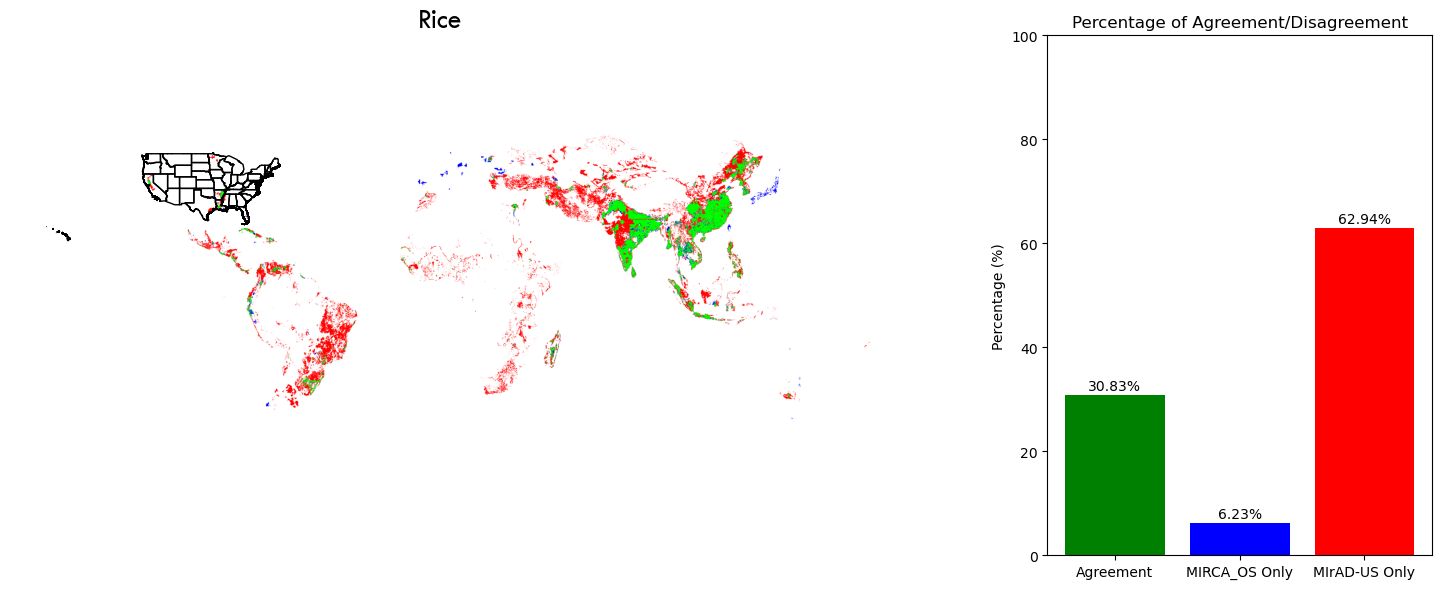

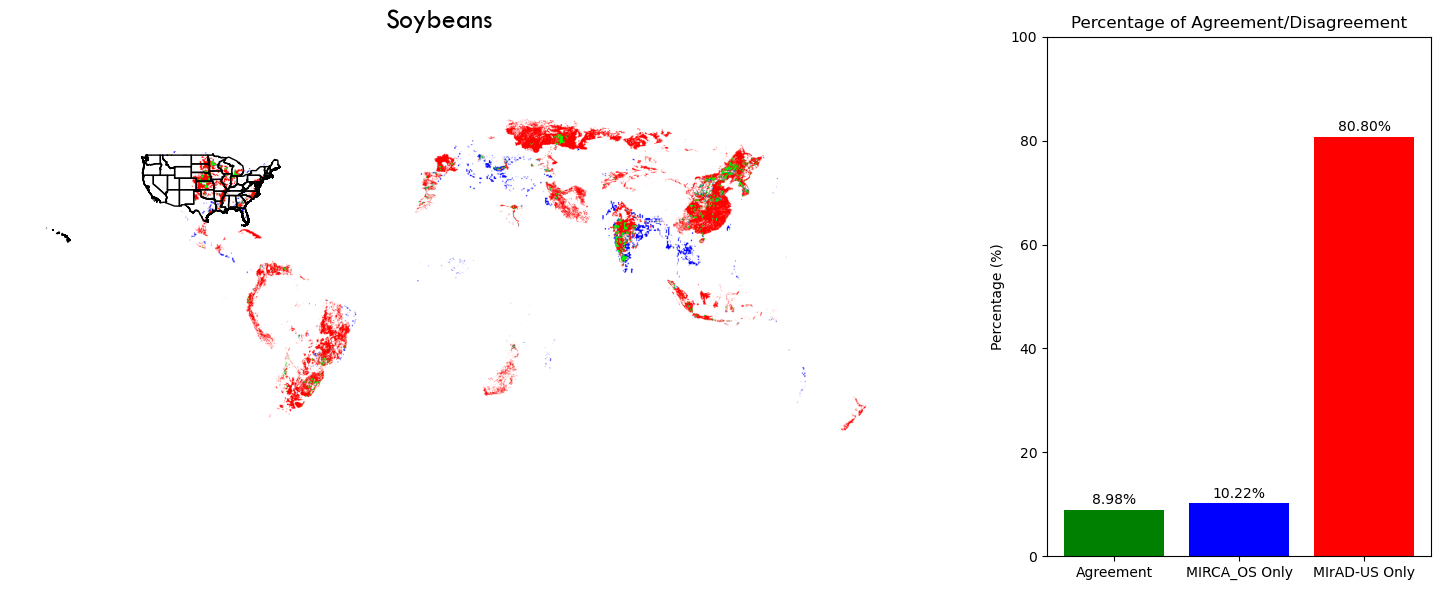

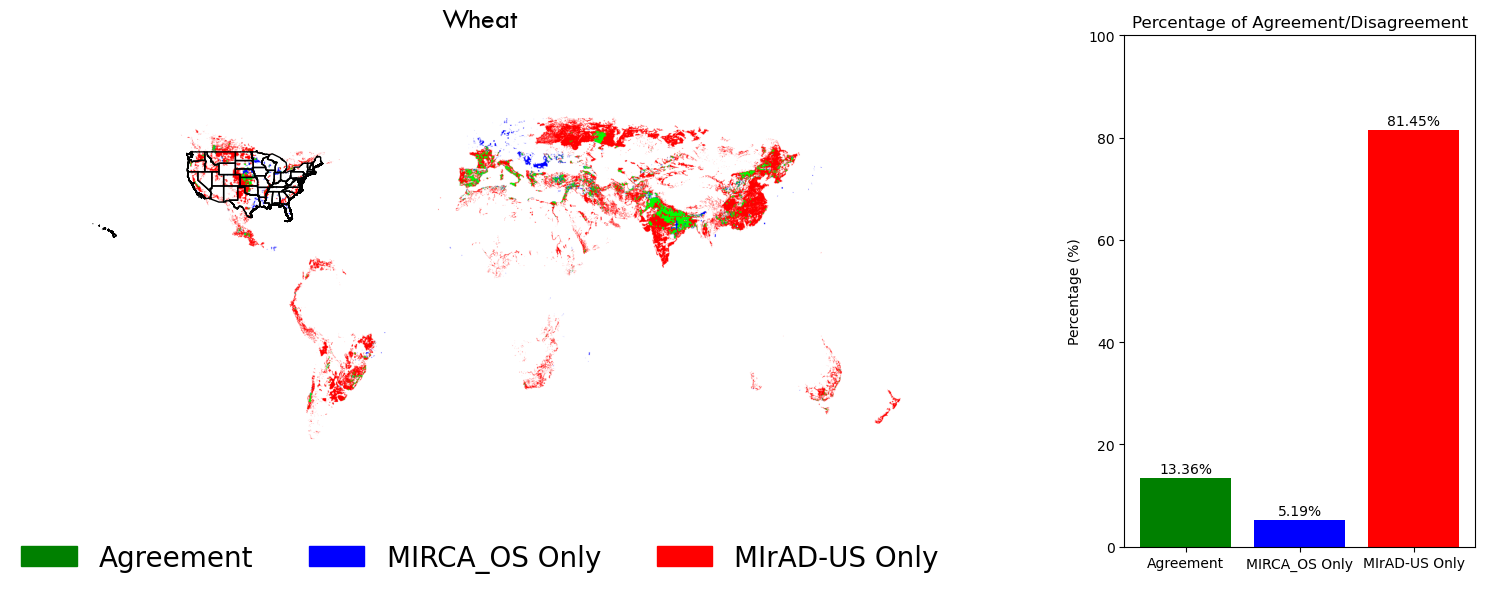

In [31]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    # You can set another font here or leave this to use the default font
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_2000= "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\Filtered"
base_dir_os= "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\MIRCA-OS\\New"

# Crop names
crops = [ "Maize","Rice", "Soybeans", "Wheat"]

# Create a plot for each crop
# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_2000}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_os}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters and calculate percentages for the bar chart
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Plot map
    # Plot map with black background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]  # Green for agreement
    combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
    combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
    # Plot map
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent1)
    ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
    ax_map.set_frame_on(False) 
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Removing x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
        colors = ['green', 'blue', 'red']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
    # Plot bar chart
    labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
    ax_bar.set_title('Percentage of Agreement/Disagreement')
    ax_bar.set_ylabel('Percentage (%)')
    ax_bar.set_ylim(0, 100)
    for index, value in enumerate(percentages):
        ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
    plt.tight_layout()
#     plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\Prob"\\Prob_{crop}_.png', bbox_inches='tight')
    plt.show()


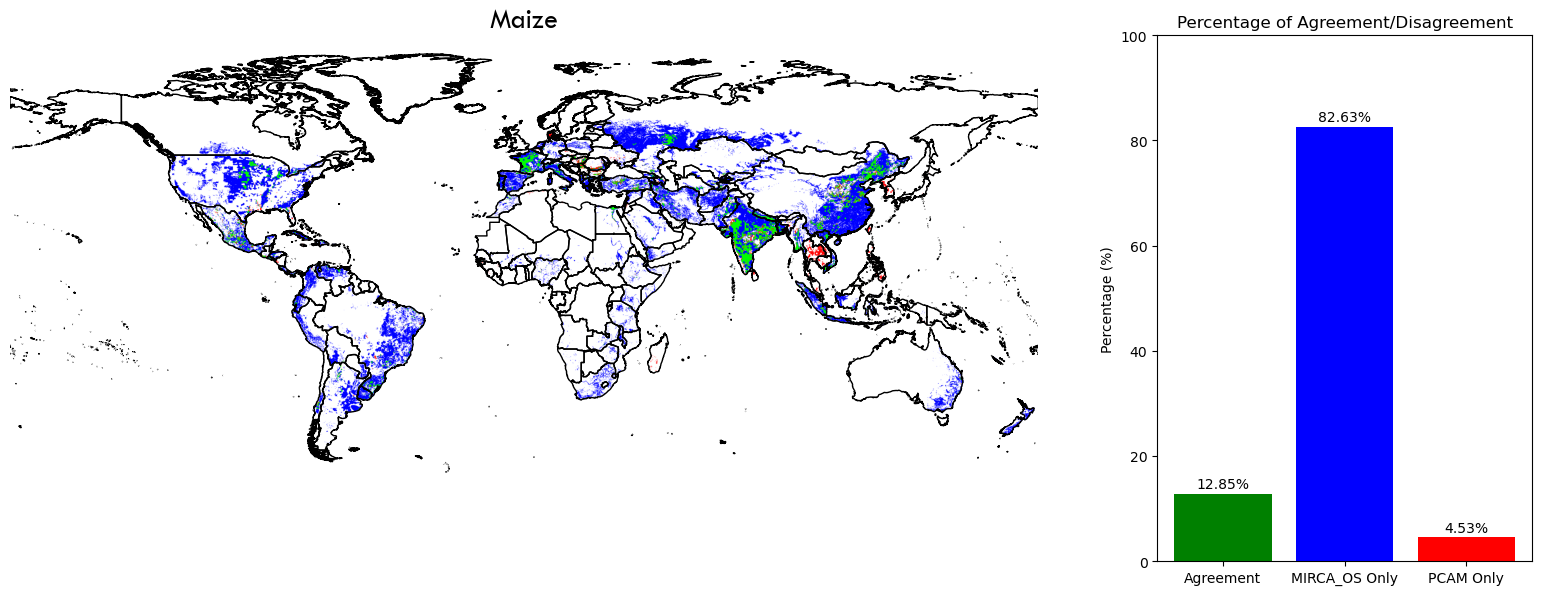

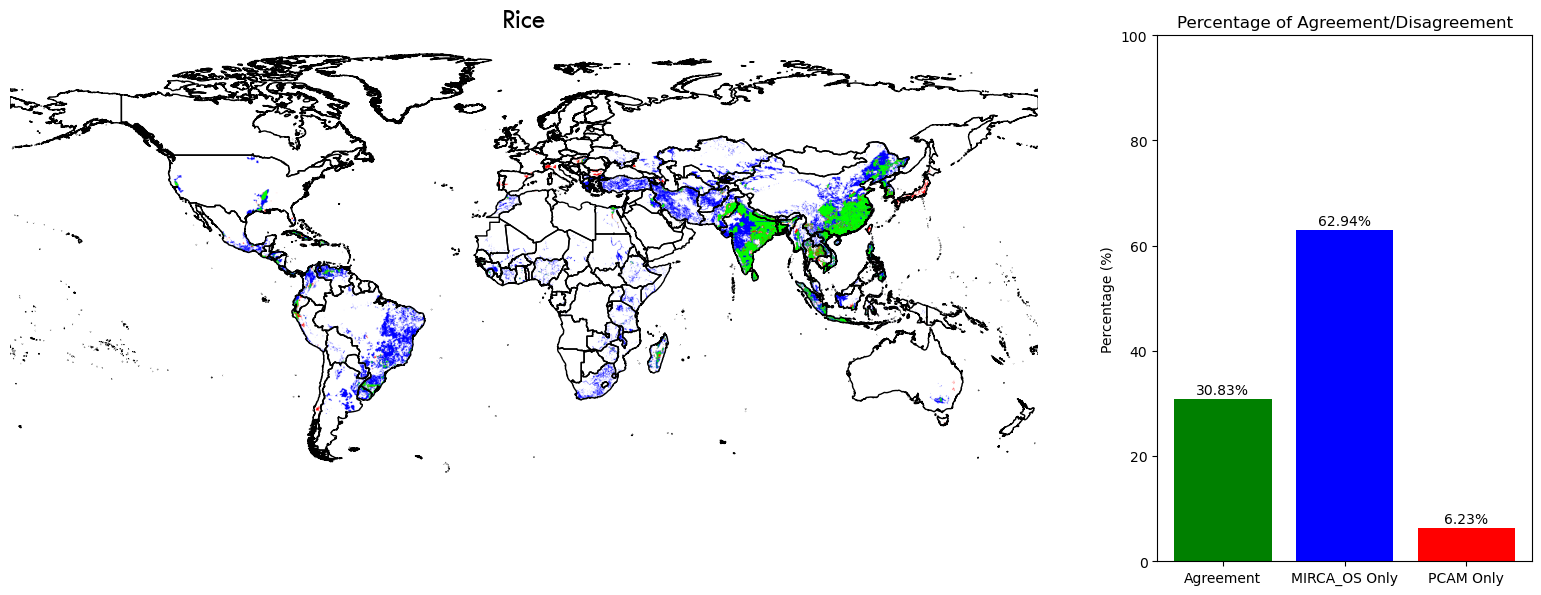

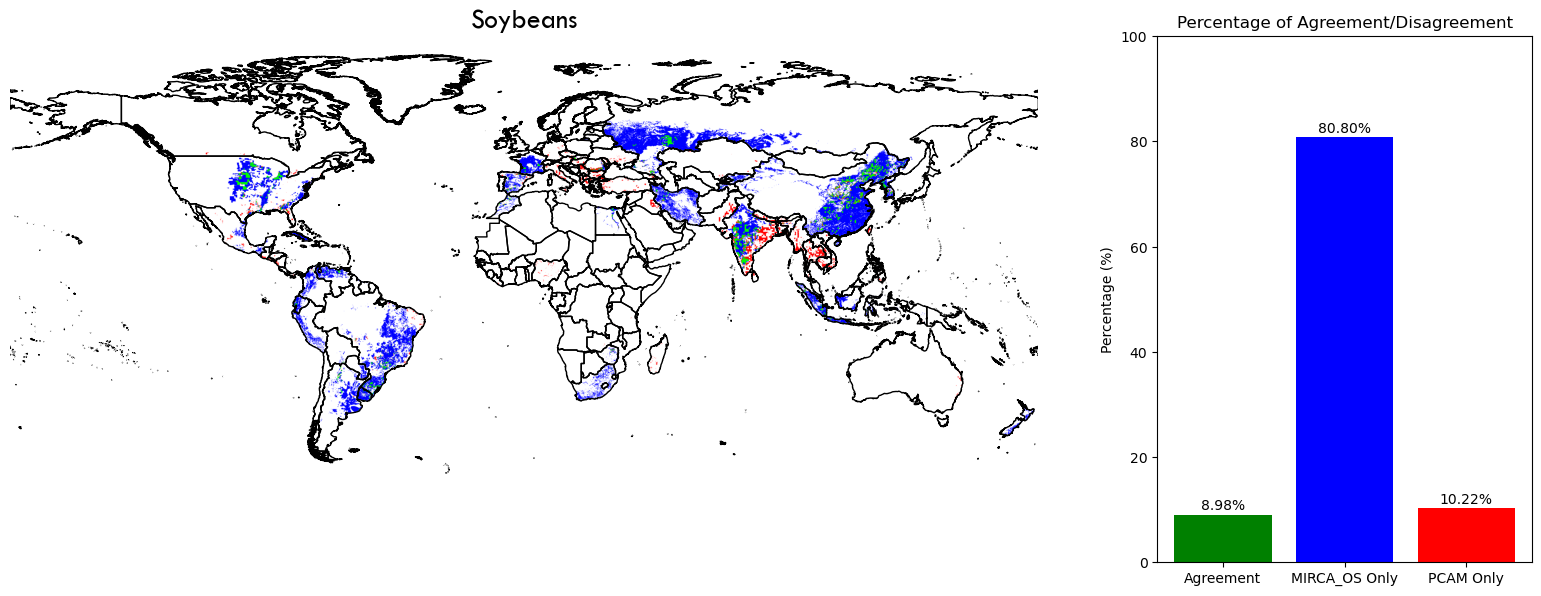

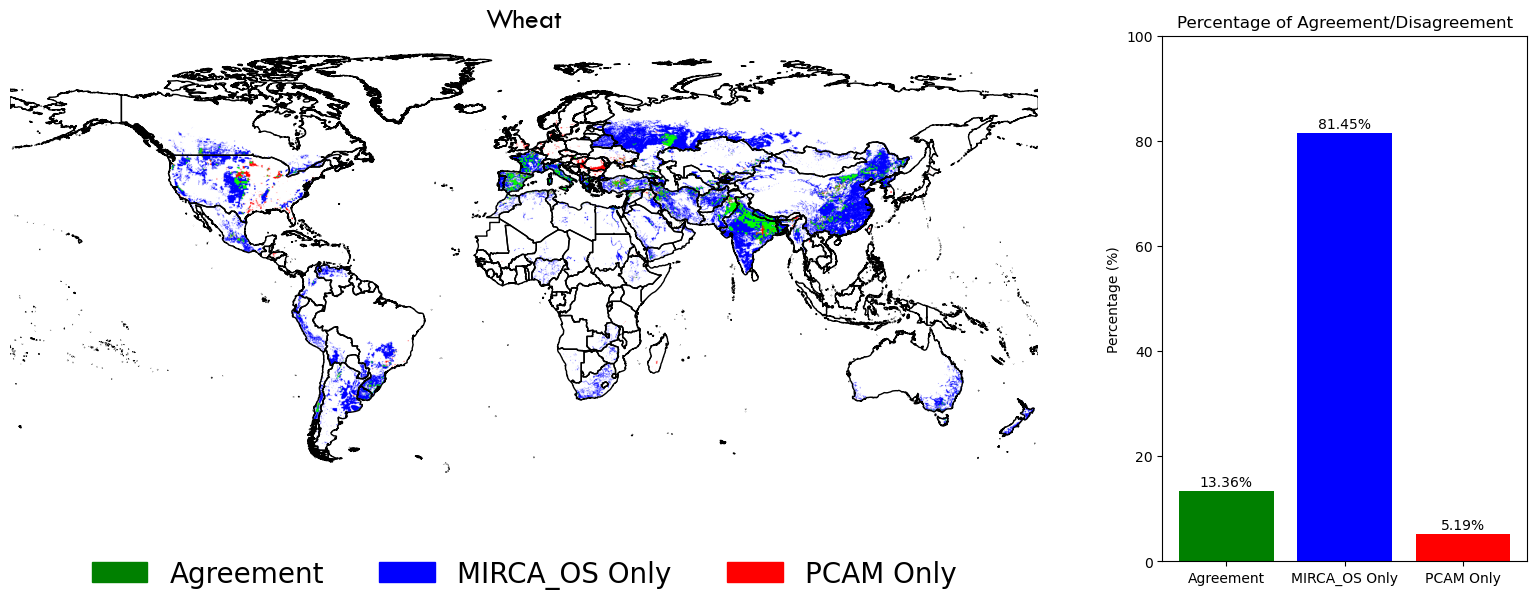

In [33]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    # You can set another font here or leave this to use the default font
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\Other Projects\\Review Papaer\\WB_countries_Admin0_10m\\WB_countries_Admin0_10m.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\MIRCA-OS\\New"
base_dir_2000 = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\Filtered"


# Crop names
crops = ["Maize", "Rice", "Soybeans", "Wheat"]

# Create a plot for each crop
# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters and calculate percentages for the bar chart
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Plot map
    # Plot map with black background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]  # Green for agreement
    combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
    combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
    # Plot map
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent1)
    ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
    ax_map.set_frame_on(False) 
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Removing x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'PCAM Only']
        colors = ['green', 'blue', 'red']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
    # Plot bar chart
    labels = ['Agreement', 'MIRCA_OS Only', 'PCAM Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
    ax_bar.set_title('Percentage of Agreement/Disagreement')
    ax_bar.set_ylabel('Percentage (%)')
    ax_bar.set_ylim(0, 100)
    for index, value in enumerate(percentages):
        ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
    plt.tight_layout()
    plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\Prob\\irr_{crop}_MIRCA2000.png', bbox_inches='tight')
    plt.show()


In [35]:
import numpy as np
import rasterio

# Path to the source raster file
src_raster_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Rainfed Validtaion\\GFSAD1KCM.2010.001.2016348142550.tif"

# Path to the destination aggregated raster file
dst_raster_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Rainfed Validtaion\\aggregated_raster.tif"

# Open the raster file
with rasterio.open(src_raster_path) as src:
    # Read the raster data into a NumPy array
    raster_data = src.read()  # Reads all bands
    
    # Initialize an array to hold the aggregated data
    aggregated_data = np.zeros(raster_data.shape, dtype=rasterio.uint8)
    
    # Loop through all bands
    for i in range(raster_data.shape[0]):
        # Replace pixel values 3, 4, and 5 with 3, set others to 0
        aggregated_data[i] = np.where((raster_data[i] == 3) | (raster_data[i] == 4) | (raster_data[i] == 5), 3, 0)
    
    # Get the metadata/profile of the source raster
    profile = src.profile
    # Update the profile to reflect the number of bands and data type
    profile.update(dtype=rasterio.uint8)
    
    # Write the aggregated data to a new raster file
    with rasterio.open(dst_raster_path, 'w', **profile) as dst:
        dst.write(aggregated_data)


In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    # You can set another font here or leave this to use the default font
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'
# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\Other Projects\\Review Papaer\\WB_countries_Admin0_10m\\WB_countries_Admin0_10m.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\MIRCA-OS\\New"
base_dir_2000 = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Probablistic\\Irrigated\\Filtered"


# Crop names
crops = ["Maize", "Rice", "Soybeans", "Wheat"]

# Create a plot for each crop
# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters and calculate percentages for the bar chart
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Plot map
    # Plot map with black background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
    combined_rgb[agree] = [0, 1, 0]  # Green for agreement
    combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
    combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
    # Plot map
    extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent1)
    ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
    ax_map.set_frame_on(False) 
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Removing x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])
    if i == len(crops) - 1:
        legend_labels = ['Agreement', 'MIRCA_OS Only', 'PCAM Only']
        colors = ['green', 'blue', 'red']
        patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
        ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
    # Plot bar chart
    labels = ['Agreement', 'MIRCA_OS Only', 'PCAM Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
    ax_bar.set_title('Percentage of Agreement/Disagreement')
    ax_bar.set_ylabel('Percentage (%)')
    ax_bar.set_ylim(0, 100)
    for index, value in enumerate(percentages):
        ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
    plt.tight_layout()
    plt.savefig(f'D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\Prob\\irr_{crop}_MIRCA2000.png', bbox_inches='tight')
    plt.show()


Unique values in MIRCA-OS raster: [0 3]
Unique values in MIRCA2000 raster: [0 3]
Number of agreeing pixels: 31
Number of MIRCA-OS only pixels: 281
Number of MIRCA2000 only pixels: 336793


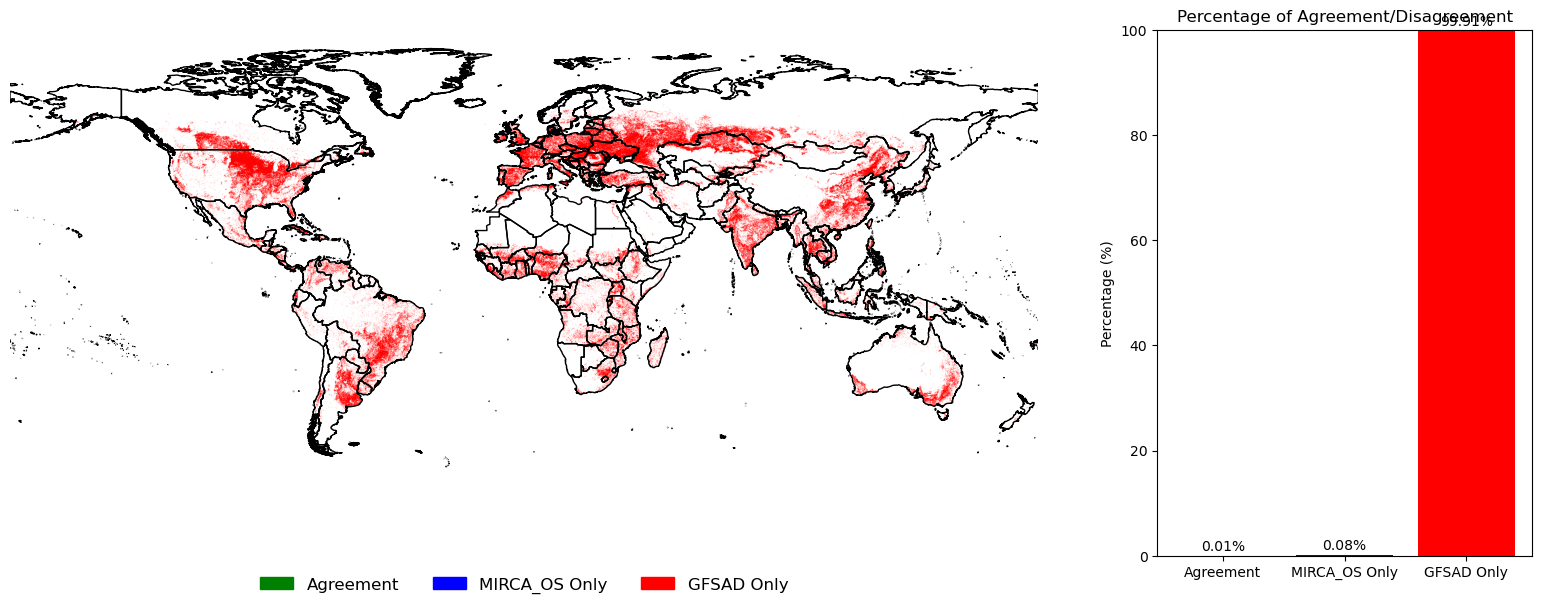

In [42]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager

# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font.')
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data):
    cleaned_data = np.where((raster_data == 3) | (raster_data == 4) | (raster_data == 5), 3, 0)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\Other Projects\\Review Papaer\\WB_countries_Admin0_10m\\WB_countries_Admin0_10m.shp"
world = gpd.read_file(shapefile_path)

# Specify the raster file paths directly
raster_path_os = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Rainfed Validtaion\\Rainfed_mirca.tif"
raster_path_2000 = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Rainfed Validtaion\\Rie_val.tif"

# Read and clean rasters
raster1, transform1 = read_raster(raster_path_os)
raster2, transform2 = read_raster(raster_path_2000)
raster1 = clean_raster_data(raster1)
raster2 = clean_raster_data(raster2)
print("Unique values in MIRCA-OS raster:", np.unique(raster1))
print("Unique values in MIRCA2000 raster:", np.unique(raster2))
# Compare rasters
agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)

# Calculate percentages for the bar chart
agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

# Create a plot
fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot map with black background
combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
combined_rgb[agree] = [0, 1, 0]  # Green for agreement
combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
print("Number of agreeing pixels:", np.sum(agree))
print("Number of MIRCA-OS only pixels:", np.sum(mirca_os_only))
print("Number of MIRCA2000 only pixels:", np.sum(mirca_2000_only))
# Plot map
extent = get_extent(transform1, raster1.shape[1], raster1.shape[0])
ax_map.imshow(combined_rgb, extent=extent)
# ax_map.set_title('Comparison Map', fontsize=20, fontname=title_font)
ax_map.set_frame_on(False)
world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

# Removing x and y ticks
ax_map.set_xticks([])
ax_map.set_yticks([])

# Legend
legend_labels = ['Agreement', 'MIRCA_OS Only', 'GFSAD Only']
colors = ['green', 'blue', 'red']
patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=12)

# Plot bar chart
labels = ['Agreement', 'MIRCA_OS Only', 'GFSAD Only']
percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
ax_bar.set_title('Percentage of Agreement/Disagreement')
ax_bar.set_ylabel('Percentage (%)')
ax_bar.set_ylim(0, 100)
for index, value in enumerate(percentages):
    ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.tight_layout()
plt.savefig('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\All_maps\\Validation\\Maps\\Prob\\Rainfed_Map.png', bbox_inches='tight')
plt.show()


In [2]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

# File paths for the input and output files
original_tif_path = "E:\\Crop Scape\\Corn\\New Folder\\US_Corn.tif"
grid_tif_path = "E:\\Crop Scape\\Corn\\New Folder\\Area1.tif"
output_tif_path = "E:\\Crop Scape\\Corn\\New Folder\\US_5arc.tif"


In [3]:
with rasterio.open(original_tif_path) as original_tif:
    original_data = original_tif.read(1)  # Read the first band
    original_transform = original_tif.transform
    original_crs = original_tif.crs


In [4]:
with rasterio.open(grid_tif_path) as grid_tif:
    grid_transform = grid_tif.transform
    grid_shape = (grid_tif.height, grid_tif.width)
    grid_crs = grid_tif.crs

In [25]:
import rasterio
import numpy as np

# File paths
input_raster_path = "E:\\MIRAD\\New\\MirAD.tif"
intermediate_raster_path = "E:\\MIRAD\\New\\MirAD_absolute_values.tif"

# Read the input raster
with rasterio.open(input_raster_path) as src:
    # Read the first band
    data = src.read(1)
    src_nodata = src.nodata  # Get the nodata value from the source

    # Check input data range
    assert np.nanmax(data[data != src_nodata]) > 0, "Input data max value is not greater than 0"

    # Calculate the area of each grid cell in hectares
    # Note: This assumes the raster's CRS uses units of meters
    cell_area_hectares = (src.res[0] * src.res[1]) / 10000

    # Convert the percentage values to absolute values in hectares
    absolute_data = np.where(data != src_nodata, (data / 100) * cell_area_hectares, src_nodata)

    # Update the metadata for the new raster
    meta = src.meta.copy()
    meta.update(dtype=rasterio.float32, nodata=src_nodata)

    # Write the absolute values to an intermediate raster
    with rasterio.open(intermediate_raster_path, 'w', **meta) as dst:
        dst.write(absolute_data, 1)


In [34]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np

# File paths
input_raster_path = "E:\\MIRAD\\New\\MIRAD_2015.tif"
reference_raster_path = "E:\\MIRAD\\New\\Area.tif"
output_raster_path = "E:\\MIRAD\\New\\Final\\MirAD_2015.tif"

# Read the reference raster to extract the spatial parameters
with rasterio.open(reference_raster_path) as ref_raster:
    ref_transform = ref_raster.transform
    ref_width = ref_raster.width
    ref_height = ref_raster.height
    ref_crs = ref_raster.crs

    # Ensure the reference raster is in WGS 84
    assert ref_crs.to_string() == 'EPSG:4326', "Reference raster is not in WGS 84 CRS"

    # Read the input raster
    with rasterio.open(input_raster_path) as src:
        data = src.read(1)  # Read the first band

        # Check input data range
        assert data.max() > 0, "Input data max value is not greater than 0"

        # Calculate the area of each grid cell in hectares
        cell_area_hectares = (src.res[0] * src.res[1]) / 10000  # converting square meters to hectares

        # Convert the percentage values to absolute values in hectares
        absolute_data = (data ) * cell_area_hectares

        # Prepare an array to hold the reprojected data
        reprojected_data = np.empty((ref_height, ref_width), dtype=np.float32)

        # Reproject the data using a different resampling method
        reproject(
            source=absolute_data,
            destination=reprojected_data,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.bilinear  # Using bilinear resampling
        )

        # Check if reprojected data is all zeros
        assert reprojected_data.max() > 0, "Reprojected data max value is not greater than 0"

        # Define metadata for the new raster
        meta = ref_raster.meta.copy()
        meta.update(dtype=rasterio.float32)

        # Write the reprojected data to an output raster
        with rasterio.open(output_raster_path, 'w', **meta) as dst:
            dst.write(reprojected_data, 1)


In [29]:
from osgeo import gdal, osr
import numpy as np

# File paths
input_raster_path = "E:\\MIRAD\\New\\MIRAD_2015.tif"
area_raster_path = "E:\\MIRAD\\New\\Area.tif"
output_raster_path = "E:\\MIRAD\\New\\Final\\MIRAD_2015_aggregated.tif"

# Reproject the input raster to match the area raster's CRS
reprojected_raster_path = "E:\\MIRAD\\New\\Final\\Reprojected_MIRAD_2015.tif"
gdal.Warp(reprojected_raster_path, input_raster_path, dstSRS='EPSG:4326', resampleAlg=gdal.GRA_Bilinear)

# Open the reprojected raster
reprojected_raster = gdal.Open(reprojected_raster_path)
reprojected_band = reprojected_raster.GetRasterBand(1)

# Convert the percentage values to absolute values in hectares (since 1 km² = 100 hectares)
data_hectares = reprojected_band.ReadAsArray() * 1  # Each pixel represents 1 km², and values are percentages

# Prepare for aggregation: determine the ratio of the cell sizes between the two rasters
area_raster = gdal.Open(area_raster_path)
area_transform = area_raster.GetGeoTransform()
reprojected_transform = reprojected_raster.GetGeoTransform()

# Calculate the number of input raster cells that fit into one area raster cell
cell_ratio_x = int(round(abs(area_transform[1] / reprojected_transform[1])))
cell_ratio_y = int(round(abs(area_transform[5] / reprojected_transform[5])))

# Aggregate data
aggregated_data = np.zeros((area_raster.RasterYSize, area_raster.RasterXSize), dtype=np.float32)

for i in range(0, aggregated_data.shape[0]):
    for j in range(0, aggregated_data.shape[1]):
        # Sum the values in the window from the reprojected raster
        window_data = data_hectares[
            i*cell_ratio_y:(i+1)*cell_ratio_y,
            j*cell_ratio_x:(j+1)*cell_ratio_x
        ]
        aggregated_data[i, j] = np.nansum(window_data)

# Create a new raster for the aggregated data
driver = gdal.GetDriverByName('GTiff')
out_raster = driver.Create(
    output_raster_path,
    area_raster.RasterXSize,
    area_raster.RasterYSize,
    1,
    gdal.GDT_Float32
)
out_raster.SetProjection(area_raster.GetProjection())
out_raster.SetGeoTransform(area_raster.GetGeoTransform())
out_band = out_raster.GetRasterBand(1)
out_band.WriteArray(aggregated_data)
out_band.SetNoDataValue(np.nan)

# Properly close the datasets to flush to disk
reprojected_raster = None
area_raster = None
out_raster = None


In [44]:
from osgeo import gdal
import numpy as np
import os

# Enable GDAL/OGR exceptions
gdal.UseExceptions()

# Define file paths
input_raster_path = "E:\\MIRAD\\New\\MIRAD_2015.tif"
area_raster_path = "E:\\MIRAD\\New\\Area.tif"
reprojected_raster_path = "E:\\MIRAD\\New\\Final\\Reprojected_MIRAD_2015.tif"
output_raster_path = "E:\\MIRAD\\New\\Final\\MIRAD_2015_aggregated.tif"

# Ensure the output directory exists
output_dir = os.path.dirname(reprojected_raster_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Reproject the input raster to match the CRS and resolution of the area raster
area_raster = gdal.Open(area_raster_path)
area_projection = area_raster.GetProjection()
area_geotransform = area_raster.GetGeoTransform()
area_x_size = area_raster.RasterXSize
area_y_size = area_raster.RasterYSize

# Close the area raster to free resources
area_raster = None

# Reproject the input raster
try:
    result = gdal.Warp(reprojected_raster_path, input_raster_path, dstSRS=area_projection,
                       xRes=area_geotransform[1], yRes=abs(area_geotransform[5]),
                       outputBounds=[area_geotransform[0],
                                     area_geotransform[3] + (area_geotransform[5] * area_y_size),
                                     area_geotransform[0] + (area_geotransform[1] * area_x_size),
                                     area_geotransform[3]],
                       resampleAlg=gdal.GRA_Bilinear, targetAlignedPixels=True)
    if not result:
        raise Exception("gdal.Warp operation failed.")
except RuntimeError as e:
    raise Exception(f"gdal.Warp operation failed with error: {e}")



# Open the reprojected raster
reprojected_raster = gdal.Open(reprojected_raster_path)
reprojected_band = reprojected_raster.GetRasterBand(1)

# Convert the percentage values to absolute values in hectares
data_hectares = reprojected_band.ReadAsArray() * 1  # Assuming values are percentages for 1 km²

# Determine the cell size ratio between the reprojected raster and the area raster
reprojected_transform = reprojected_raster.GetGeoTransform()
cell_ratio_x = int(round(abs(area_geotransform[1] / reprojected_transform[1])))
cell_ratio_y = int(round(abs(area_geotransform[5] / reprojected_transform[5])))

# Aggregate the data
aggregated_data = np.zeros((area_y_size, area_x_size), dtype=np.float32)

for i in range(0, area_y_size):
    for j in range(0, area_x_size):
        window_data = data_hectares[i * cell_ratio_y:(i + 1) * cell_ratio_y,
                                    j * cell_ratio_x:(j + 1) * cell_ratio_x]
        aggregated_data[i, j] = np.nansum(window_data) / (cell_ratio_x * cell_ratio_y) * 100

# Create the output raster
driver = gdal.GetDriverByName('GTiff')
out_raster = driver.Create(output_raster_path, area_x_size, area_y_size, 1, gdal.GDT_Float32)
out_raster.SetProjection(area_projection)
out_raster.SetGeoTransform(area_geotransform)
out_band = out_raster.GetRasterBand(1)
out_band.WriteArray(aggregated_data)
out_band.SetNoDataValue(-9999)

# Compute statistics for better visualization
out_band.ComputeStatistics(False)

# Clean up
out_band = None
reprojected_raster = None
out_raster = None


In [ ]:
from osgeo import gdal, osr
import numpy as np

# File paths
input_raster_path = "E:\\MIRAD\\New\\MIRAD_2015.tif"
area_raster_path = "E:\\MIRAD\\New\\Area.tif"
output_raster_path = "E:\\MIRAD\\New\\Final\\New\\MIRAD_2015_aggregated.tif"
gdal.SetConfigOption('CHECK_DISK_FREE_SPACE', 'FALSE')
resampled_raster_path = "E:\\MIRAD\\New\\Final\\New\\MIRAD_2015_resampled.tif"
# Open the input raster
input_raster = gdal.Open(input_raster_path)
input_band = input_raster.GetRasterBand(1)

# Convert percentage values to fractions
fraction = input_band.ReadAsArray() / 100.0

# Open the area map
area_raster = gdal.Open(area_raster_path)
area_band = area_raster.GetRasterBand(1)

# Get the resolution of the area map
area_geotransform = area_raster.GetGeoTransform()
xRes = area_geotransform[1]
yRes = abs(area_geotransform[5])

# Resample the input raster to match the resolution of the area map
resampled_raster = gdal.Warp(resampled_raster_path, input_raster, xRes=xRes, yRes=yRes, resampleAlg=gdal.GRA_Bilinear)

# Get the pixel area in hectares
pixel_area_ha = np.abs(area_geotransform[1] * area_geotransform[5] / 10000)  # Convert square meters to hectares

# Multiply the resampled raster by the pixel area
aggregated_data = resampled_raster.GetRasterBand(1).ReadAsArray() * fraction * pixel_area_ha

# Create a new raster for the aggregated data
driver = gdal.GetDriverByName('GTiff')
out_raster = driver.Create(output_raster_path, area_raster.RasterXSize, area_raster.RasterYSize, 1, gdal.GDT_Float32)
out_raster.SetProjection(area_raster.GetProjection())
out_raster.SetGeoTransform(area_geotransform)
out_band = out_raster.GetRasterBand(1)
out_band.WriteArray(aggregated_data)
out_band.SetNoDataValue(np.nan)

# Properly close the datasets to flush to disk
input_raster = None
resampled_raster = None
area_raster = None
out_raster = None


In [14]:
from osgeo import gdal
import numpy as np
import os

# File paths
fraction_raster_path = "E:\\MIRAD\\New\\Final\\New\\MIRAD_2015_aggregated.tif"  # Update with the path to your fraction map
area_raster_path ="E:\\MIRAD\\New\\Area.tif"  # Update with the path to your area map
output_raster_path = "E:\\MIRAD\\New\\Final\\New\\MIRAD_2015_multiplied.tif"  # Update with the desired output path
 
# Function to clean raster data
def clean_raster_data(raster_data, no_data_value=0):
    # Replace negative infinity, positive infinity, and NaN values with no_data_value
    raster_data[np.isinf(raster_data)] = no_data_value
    raster_data[np.isnan(raster_data)] = no_data_value
    # Replace extreme values with no_data_value
    cleaned_data = np.where((raster_data < 0) | (raster_data > 1e+38), no_data_value, raster_data)
    return cleaned_data

# Open the fraction raster
fraction_raster = gdal.Open(fraction_raster_path)
if fraction_raster is None:
    raise RuntimeError(f"Failed to open the fraction raster: {fraction_raster_path}")

# Open the area raster
area_raster = gdal.Open(area_raster_path)
if area_raster is None:
    raise RuntimeError(f"Failed to open the area raster: {area_raster_path}")

# Read the rasters as arrays
fraction_array = fraction_raster.ReadAsArray()
area_array = area_raster.ReadAsArray()

# Clean the data
fraction_array = clean_raster_data(fraction_array)
area_array = clean_raster_data(area_array)

# Check if the dimensions match before multiplication
if fraction_array.shape != area_array.shape:
    raise ValueError("Dimension mismatch between fraction data and area raster!")

# Multiply the arrays
result_array = fraction_array * area_array

# Save the result to a new raster
driver = gdal.GetDriverByName('GTiff')
output_raster = driver.Create(output_raster_path, fraction_raster.RasterXSize, fraction_raster.RasterYSize, 1, gdal.GDT_Float32)
output_raster.SetProjection(fraction_raster.GetProjection())
output_raster.SetGeoTransform(fraction_raster.GetGeoTransform())

# Write the result to the output raster
output_band = output_raster.GetRasterBand(1)
output_band.WriteArray(result_array)
output_band.SetNoDataValue(0)  # Set the NoData value to 0 if required
output_band.FlushCache()

# Close datasets
fraction_raster = None
area_raster = None
output_raster = None

print("Multiplication of rasters complete. Output saved at:", output_raster_path)


Multiplication of rasters complete. Output saved at: E:\MIRAD\New\Final\New\MIRAD_2015_multiplied.tif


In [ ]:
# from osgeo import gdal
# import numpy as np
# import os

# # ... [other definitions] ...

# def aggregate_raster(input_raster_path, area_raster_path, output_raster_path):
#     # Open the input and area rasters
#     input_ds = gdal.Open(input_raster_path, gdal.GA_ReadOnly)
#     area_ds = gdal.Open(area_raster_path, gdal.GA_ReadOnly)

#     input_band = input_ds.GetRasterBand(1)
#     area_band = area_ds.GetRasterBand(1)

#     # Calculate the ratio of cell sizes
#     input_gt = input_ds.GetGeoTransform()
#     area_gt = area_ds.GetGeoTransform()
#     x_ratio = int(round(input_gt[1] / area_gt[1]))
#     y_ratio = int(round(abs(input_gt[5] / area_gt[5])))

#     # Initialize the output array
#     output_array = np.zeros((area_band.YSize, area_band.XSize), dtype=np.float32)

#     # Process the input data and aggregate to the area grid
#     for i in range(area_band.YSize):
#         for j in range(area_band.XSize):
#             # Compute the input window limits, ensuring we stay within the input raster bounds
#             xoff = min(j * x_ratio, input_ds.RasterXSize - x_ratio)
#             yoff = min(i * y_ratio, input_ds.RasterYSize - y_ratio)
#             win_xsize = min(x_ratio, input_ds.RasterXSize - xoff)
#             win_ysize = min(y_ratio, input_ds.RasterYSize - yoff)

#             # Define the window in the input raster
#             input_window = input_band.ReadAsArray(xoff, yoff, win_xsize, win_ysize)
            
#             # Aggregate the data within the window
#             aggregated_value = np.nansum(clean_raster_data(input_window))
            
#             # Assign the aggregated value to the output array
#             output_array[i, j] = aggregated_value

#     # Create and save the output raster
#     driver = gdal.GetDriverByName('GTiff')
#     output_ds = driver.Create(output_raster_path, area_band.XSize, area_band.YSize, 1, gdal.GDT_Float32)
#     output_ds.SetProjection(area_ds.GetProjection())
#     output_ds.SetGeoTransform(area_gt)
#     output_band = output_ds.GetRasterBand(1)
#     output_band.WriteArray(output_array)
#     output_band.SetNoDataValue(np.nan)
#     output_band.FlushCache()

#     # Close datasets
#     input_ds = None
#     area_ds = None
#     output_ds = None

# # Replace these paths with the appropriate file paths for your rasters
# input_raster_path = "E:\\MIRAD\\New\\MIRAD_2015.tif"
# area_raster_path = "E:\\MIRAD\\New\\Area.tif"
# output_raster_path = "E:\\MIRAD\\New\\Final\\MIRAD_2015_aggregated.tif"

# aggregate_raster(input_raster_path, area_raster_path, output_raster_path)


In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

# Step 1: Reproject MirAd raster to WGS84
with rasterio.open("D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad250m_17v4\\mirad250_17v4.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height,
        'dtype': rasterio.float32
    })

    with rasterio.open('mirad_wgs84.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs='EPSG:4326',
                resampling=Resampling.average)

# Step 2: Align and resample the MirAd raster to match the 5 arc-minute resolution map
with rasterio.open('area_map.tif') as area_src, rasterio.open('mirad_wgs84.tif') as mirad_src:
    # Assuming area_map.tif is the reference with correct alignment, projection, and resolution
    kwargs = area_src.meta.copy()
    kwargs.update({
        'dtype': rasterio.float32
    })

    with rasterio.open('mirad_aligned.tif', 'w', **kwargs) as dst:
        reproject(
            source=rasterio.band(mirad_src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=mirad_src.transform,
            src_crs=mirad_src.crs,
            dst_transform=area_src.transform,
            dst_crs=area_src.crs,
            resampling=Resampling.average)

# Step 3: Multiply the aligned MirAd map by the area map
with rasterio.open('mirad_aligned.tif') as mirad_src, rasterio.open('area_map.tif') as area_src:
    mirad_data = mirad_src.read(1)
    area_data = area_src.read(1)

    # Perform multiplication
    output_data = mirad_data * area_data

    # Save the output
    kwargs = area_src.meta.copy()
    kwargs.update({
        'dtype': rasterio.float32
    })

    with rasterio.open('output_map.tif', 'w', **kwargs) as dst:
        dst.write(output_data, 1)


In [2]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def clean_raster_data(raster_data, nodata_value, no_data_value=0, upper_bound=1e+38):
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)
    cleaned_data = np.where(cleaned_data < 0, no_data_value, cleaned_data)
    cleaned_data = np.where(cleaned_data > upper_bound, no_data_value, cleaned_data)
    cleaned_data = np.where(np.isnan(cleaned_data), no_data_value, cleaned_data)
    return cleaned_data
# Open the MirAd raster and reproject it to WGS84
with rasterio.open("D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad250m_17v4\\mirad250_17v4.tif") as src:
    # Determine the new transform and dimensions for WGS84 projection
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height,
        'dtype': 'float32'  # Assuming float32 is suitable for your data
    })

    # Create a new file for the reprojected output
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected.tif', 'w', **kwargs) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=kwargs['crs'],
            resampling=Resampling.nearest  # Change if another method is more suitable
        )
# Open the area map and the reprojected MirAd raster
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected.tif') as mirad_src:
    # Create a new file for the resampled output
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled.tif', 'w', **area_src.meta) as dst:
        for i in range(1, mirad_src.count + 1):
            reproject(
                source=rasterio.band(mirad_src, i),
                destination=rasterio.band(dst, i),
                src_transform=mirad_src.transform,
                src_crs=mirad_src.crs,
                dst_transform=area_src.transform,
                dst_crs=area_src.crs,
                resampling=Resampling.average  # Use average for fractional data
            )


In [5]:
import numpy as np
import numpy as np

def clean_raster_data(raster_data, nodata_value, no_data_value=0, upper_bound=1e+38):
    """
    Clean the raster data by replacing nodata values, negative values, extreme high values,
    and NaN values with a specified no_data_value (default is 0).

    Parameters:
    - raster_data: numpy array containing the raster data.
    - nodata_value: The value in the raster that represents 'no data'.
    - no_data_value: The value to replace 'no data' with (default is 0).
    - upper_bound: The upper bound to consider as infinity or extreme high value (default is 1e+38).

    Returns:
    - cleaned_data: The cleaned raster data.
    """
    # Replace 'nodata_value' with 'no_data_value'
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)

    # Replace negative values with 'no_data_value'
    cleaned_data = np.where(cleaned_data < 0, no_data_value, cleaned_data)

    # Replace extremely high values (greater than upper_bound) with 'no_data_value'
    cleaned_data = np.where(cleaned_data > upper_bound, no_data_value, cleaned_data)

    # Replace NaN values with 'no_data_value'
    cleaned_data = np.where(np.isnan(cleaned_data), no_data_value, cleaned_data)

    return cleaned_data

# Open the resampled MirAd raster and the area map
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled.tif') as mirad_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src:
    mirad_data = mirad_src.read(1)  # Read the first band
    area_data = area_src.read(1)  # Read the first band

    # Multiply the arrays
    result_data = mirad_data * area_data

    # Create a new file for the result
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Resuls_Map.tif', 'w', **area_src.meta) as dst:
        dst.write(result_data, 1)  # Write the result to the first band


C:\Users\endal\AppData\Local\Temp\ipykernel_17568\3978474784.py:9: RuntimeWarning: overflow encountered in multiply
  result_data = mirad_data * area_data


In [15]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def clean_raster_data(raster_data, nodata_value, no_data_value=0, upper_bound=1e+38):
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)
    cleaned_data = np.where(cleaned_data < 0, no_data_value, cleaned_data)
    cleaned_data = np.where(cleaned_data > upper_bound, no_data_value, cleaned_data)
    cleaned_data = np.where(np.isnan(cleaned_data), no_data_value, cleaned_data)
    return cleaned_data

# Reproject the MirAd raster to WGS84
with rasterio.open("D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Interpolated\\MirAD_2010.tif") as src:
    # Determine the new transform and dimensions for WGS84 projection
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height,
        'dtype': 'float32'
    })

    # Create a new file for the reprojected output
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected10.tif', 'w', **kwargs) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=kwargs['crs'],
            resampling=Resampling.nearest
        )

# Resample and align the reprojected MirAd raster to match the area map
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected.tif') as mirad_src:
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled10.tif', 'w', **area_src.meta) as dst:
        for i in range(1, mirad_src.count + 1):
            reproject(
                source=rasterio.band(mirad_src, i),
                destination=rasterio.band(dst, i),
                src_transform=mirad_src.transform,
                src_crs=mirad_src.crs,
                dst_transform=area_src.transform,
                dst_crs=area_src.crs,
                resampling=Resampling.average
            )

# Clean and multiply the resampled MirAd map by the area map
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled10.tif') as mirad_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src:
    mirad_data = mirad_src.read(1)
    area_data = area_src.read(1)

    mirad_data_cleaned = clean_raster_data(mirad_data, nodata_value=mirad_src.nodata)
    area_data_cleaned = clean_raster_data(area_data, nodata_value=area_src.nodata)

    result_data = mirad_data_cleaned * area_data_cleaned

    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Map\\MirAD_2010.tif', 'w', **area_src.meta) as dst:
        dst.write(result_data, 1)


In [17]:
import os
import rasterio
from rasterio.merge import merge

# Directory where your NASS region rasters are stored
dirpath = "E:\\crop scape"

# Ensure the directory path is correct
if not os.path.exists(dirpath):
    raise ValueError(f"The directory {dirpath} does not exist.")

# Find all raster files in the directory that match the naming convention
raster_files = [os.path.join(dirpath, f) for f in os.listdir(dirpath) if 'clipped' in f and f.endswith('.TIF')]

# Check if we have any raster files to process
if not raster_files:
    raise ValueError("No raster files found in the directory. Check the file names and directory path.")

# Print detected files for verification
print("Raster files detected:")
for f in raster_files:
    print(f)

# Open and read rasters
src_files_to_mosaic = []
for fp in raster_files:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

# Proceed with the merging process if rasters are found
if src_files_to_mosaic:
    mosaic, out_trans = merge(src_files_to_mosaic)
    # Continue with the rest of your code to write the mosaic...
else:
    raise ValueError("No source files were added to the mosaic list.")
# out_fp = os.path.join(dirpath, 'E:\\crop scape\\mosaic.tif')

Raster files detected:
E:\crop scape\clipped(1).TIF
E:\crop scape\clipped(10).TIF
E:\crop scape\clipped(11).TIF
E:\crop scape\clipped(12).TIF
E:\crop scape\clipped(2).TIF
E:\crop scape\clipped(3).TIF
E:\crop scape\clipped(4).TIF
E:\crop scape\clipped(5).TIF
E:\crop scape\clipped(6).TIF
E:\crop scape\clipped(7).TIF
E:\crop scape\clipped(8).TIF
E:\crop scape\clipped(9).TIF
E:\crop scape\clipped.TIF


In [20]:
import os
import rasterio
from rasterio.merge import merge

dirpath =  "E:\\crop scape"  # Update this to the path where your TIFF files are located

# Make sure to include the correct path and file pattern
raster_files = [os.path.join(dirpath, f) for f in os.listdir(dirpath) if 'clipped' in f and f.endswith('.TIF')]

# Open and read rasters
src_files_to_mosaic = [rasterio.open(os.path.join(dirpath, f)) for f in raster_files]

# Check if we have rasters to mosaic
if not src_files_to_mosaic:
    raise ValueError("No raster files found to mosaic.")

# Mosaic the rasters
mosaic, out_trans = merge(src_files_to_mosaic)

# Define the output file path for the mosaic
out_fp = os.path.join(dirpath, 'mosaic.tif')  # This will save the mosaic in the 'crop scape' folder

# Write the mosaic to a new file
out_meta = src_files_to_mosaic[0].meta.copy()  # Get metadata from the first source file
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans})

with rasterio.open(out_fp, 'w', **out_meta) as dest:
    dest.write(mosaic)


In [23]:
def extract_crop(mosaic_path, crop_id, output_path):
    with rasterio.open(mosaic_path) as src:
        band = src.read(1)
        meta = src.meta

        # Create a mask for the specific crop
        mask = band == crop_id

        # Apply the mask
        crop_data = band * mask

        # Update metadata
        meta.update(nodata=0)

        # Write the crop data to a new file
        with rasterio.open(output_path, 'w', **meta) as dst:
            dst.write(crop_data, 1)




In [25]:
import rasterio
from rasterio.windows import Window

def extract_crop(mosaic_path, crop_id, output_path):
    with rasterio.open(mosaic_path) as src:
        meta = src.meta
        meta.update(dtype=rasterio.uint8, compress='lzw', nodata=0)  # Update metadata with compression and nodata

        # Open the destination file
        with rasterio.open(output_path, 'w', **meta) as dst:
            # Iterate over windows
            for ji, window in src.block_windows(1):
                # Read a window from the source raster
                band = src.read(1, window=window)

                # Create a mask for the specific crop within the window
                mask = band == crop_id

                # Write the masked data to the output raster
                dst.write((mask * crop_id).astype(rasterio.uint8), 1, window=window)

# Call the function for each crop
extract_crop('E:\\crop scape\\mosaic.tif', 1, 'E:\\crop scape\\corn.tif')
# Repeat the call for other crops as needed.


In [26]:
extract_crop('E:\\crop scape\\mosaic.tif', 2, 'E:\\crop scape\\cotton.tif')


In [27]:
extract_crop('E:\\crop scape\\mosaic.tif', 5, 'E:\\crop scape\\soybeans.tif')

In [28]:
import numpy as np
import rasterio
from rasterio.windows import Window

def extract_and_sum_wheat(mosaic_path, wheat_ids, output_path):
    with rasterio.open(mosaic_path) as src:
        meta = src.meta
        meta.update(dtype=rasterio.uint8, compress='lzw', nodata=0)  # Update metadata with compression and nodata

        # Open the destination file
        with rasterio.open(output_path, 'w', **meta) as dst:
            # Initialize a blank array for summing
            # Since we're processing in windows, we do not need to initialize an array for the whole dataset here

            # Iterate over windows
            for ji, window in src.block_windows(1):
                # Read a window from the source raster
                band = src.read(1, window=window)

                # Initialize a window-sized array for summing wheat types
                wheat_sum_window = np.zeros(band.shape, dtype=rasterio.uint8)

                # Sum the specific wheat types within the window
                for wheat_id in wheat_ids:
                    wheat_sum_window += (band == wheat_id).astype(rasterio.uint8)

                # Write the wheat sum data for the window to the output raster
                dst.write(wheat_sum_window, 1, window=window)

# Call the function for wheat
extract_and_sum_wheat('E:\\crop scape\\mosaic.tif', [23, 24], 'E:\\crop scape\\wheat_sum.tif')


In [33]:
import os
import rasterio
from rasterio.windows import Window
from osgeo import gdal

def extract_crop_from_raster(raster_path, crop_id, output_path):
    with rasterio.open(raster_path) as src:
        meta = src.meta.copy()
        meta.update(dtype=rasterio.uint8, compress='lzw', nodata=0)

        with rasterio.open(output_path, 'w', **meta) as dst:
            for ji, window in src.block_windows(1):
                band = src.read(1, window=window)
                mask = band == crop_id
                crop_data = (mask * crop_id).astype(rasterio.uint8)
                dst.write(crop_data, window=window, indexes=1)

dirpath = "E:\\crop scape"
crop_id = 1  # Corn
crop_rasters = []

for filename in os.listdir(dirpath):
    if filename.endswith('.TIF'):
        raster_path = os.path.join(dirpath, filename)
        crop_output_path = os.path.join(dirpath, f"Corn\\corn_{crop_id}_{filename}")
        extract_crop_from_raster(raster_path, crop_id, crop_output_path)
        crop_rasters.append(crop_output_path)

vrt_path = os.path.join(dirpath, "Corn\\corn_vrt.vrt")
vrt_options = gdal.BuildVRTOptions(resampleAlg='nearest', addAlpha=False)
gdal.BuildVRT(vrt_path, crop_rasters, options=vrt_options)

# Open the VRT and read/write in windows to avoid MemoryError
with rasterio.open(vrt_path) as src:
    meta = src.meta.copy()
    meta.update({"driver": "GTiff",
                 "compress": "lzw",
                 "dtype": "uint8",
                 "nodata": 0})

    final_mosaic_path = os.path.join(dirpath, "Corn\\mosaic_crop_corn.tif")
    with rasterio.open(final_mosaic_path, 'w', **meta) as dst:
        for ji, window in src.block_windows(1):
            data = src.read(window=window)
            dst.write(data, window=window)


In [34]:
import os
import rasterio
from rasterio.windows import Window

def extract_crop_from_raster(raster_path, crop_id, output_path):
    with rasterio.open(raster_path) as src:
        meta = src.meta.copy()
        meta.update(dtype=rasterio.uint8, compress='lzw', nodata=0)

        with rasterio.open(output_path, 'w', **meta) as dst:
            for ji, window in src.block_windows(1):
                band = src.read(1, window=window)
                mask = band == crop_id
                crop_data = (mask * crop_id).astype(rasterio.uint8)
                dst.write(crop_data, window=window, indexes=1)

dirpath = "E:\\crop scape"
crop_id = 1  # Assuming 1 is the ID for corn
output_folder = "E:\\crop scape\\Corn"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(dirpath):
    if filename.endswith('.TIF'):
        raster_path = os.path.join(dirpath, filename)
        crop_output_path = os.path.join(output_folder, f"_{crop_id}_{filename}")
        extract_crop_from_raster(raster_path, crop_id, crop_output_path)


In [39]:
from osgeo import gdal
import os

output_folder = "E:\\crop scape\\Corn"
output_mosaic = os.path.join(output_folder, "mosaic_crop_corn.tif")

# Adjusted to be case-insensitive for file extension
crop_rasters = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.lower().endswith('.tif')]

# Check if there are rasters to process
if not crop_rasters:
    raise Exception("No crop rasters found to create a VRT.")

# Create a VRT
vrt_path = os.path.join(output_folder, "corn.vrt")
vrt_options = gdal.BuildVRTOptions(resampleAlg='nearest', addAlpha=False)
gdal.BuildVRT(vrt_path, crop_rasters, options=vrt_options)

# Use GDAL to convert the VRT directly to a GeoTiff
gdal.Translate(output_mosaic, vrt_path, format='GTiff', options=["COMPRESS=LZW"])


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000024429918DB0> >

In [ ]:
from osgeo import gdal, osr
import numpy as np

# File paths
input_raster_path = "E:\\crop scape\\Corn\\mosaic_crop_corn.tif"
area_raster_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif"
output_raster_path = "E:\\crop scape\\Corn\\Resmapled\\Corn_2015_aggregated.tif"
gdal.SetConfigOption('CHECK_DISK_FREE_SPACE', 'FALSE')

# Open the input raster
input_raster = gdal.Open(input_raster_path)
input_band = input_raster.GetRasterBand(1)

# Open the area map
area_raster = gdal.Open(area_raster_path)
area_geotransform = area_raster.GetGeoTransform()

# Get the resolution of the area map
xRes = area_geotransform[1]
yRes = abs(area_geotransform[5])

# Resample the input raster to match the resolution of the area map
# Using nearest resampling for binary data
resampled_raster_path = "E:\\crop scape\\Corn\\Resmapled\\Corn_2015_resampled.tif"
resampled_raster = gdal.Warp(resampled_raster_path, input_raster, xRes=xRes, yRes=yRes, resampleAlg=gdal.GRA_NearestNeighbour)

# Read the resampled data
resampled_data = resampled_raster.GetRasterBand(1).ReadAsArray()

# For binary data, you might want to calculate the proportion of '1's in the new resolution
# or simply leave it as is if just carrying over the presence/absence information is enough

# Create a new raster for the resampled data
driver = gdal.GetDriverByName('GTiff')
out_raster = driver.Create(output_raster_path, area_raster.RasterXSize, area_raster.RasterYSize, 1, gdal.GDT_Float32)
out_raster.SetProjection(area_raster.GetProjection())
out_raster.SetGeoTransform(area_geotransform)
out_band = out_raster.GetRasterBand(1)
out_band.WriteArray(resampled_data)
out_band.SetNoDataValue(np.nan)

# Properly close the datasets to flush to disk
input_raster = None
resampled_raster = None
area_raster = None
out_raster = None


In [ ]:
from osgeo import gdal
import numpy as np
import os

# File paths
fraction_raster_path = "E:\\crop scape\\Corn\\Resmapled\\Corn_2015_aggregated.tif"  # Update with the path to your fraction map
area_raster_path ="D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif"
output_raster_path = "E:\\crop scape\\Corn\\Resmapled\\Corn_2015_Final.tif"  # Update with the desired output path
 
# Function to clean raster data
def clean_raster_data(raster_data, no_data_value=0):
    # Replace negative infinity, positive infinity, and NaN values with no_data_value
    raster_data[np.isinf(raster_data)] = no_data_value
    raster_data[np.isnan(raster_data)] = no_data_value
    # Replace extreme values with no_data_value
    cleaned_data = np.where((raster_data < 0) | (raster_data > 1e+38), no_data_value, raster_data)
    return cleaned_data

# Open the fraction raster
fraction_raster = gdal.Open(fraction_raster_path)
if fraction_raster is None:
    raise RuntimeError(f"Failed to open the fraction raster: {fraction_raster_path}")

# Open the area raster
area_raster = gdal.Open(area_raster_path)
if area_raster is None:
    raise RuntimeError(f"Failed to open the area raster: {area_raster_path}")

# Read the rasters as arrays
fraction_array = fraction_raster.ReadAsArray()
area_array = area_raster.ReadAsArray()

# Clean the data
fraction_array = clean_raster_data(fraction_array)
area_array = clean_raster_data(area_array)

# Check if the dimensions match before multiplication
if fraction_array.shape != area_array.shape:
    raise ValueError("Dimension mismatch between fraction data and area raster!")

# Multiply the arrays
result_array = fraction_array * area_array

# Save the result to a new raster
driver = gdal.GetDriverByName('GTiff')
output_raster = driver.Create(output_raster_path, fraction_raster.RasterXSize, fraction_raster.RasterYSize, 1, gdal.GDT_Float32)
output_raster.SetProjection(fraction_raster.GetProjection())
output_raster.SetGeoTransform(fraction_raster.GetGeoTransform())

# Write the result to the output raster
output_band = output_raster.GetRasterBand(1)
output_band.WriteArray(result_array)
output_band.SetNoDataValue(0)  # Set the NoData value to 0 if required
output_band.FlushCache()

# Close datasets
fraction_raster = None
area_raster = None
output_raster = None

print("Multiplication of rasters complete. Output saved at:", output_raster_path)


In [3]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def clean_raster_data(raster_data, nodata_value, no_data_value=0, upper_bound=1e+38):
    cleaned_data = np.where(raster_data == nodata_value, no_data_value, raster_data)
    cleaned_data = np.where(cleaned_data < 0, no_data_value, cleaned_data)
    cleaned_data = np.where(cleaned_data > upper_bound, no_data_value, cleaned_data)
    cleaned_data = np.where(np.isnan(cleaned_data), no_data_value, cleaned_data)
    return cleaned_data

# Reproject the MirAd raster to WGS84
with rasterio.open("D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad250m_12v4\\mirad250_12v4.tif") as src:
    # Determine the new transform and dimensions for WGS84 projection
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height,
        'dtype': 'float32'
    })

    # Create a new file for the reprojected output
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected.tif', 'w', **kwargs) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=kwargs['crs'],
            resampling=Resampling.nearest
        )

# Resample and align the reprojected MirAd raster to match the area map
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_reprojected.tif') as mirad_src:
    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled.tif', 'w', **area_src.meta) as dst:
        for i in range(1, mirad_src.count + 1):
            reproject(
                source=rasterio.band(mirad_src, i),
                destination=rasterio.band(dst, i),
                src_transform=mirad_src.transform,
                src_crs=mirad_src.crs,
                dst_transform=area_src.transform,
                dst_crs=area_src.crs,
                resampling=Resampling.average
            )

# Clean and multiply the resampled MirAd map by the area map
with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\mirad_resampled.tif') as mirad_src, rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Area.tif') as area_src:
    mirad_data = mirad_src.read(1)
    area_data = area_src.read(1)

    mirad_data_cleaned = clean_raster_data(mirad_data, nodata_value=mirad_src.nodata)
    area_data_cleaned = clean_raster_data(area_data, nodata_value=area_src.nodata)

    result_data = mirad_data_cleaned * area_data_cleaned

    with rasterio.open('D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\United States of America\\validation\\MirAD\\Map\\MirAD_2010.tif', 'w', **area_src.meta) as dst:
        dst.write(result_data, 1)


In [13]:
import rasterio
import numpy as np

# Paths to your files
mirad_map_path = "E:\\US Validation\\validation\\MirAD\\Map\\MirAD_2015.tif"
crop_specific_path = "E:\\US Validation\\2015\Crop\\Soybeans.tif"
output_path = "E:\\US Validation\\2015\\MirAD-US\\Soybeans.tif"

# Open the MirAD map raster
with rasterio.open(mirad_map_path) as mirad_src:
    mirad_data = mirad_src.read(1)  # Assume data is in the first band

    # Open the crop-specific raster
    with rasterio.open(crop_specific_path) as crop_src:
        crop_data = crop_src.read(1)  # Assume data is in the first band

        # Check if both rasters have the same shape
        if mirad_data.shape != crop_data.shape:
            raise ValueError("The MirAD map and crop-specific raster do not have the same dimensions.")
        
        # Create the condition array
        condition = (mirad_data > 0) & (crop_data > 0)

        # Apply the condition
        result_data = np.where(condition, crop_data, 0)

        # Create a new raster for the result
        meta = crop_src.meta.copy()
        with rasterio.open(output_path, 'w', **meta) as out_dst:
            out_dst.write(result_data, 1)


In [25]:
# import matplotlib.pyplot as plt
# import rasterio
# import numpy as np
# import geopandas as gpd
# import matplotlib.patches as mpatches
# import matplotlib.pyplot as plt
# import rasterio
# import numpy as np
# import geopandas as gpd
# import matplotlib.patches as mpatches
# from matplotlib import font_manager
# # Check if 'Tw Cen MT' font is available
# if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
#     print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
#     # You can set another font here or leave this to use the default font
#     title_font = 'sans-serif'
# else:
#     title_font = 'Tw Cen MT'
# # Function to read raster data
# def read_raster(file_path):
#     with rasterio.open(file_path) as src:
#         return src.read(1), src.transform

# # Function to compare rasters and return presence/absence data
# def compare_rasters(raster1, raster2):
#     agree = (raster1 > 0) & (raster2 > 0)
#     mirca_os_only = (raster1 > 0) & (raster2 == 0)
#     mirca_2000_only = (raster1 == 0) & (raster2 > 0)
#     return agree, mirca_os_only, mirca_2000_only

# # Function to get the extent of a raster from its transform
# def get_extent(transform, width, height):
#     left = transform[2]
#     top = transform[5]
#     right = left + transform[0] * width
#     bottom = top + transform[4] * height
#     return (left, right, bottom, top)

# # Function to clean raster data
# def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
#     cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
#     return cleaned_data

# # New function to calculate agreement percentages for the bar chart based on counts
# def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
#     agree_count = np.sum(agree)
#     mirca_os_only_count = np.sum(mirca_os_only)
#     mirca_2000_only_count = np.sum(mirca_2000_only)
#     total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
#     agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
#     mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
#     mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
#     return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# # Load the shapefile
# shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
# world = gpd.read_file(shapefile_path)

# # Directories for raster data
# base_dir_os = "E:\\US Validation\\2015\\MIRCA-OS"
# base_dir_2000 ="E:\\US Validation\\2015\\MirAD-US"

# # Crop names
# crops = [ "Cotton","Maize", "Soybeans", "Wheat"]

# # Create a plot for each crop
# # Create a plot for each crop
# for i, crop in enumerate(crops):
#     fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

#     # Process rasters
#     raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
#     raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

#     # Clean rasters
#     raster1 = clean_raster_data(raster1)
#     raster2 = clean_raster_data(raster2)

#     # Compare rasters and calculate percentages for the bar chart
#     agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
#     # Calculate percentages for the bar chart
#     agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

#     # Plot map
#     # Plot map with black background
#     combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))
#     combined_rgb[agree] = [0, 1, 0]  # Green for agreement
#     combined_rgb[mirca_os_only] = [0, 0, 1]  # Blue for MIRCA_OS Only
#     combined_rgb[mirca_2000_only] = [1, 0, 0]  # Red for MIRCA_2000 Only
    
#     # Plot map
#     extent1 = get_extent(transform1, raster1.shape[1], raster1.shape[0])
#     ax_map.imshow(combined_rgb, extent=extent1)
#     ax_map.set_title(crop, fontsize=20, fontname=title_font, color='black')  # Title color set to black
#     ax_map.set_frame_on(False) 
#     world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

#     # Removing x and y ticks
#     ax_map.set_xticks([])
#     ax_map.set_yticks([])
#     if i == len(crops) - 1:
#         legend_labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
#         colors = ['Orange', 'blue', 'red']
#         patches = [mpatches.Patch(color=colors[j], label=legend_labels[j]) for j in range(len(colors))]
#         ax_map.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=20)  # Font size set to 2
#     # Plot bar chart
#     labels = ['Agreement', 'MIRCA_OS Only', 'MIrAD-US Only']
#     percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
#     ax_bar.bar(labels, percentages, color=['green', 'blue', 'red'])
#     ax_bar.set_title('Percentage of Agreement/Disagreement')
#     ax_bar.set_ylabel('Percentage (%)')
#     ax_bar.set_ylim(0, 100)
# #     for index, value in enumerate(percentages):
# #         ax_bar.text(index, value + 1, f'{value:.2f}%', ha='center')
    
#     plt.tight_layout()
#     plt.savefig(f'E:\\US Validation\\Maps\\Irrigated_MIRCA\\{crop}_MIRCA.png', bbox_inches='tight')
#     plt.show()


ValueError: operands could not be broadcast together with shapes (646,4308) (168,560) 

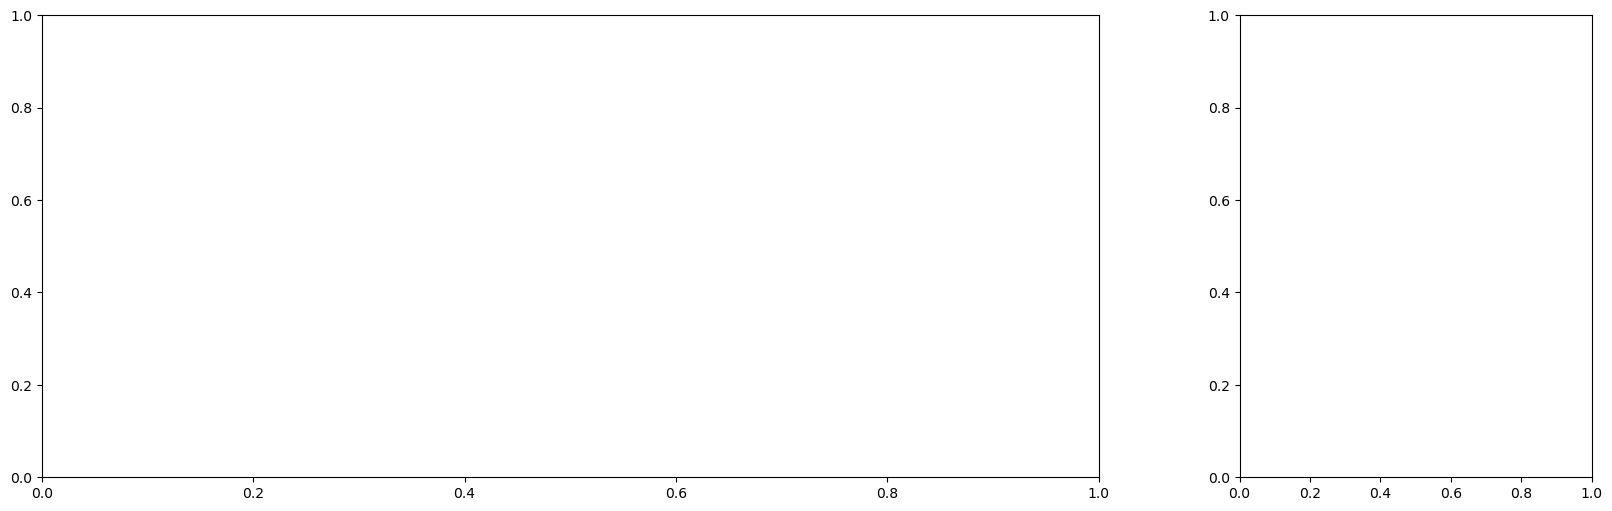

In [4]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager

# Define new colors for the plot
darker_blue =  (0, 191/255, 255/255) # Dark Blue for agreement
light_blue = (101/255, 67/255, 33/255)  # Light Blue for MIRCA-OS Only
dark_red = (139/255, 0, 0)  # Dark Red for MIRCA2000 Only

# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data
# # New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct
# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\US Validation\\2015\\MIRCA-OS New"
base_dir_2000 ="E:\\US Validation\\2015\\MirAD-US"
# Crop names
crops = ["Cotton","Maize","Soybeans", "Wheat"]
# Set up the plot dimensions and resolution
figsize = (10, 6)
dpi = 100  # Adjust the dpi to your preference for resolution

# Create a plot for each crop
for i, crop in enumerate(crops):  # Use enumerate to get the index
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(20, 6), 
                                     gridspec_kw={'width_ratios': [3, 1]})
    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)
    # Initialize combined RGB array with white background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))

    # Apply new colors based on the comparison
    combined_rgb[agree] = darker_blue  # Dark Blue for agreement
    combined_rgb[mirca_os_only] = light_blue  
    combined_rgb[mirca_2000_only] = dark_red  # Dark Red for
    # Plot map
    extent = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent)
    ax_map.set_title(f'{crop}', fontsize=24, fontname=title_font)
    ax_map.set_frame_on(False)
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Remove x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])

#  # Plot bar chart on ax_bar
    labels = ['Agreement', 'MIRCA_OS Only', 'MirAD-US Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=[darker_blue, light_blue, dark_red])
    ax_bar.set_ylabel('Percentage (%)',  fontsize=20)
    ax_bar.set_ylim(0, 100)
    ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font) 
    ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)
    if i == len(crops) - 1:  # Check if this is the last plot
        legend_elements = [
            mpatches.Patch(color=darker_blue, label='Agreement'),
            mpatches.Patch(color=light_blue, label='MIRCA-OS Only'),
            mpatches.Patch(color=dark_red, label='MirAD-US Only')
        ]
        # Adjust bbox_to_anchor to ensure the legend is inside the figure
        ax_map.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0),
                      ncol=1, borderaxespad=0., fontsize=24)
    # Adjust subplot parameters and layout
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()

    # Save the figure with both the map and bar chart for the current crop
    plt.savefig(f'E:\\US Validation\\Maps\\Maps_new\\{crop}_2015.png', bbox_inches='tight')
    plt.show()

C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


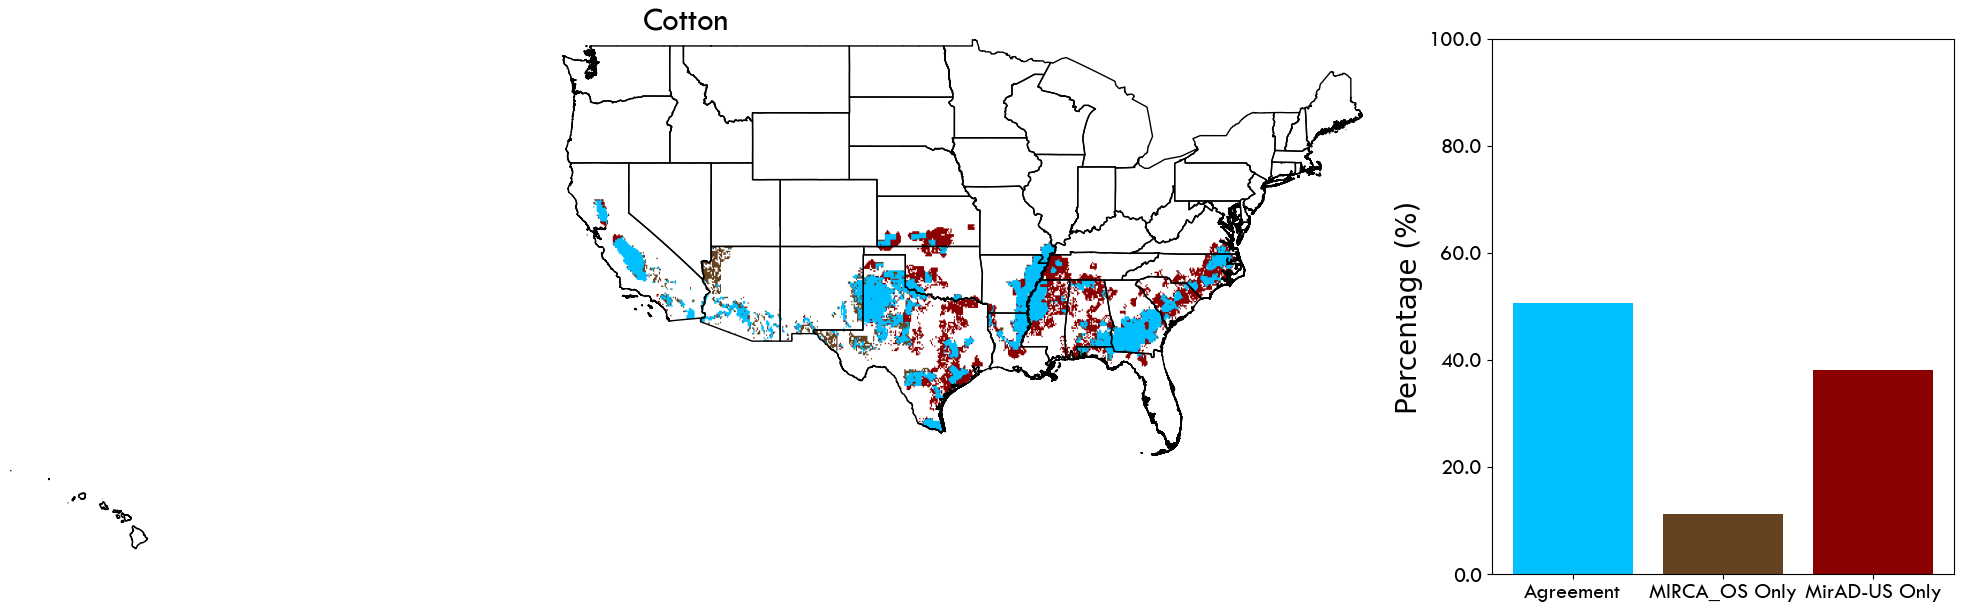

C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


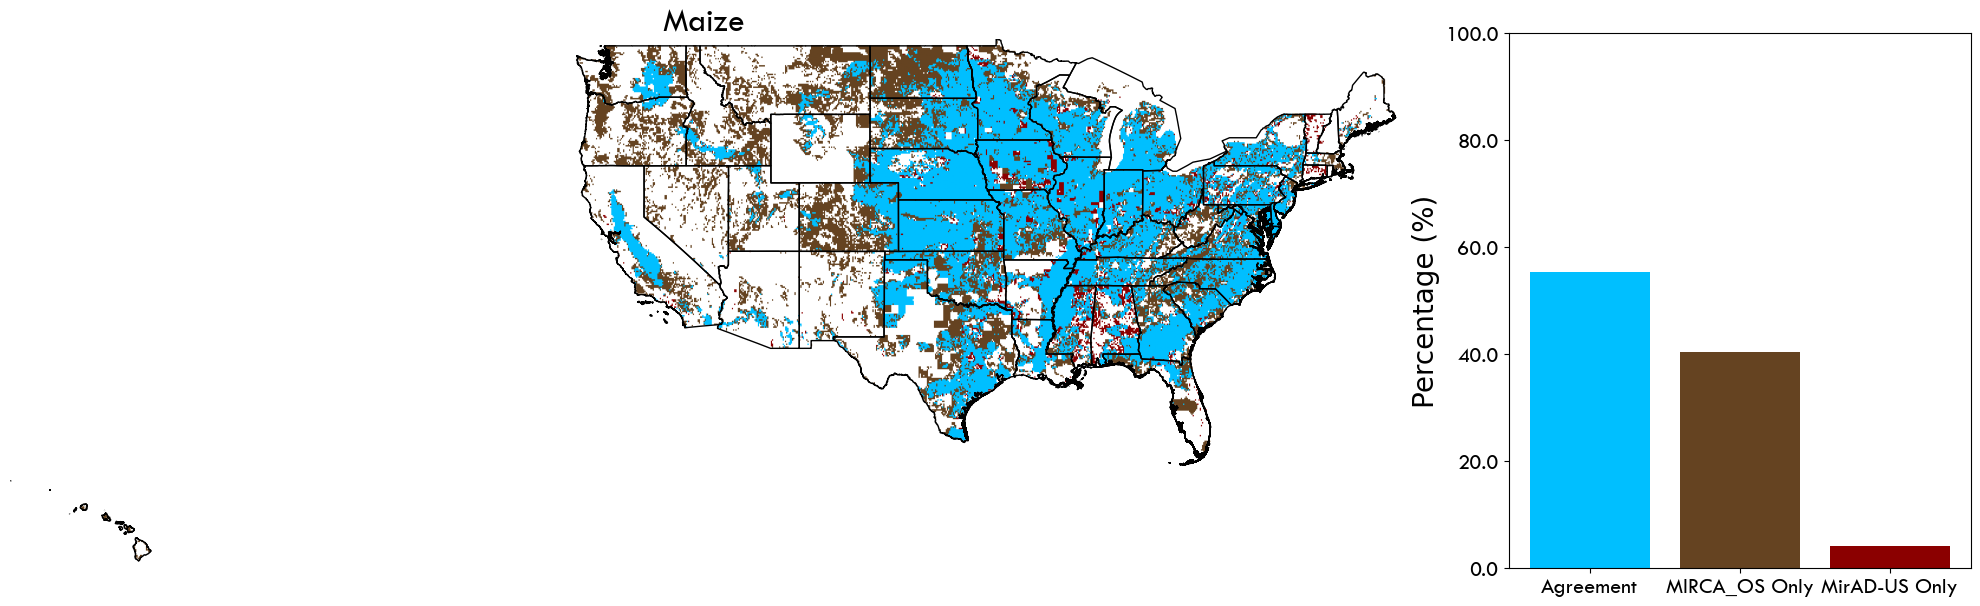

C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


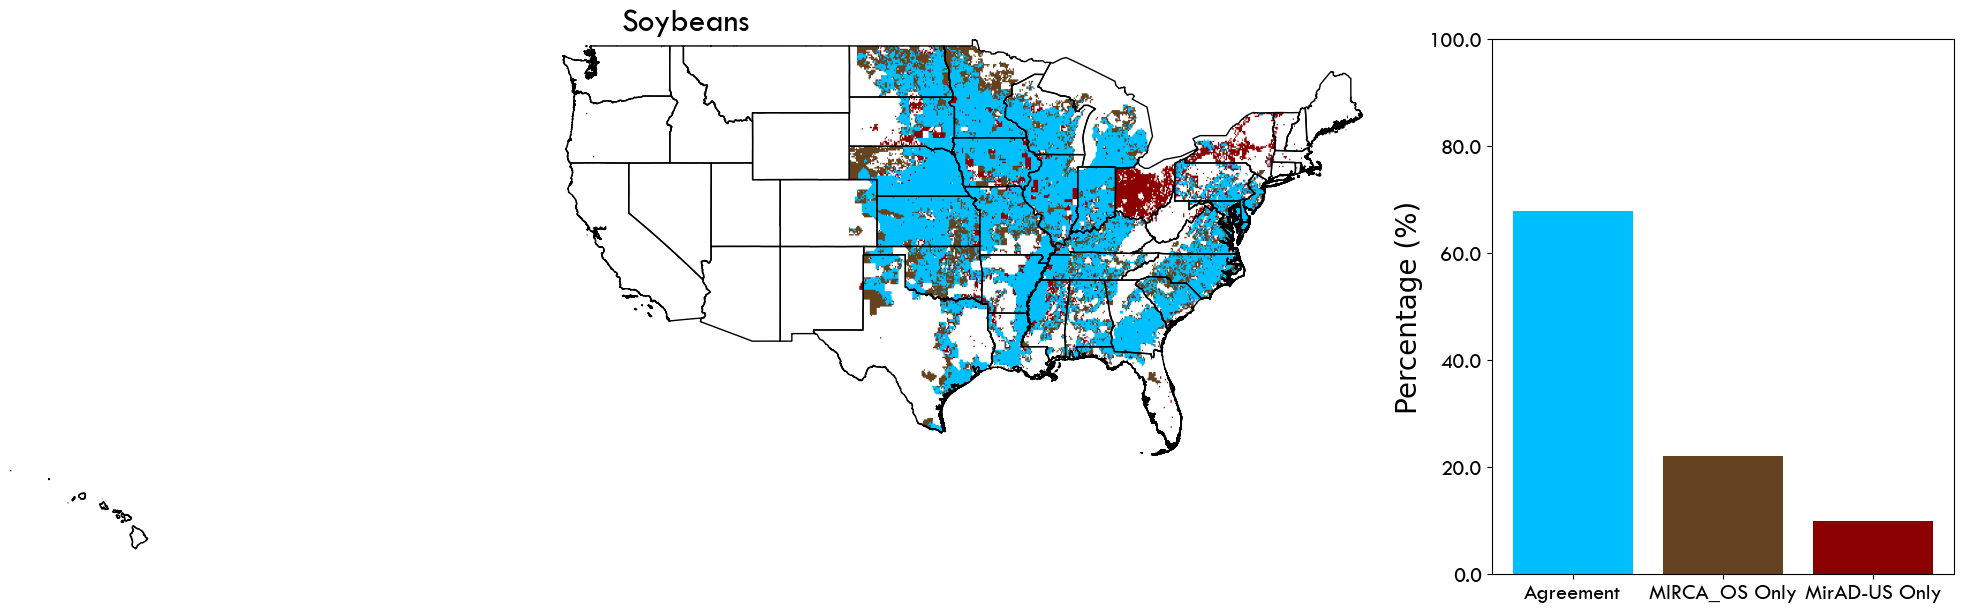

C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_2664\2875799817.py:176: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


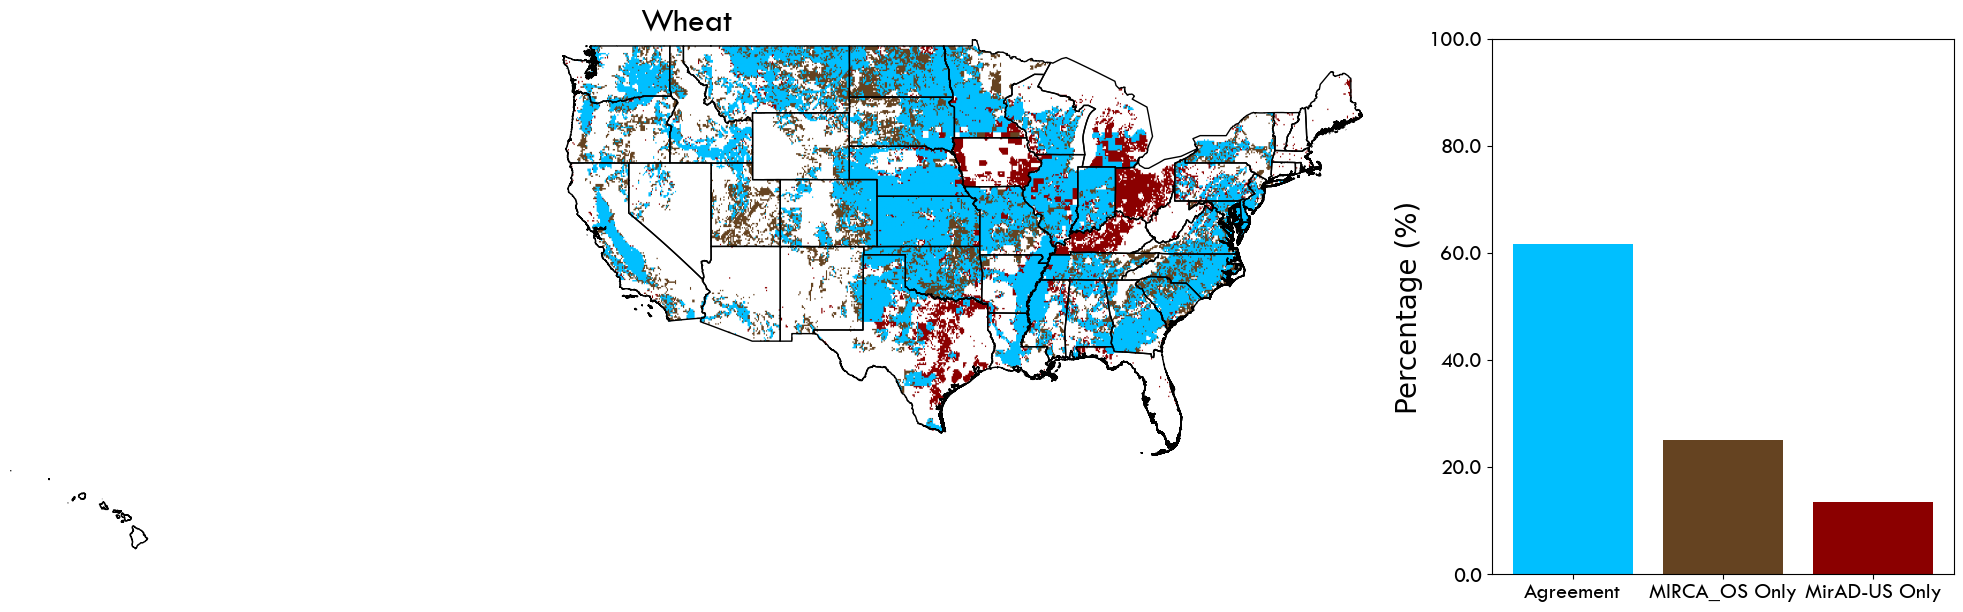

In [7]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager

# Define new colors for the plot
darker_blue =  (0, 191/255, 255/255)  # Dark Blue for agreement
light_blue = (101/255, 67/255, 33/255)  # Light Blue for MIRCA-OS Only
dark_red = (139/255, 0, 0)  # Dark Red for MIRCA2000 Only

# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform, src.crs

# Function to reproject and resample rasters to the same dimensions
def reproject_rasters(raster1_path, raster2_path, output1_path, output2_path):
    with rasterio.open(raster1_path) as src1, rasterio.open(raster2_path) as src2:
        # Calculate the maximum extent and resolution
        left = min(src1.bounds.left, src2.bounds.left)
        bottom = min(src1.bounds.bottom, src2.bounds.bottom)
        right = max(src1.bounds.right, src2.bounds.right)
        top = max(src1.bounds.top, src2.bounds.top)
        
        dst_transform, width, height = calculate_default_transform(
            src1.crs, src1.crs, width=src1.width, height=src1.height, 
            left=left, bottom=bottom, right=right, top=top
        )
        
        # Update profile for both rasters
        profile1 = src1.profile
        profile1.update({
            'crs': src1.crs,
            'transform': dst_transform,
            'width': width,
            'height': height
        })
        
        profile2 = src2.profile
        profile2.update({
            'crs': src2.crs,
            'transform': dst_transform,
            'width': width,
            'height': height
        })
        
        # Reproject raster1
        with rasterio.open(output1_path, 'w', **profile1) as dst1:
            for i in range(1, src1.count + 1):
                reproject(
                    source=rasterio.band(src1, i),
                    destination=rasterio.band(dst1, i),
                    src_transform=src1.transform,
                    src_crs=src1.crs,
                    dst_transform=dst_transform,
                    dst_crs=src1.crs,
                    resampling=Resampling.nearest
                )
        
        # Reproject raster2
        with rasterio.open(output2_path, 'w', **profile2) as dst2:
            for i in range(1, src2.count + 1):
                reproject(
                    source=rasterio.band(src2, i),
                    destination=rasterio.band(dst2, i),
                    src_transform=src2.transform,
                    src_crs=src2.crs,
                    dst_transform=dst_transform,
                    dst_crs=src2.crs,
                    resampling=Resampling.nearest
                )

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

# New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\US Validation\\2015\\MIRCA-OS New"
base_dir_2000 = "E:\\US Validation\\2015\\MirAD-US"
# Crop names
crops = ["Cotton", "Maize", "Soybeans", "Wheat"]

# Set up the plot dimensions and resolution
figsize = (10, 6)
dpi = 100  # Adjust the dpi to your preference for resolution

# Create a plot for each crop
for i, crop in enumerate(crops):  # Use enumerate to get the index
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(20, 6), 
                                         gridspec_kw={'width_ratios': [3, 1]})
    # Reproject and resample rasters to the same dimensions
    reproject_rasters(
        f'{base_dir_os}/{crop}.tif', f'{base_dir_2000}/{crop}.tif',
        f'{base_dir_os}/{crop}_reprojected.tif', f'{base_dir_2000}/{crop}_reprojected.tif'
    )

    # Process rasters
    raster1, transform1, _ = read_raster(f'{base_dir_os}/{crop}_reprojected.tif')
    raster2, transform2, _ = read_raster(f'{base_dir_2000}/{crop}_reprojected.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Initialize combined RGB array with white background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))

    # Apply new colors based on the comparison
    combined_rgb[agree] = darker_blue  # Dark Blue for agreement
    combined_rgb[mirca_os_only] = light_blue  
    combined_rgb[mirca_2000_only] = dark_red  # Dark Red for MIRCA2000 Only

    # Plot map
    extent = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent)
    ax_map.set_title(f'{crop}', fontsize=24, fontname=title_font)
    ax_map.set_frame_on(False)
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Remove x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])

    # Plot bar chart on ax_bar
    labels = ['Agreement', 'MIRCA_OS Only', 'MirAD-US Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=[darker_blue, light_blue, dark_red])
    ax_bar.set_ylabel('Percentage (%)', fontsize=20)
    ax_bar.set_ylim(0, 100)
    ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font) 
    ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)

#     if i == len(crops) - 1:  # Check if this is the last plot
#         legend_elements = [
#             mpatches.Patch(color=darker_blue, label='Agreement'),
#             mpatches.Patch(color=light_blue, label='MIRCA-OS Only'),
#             mpatches.Patch(color=dark_red, label='MirAD-US Only')
#         ]
#         # Adjust bbox_to_anchor to ensure the legend is inside the figure
#         ax_map.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0),
#                       ncol=1, borderaxespad=0., fontsize=24)

    # Adjust subplot parameters and layout
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()

    # Save the figure with both the map and bar chart for the current crop
    plt.savefig(f'E:\\US Validation\\Maps\\Maps_new\\{crop}_2015.png', bbox_inches='tight')
    plt.show()


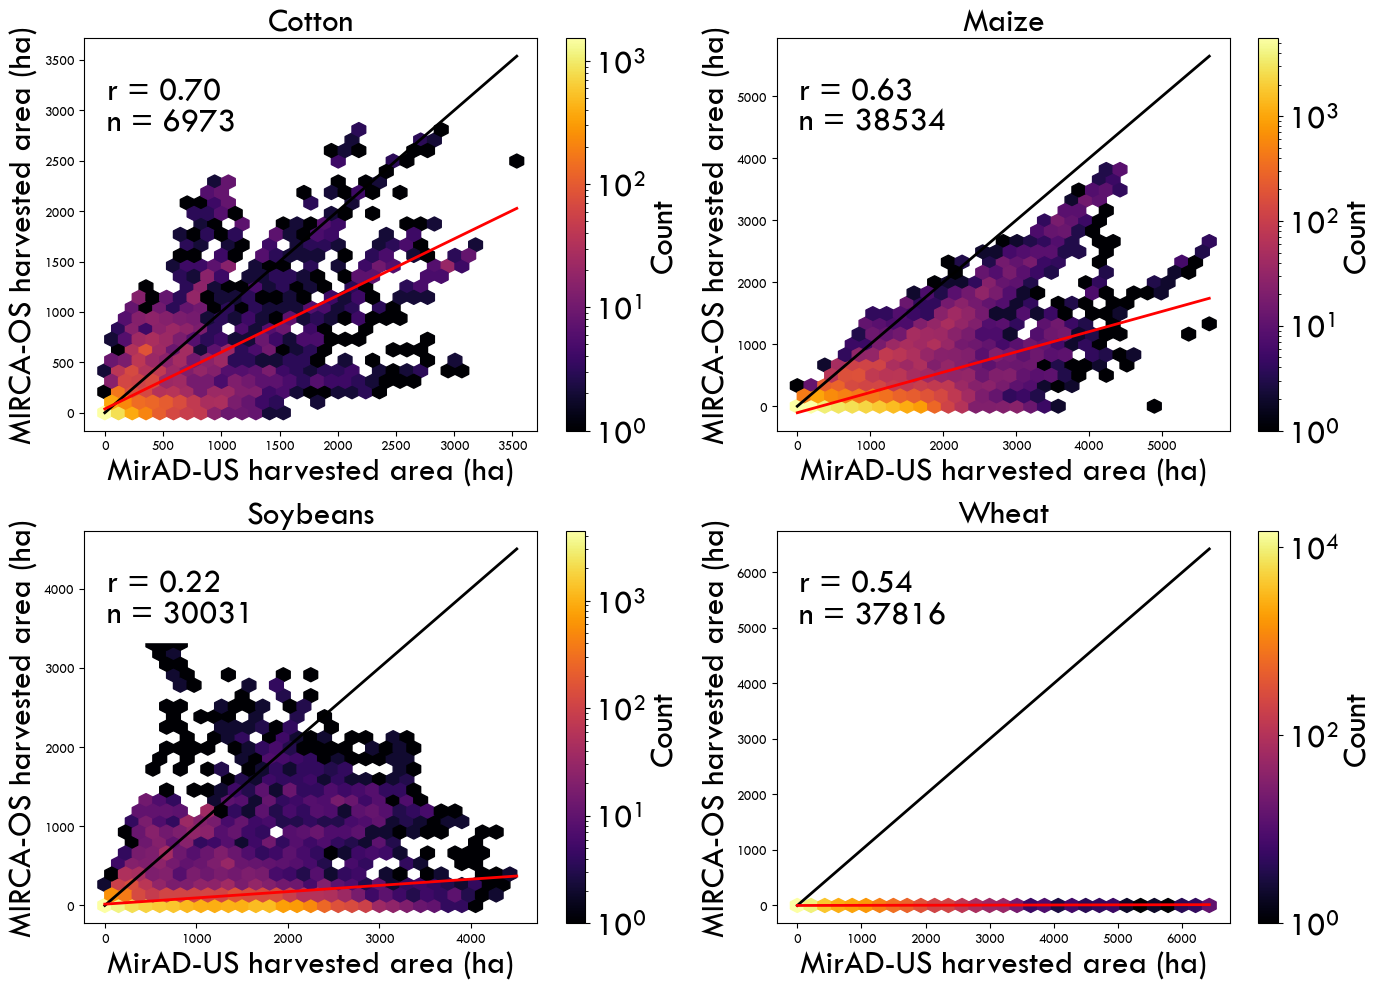

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.warp import reproject, Resampling
from scipy.stats import linregress, pearsonr

# Set the font family globally for all plots
plt.rcParams['font.family'] = 'Tw Cen MT'

# Define the base font size
font_size = 24

# Define the clean_raster_data function
def clean_raster_data(raster_data):
    """
    Replace extreme negative and positive values in raster data with zero while keeping NaN values unchanged.

    Parameters:
    raster_data (np.array): The input raster data as a NumPy array.

    Returns:
    np.array: The raster data with extreme values set to zero.
    """
    return np.where((raster_data < 0) | (raster_data == -1e+38), 0, raster_data)

# Define the plot_scatter_and_regression function
def plot_scatter_and_regression(ax, x, y, crop_name):
    # Ensure that we remove no_data_values from the data before plotting
    mask = (x != no_data_value) & (y != no_data_value)
    x = x[mask]
    y = y[mask]
    
    # Calculate the Pearson correlation coefficient
    r, _ = pearsonr(x, y)

    # Calculate the common range for x and y axes
    common_min = min(np.nanmin(x), np.nanmin(y))
    common_max = max(np.nanmax(x), np.nanmax(y))
    
    # Create a hexbin plot 
    hb = ax.hexbin(x, y, gridsize=30, cmap='inferno', bins='log', extent=(common_min, common_max, common_min, common_max))
    cbar = ax.figure.colorbar(hb, ax=ax, label='Count')
    cbar.ax.tick_params(labelsize=font_size)  # Set the fontsize for colorbar ticks
    cbar.set_label('Count', size=font_size)  # Set the fontsize for colorbar label

    # Add the 1:1 line
    ax.plot([common_min, common_max], [common_min, common_max], color='black', linestyle='-', linewidth=2)

    # Perform linear regression
    slope, intercept = linregress(x, y)[:2]
    ax.plot([common_min, common_max], [intercept + slope * common_min, intercept + slope * common_max], color='red', linewidth=2)

    # Add text annotation in the plot
    text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
    text_y = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1
    ax.text(text_x, text_y, f'r = {r:.2f}\nn = {len(x)}', color='black', ha='left', va='top', backgroundcolor='white', fontsize=font_size)

   # Define the paths to the directories
    # Set axis labels and title
    ax.set_xlabel('MirAD-US harvested area (ha)', fontsize=font_size)
    ax.set_ylabel('MIRCA-OS harvested area (ha)', fontsize=font_size)
    ax.set_title(f'{crop_name}', fontsize=font_size)

def ensure_same_dimensions(src1, src2):
    """
    Ensure both rasters have the same dimensions. If not, resample src2 to match src1.

    Parameters:
    src1, src2 (rasterio.io.DatasetReader): The input raster datasets.

    Returns:
    np.array, np.array: The raster data with matching dimensions.
    """
    if src1.shape != src2.shape:
        data2_resampled = np.empty_like(src1.read(1))
        reproject(
            source=rasterio.band(src2, 1),
            destination=data2_resampled,
            src_transform=src2.transform,
            src_crs=src2.crs,
            dst_transform=src1.transform,
            dst_crs=src1.crs,
            resampling=Resampling.nearest
        )
        return src1.read(1), data2_resampled
    else:
        return src1.read(1), src2.read(1)

# Define no_data_value
no_data_value = 0



# Define no_data_value
no_data_value = 0

# Define the paths to the directories
folder1 = "E:\\US Validation\\2015\\MirAD-US"
folder2 = "E:\\US Validation\\2015\\MIRCA-OS New"

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

# List the raster files
rasters1 = {os.path.splitext(file)[0]: os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.tif')}
rasters2 = {os.path.splitext(file)[0]: os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.tif')}

# Iterate over the rasters
for crop_name, raster_path1 in rasters1.items():
    raster_path2 = rasters2.get(crop_name)
    if raster_path2:
        with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
            # Ensure both rasters have the same dimensions
            data1, data2 = ensure_same_dimensions(src1, src2)

            # Apply the cleaning function
            data1 = clean_raster_data(data1)
            data2 = clean_raster_data(data2)

            # Flatten the arrays to create a 1D array for each
            data1 = data1.flatten()
            data2 = data2.flatten()

            # Check if there is any valid data left after cleaning
            if np.all(data1 == no_data_value) or np.all(data2 == no_data_value):
                print(f"All data for {crop_name} are no-data after cleaning.")
                continue

            # Find the next available subplot
            ax = next((ax for ax in axs if not ax.has_data()), None)
            if ax is None:
                print("No more empty subplots available.")
                break

            # Plot the data on the corresponding subplot axis
            plot_scatter_and_regression(ax, data1, data2, crop_name)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig(f'E:\\US Validation\\2015\\\\New Maps\\1_ir.png', bbox_inches='tight')
plt.show()


ValueError: operands could not be broadcast together with shapes (94080,) (429684,) 

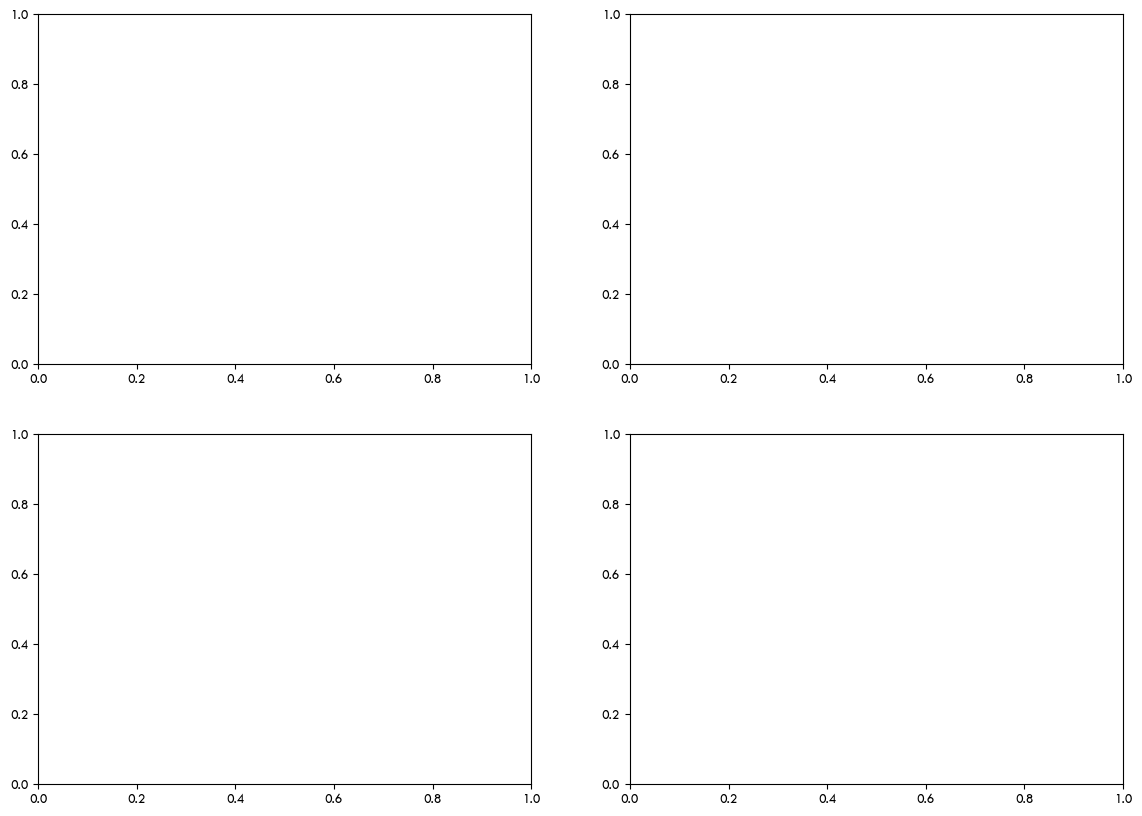

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from scipy.stats import linregress, pearsonr

# Set the font family globally for all plots
plt.rcParams['font.family'] = 'Tw Cen MT'

# Define the base font size
font_size = 24

# Define the clean_raster_data function
def clean_raster_data(raster_data):
    """
    Replace extreme negative and positive values in raster data with zero while keeping NaN values unchanged.

    Parameters:
    raster_data (np.array): The input raster data as a NumPy array.

    Returns:
    np.array: The raster data with extreme values set to zero.
    """
    return np.where((raster_data < 0) | (raster_data > 1e+38), 0, raster_data)

# Define the plot_scatter_and_regression function
def plot_scatter_and_regression(ax, x, y, crop_name):
    # Ensure that we remove no_data_values from the data before plotting
    mask = (x != no_data_value) & (y != no_data_value)
    x = x[mask]
    y = y[mask]
    
    # Calculate the Pearson correlation coefficient
    r, _ = pearsonr(x, y)

    # Calculate the common range for x and y axes
    common_min = min(np.nanmin(x), np.nanmin(y))
    common_max = max(np.nanmax(x), np.nanmax(y))
    
    # Create a hexbin plot 
    hb = ax.hexbin(x, y, gridsize=30, cmap='inferno', bins='log', extent=(common_min, common_max, common_min, common_max))
#     hb = ax.hexbin(x, y, gridsize=50, cmap='plasma', bins='log', )
    cbar = ax.figure.colorbar(hb, ax=ax, label='Count')
    cbar.ax.tick_params(labelsize=font_size)  # Set the fontsize for colorbar ticks
    cbar.set_label('Count', size=font_size)  # Set the fontsize for colorbar label

    # Add the 1:1 line
    ax.plot([common_min, common_max], [common_min, common_max], color='black', linestyle='-', linewidth=2)

    # Perform linear regression
    slope, intercept = linregress(x, y)[:2]
    ax.plot([common_min, common_max], [intercept + slope * common_min, intercept + slope * common_max], color='red', linewidth=2)

    # Add text annotation in the plot
    text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
    text_y = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1
    ax.text(text_x, text_y, f'r = {r:.2f}\nn = {len(x)}', color='black', ha='left', va='top', backgroundcolor='white', fontsize=font_size)

    # Set axis labels and title
    ax.set_xlabel('MirAD-US harvested area (ha)', fontsize=font_size)
    ax.set_ylabel('MIRCA-OS harvested area (ha)', fontsize=font_size)
    ax.set_title(f'{crop_name}', fontsize=font_size)

# Define no_data_value
no_data_value = 0

# Define the paths to the directories
folder1 = "E:\\US Validation\\2015\\MirAD-US"
folder2 = "E:\\US Validation\\2015\\MIRCA-OS New"
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

# List the raster files
rasters1 = {os.path.splitext(file)[0]: os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.tif')}
rasters2 = {os.path.splitext(file)[0]: os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.tif')}

# Iterate over the rasters
# Iterate over the rasters
for crop_name, raster_path1 in rasters1.items():
    raster_path2 = rasters2.get(crop_name)
    if raster_path2:
        with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
            # Read the data and apply the cleaning function
            data1 = clean_raster_data(src1.read(1))
            data2 = clean_raster_data(src2.read(1))

            # Flatten the arrays to create a 1D array for each
            data1 = data1.flatten()
            data2 = data2.flatten()

            # Check if there is any valid data left after cleaning
            if np.all(data1 == no_data_value) or np.all(data2 == no_data_value):
                print(f"All data for {crop_name} are no-data after cleaning.")
                continue

            # Find the next available subplot
            ax = next((ax for ax in axs if not ax.has_data()), None)
            if ax is None:
                print("No more empty subplots available.")
                break

            # Plot the data on the corresponding subplot axis
            plot_scatter_and_regression(ax, data1, data2, crop_name)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig(f'E:\\US Validation\\2015\\New Maps\\1_ir.png', bbox_inches='tight')
plt.show()


C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


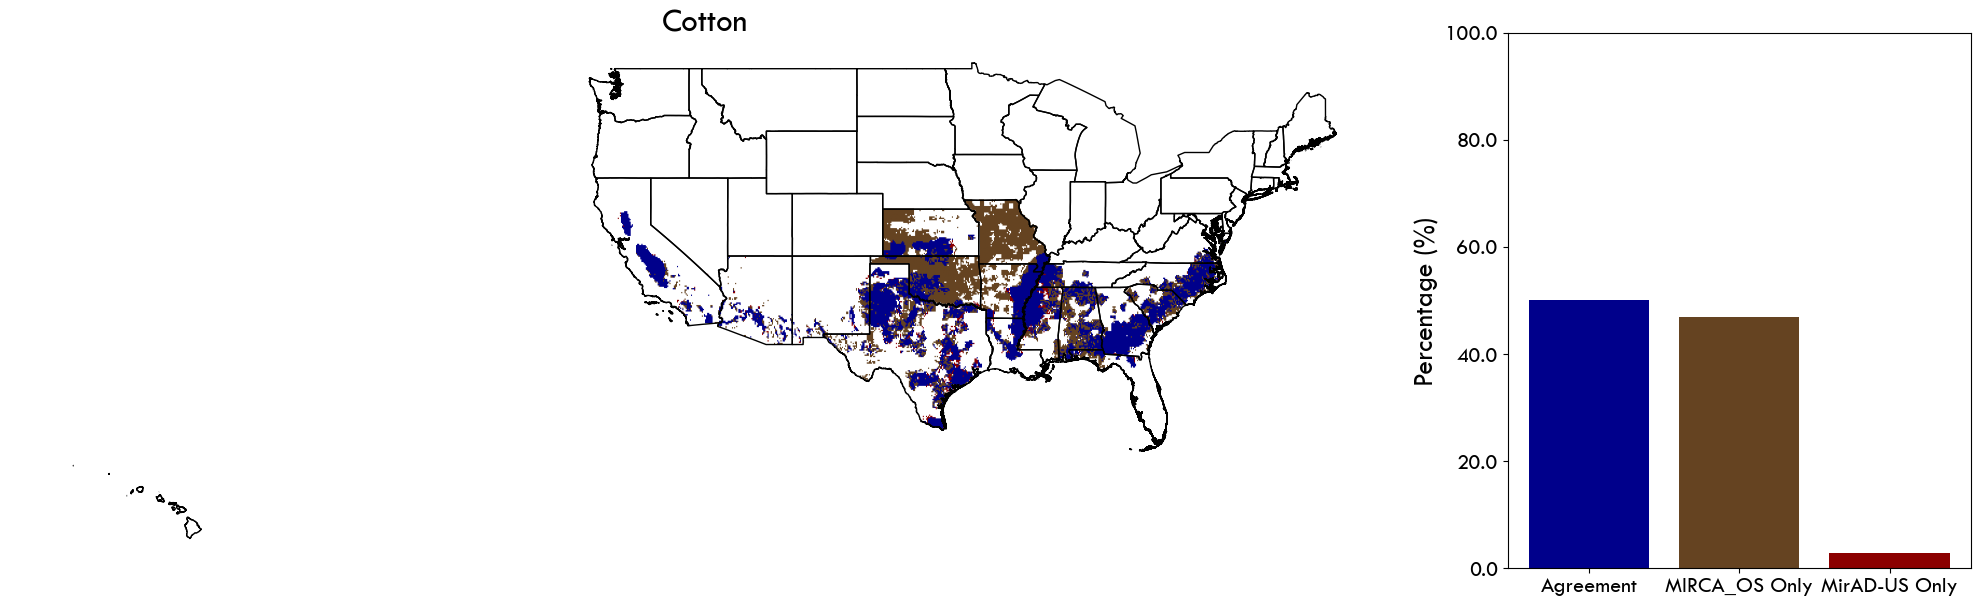

C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


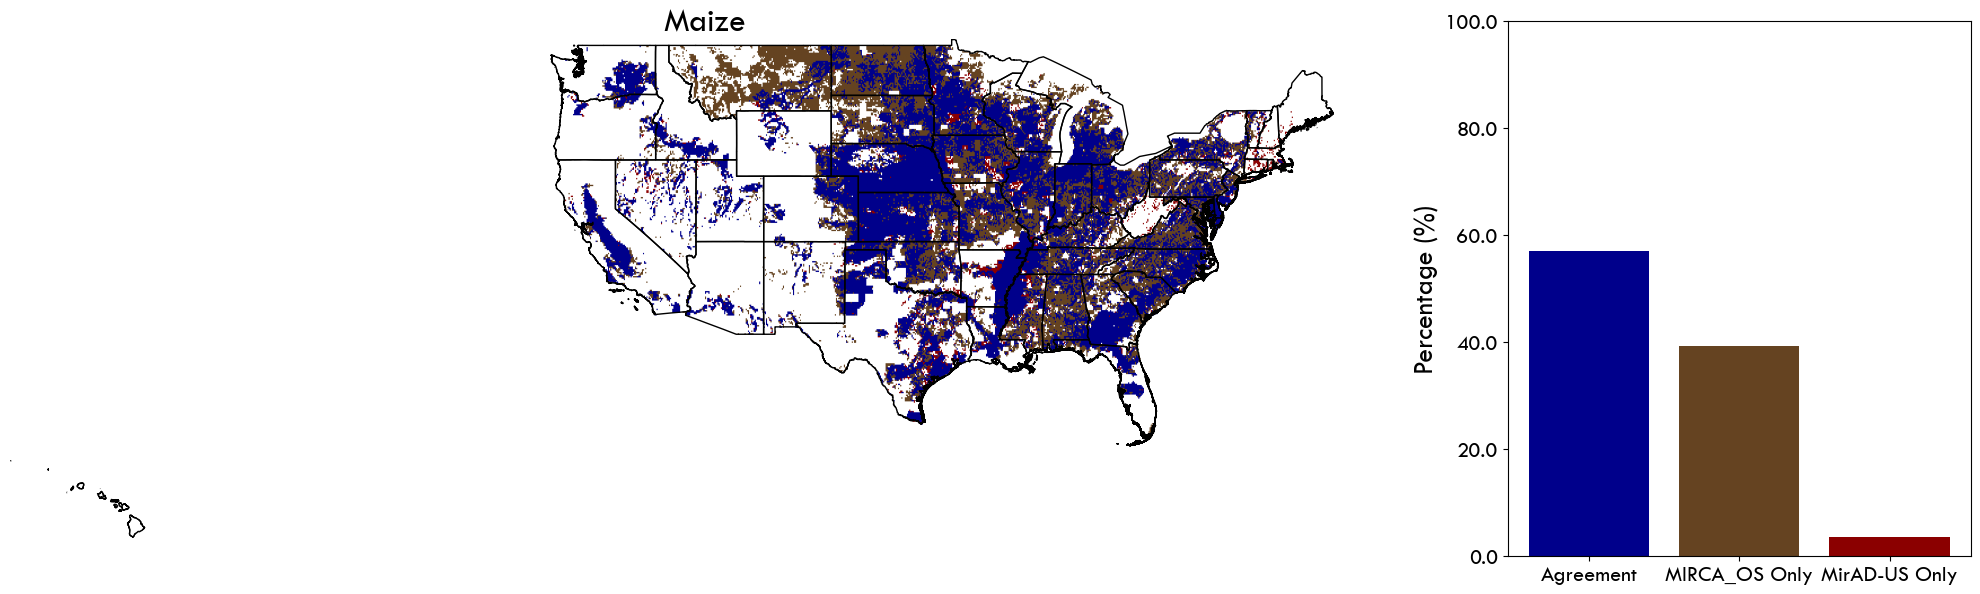

C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


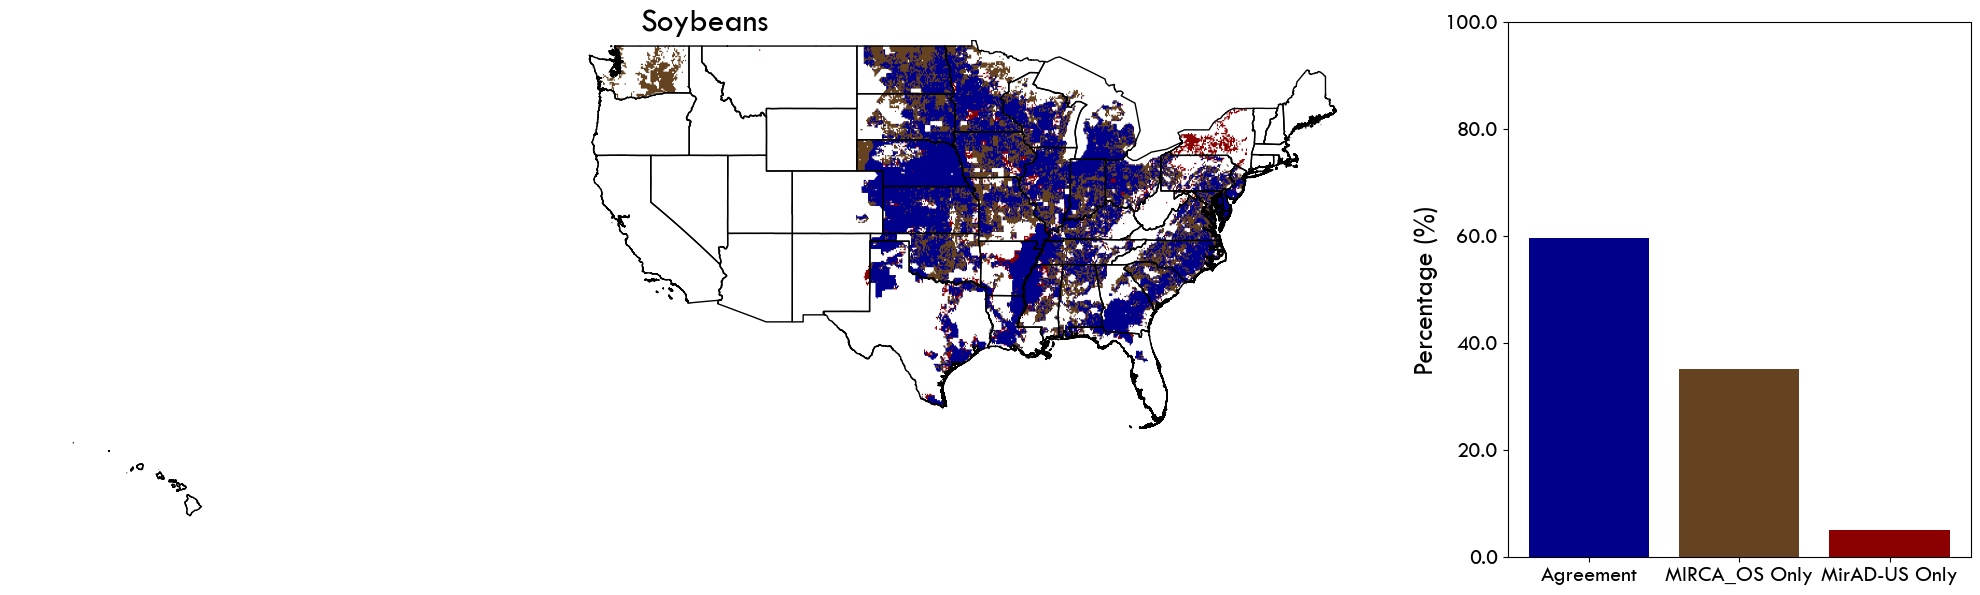

C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font)
C:\Users\endal\AppData\Local\Temp\ipykernel_16648\534225918.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)


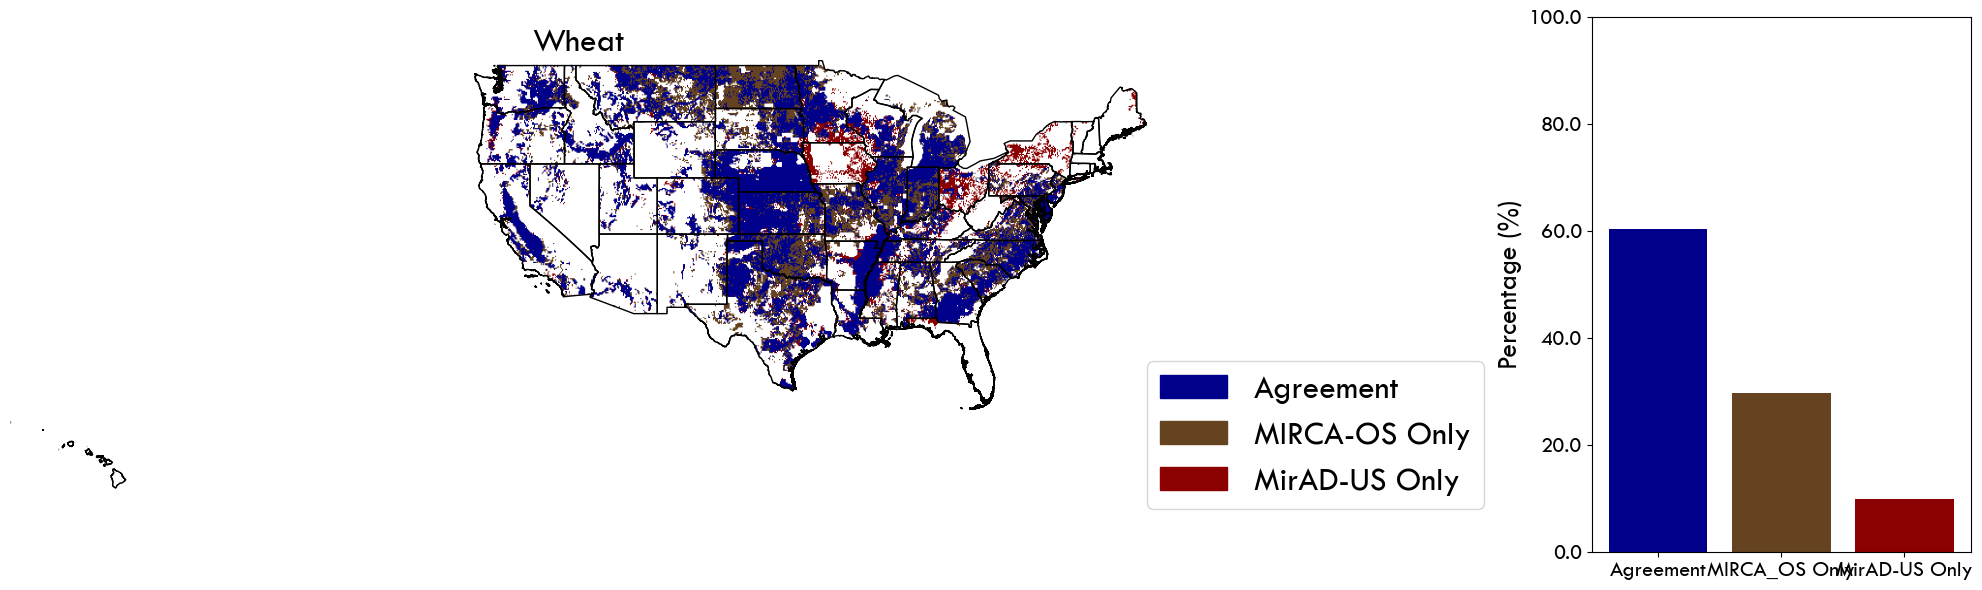

In [50]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager

# Define new colors for the plot
darker_blue = (0, 0, 139/255)  # Dark Blue for agreement
light_blue = (101/255, 67/255, 33/255)  # Light Blue for MIRCA-OS Only
dark_red = (139/255, 0, 0)  # Dark Red for MIRCA2000 Only

# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform

# Function to compare rasters and return presence/absence data
def compare_rasters(raster1, raster2):
    agree = (raster1 > 0) & (raster2 > 0)
    mirca_os_only = (raster1 > 0) & (raster2 == 0)
    mirca_2000_only = (raster1 == 0) & (raster2 > 0)
    return agree, mirca_os_only, mirca_2000_only

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data
# # New function to calculate agreement percentages for the bar chart based on counts
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct
# Load the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"
world = gpd.read_file(shapefile_path)

# Directories for raster data
base_dir_os = "E:\\US Validation\\2010\\MIRCA-OS"
base_dir_2000 ="E:\\US Validation\\2010\\MirAD-US"
# Crop names
crops = ["Cotton","Maize","Soybeans", "Wheat"]
# Set up the plot dimensions and resolution
figsize = (10, 6)
dpi = 100  # Adjust the dpi to your preference for resolution

# Create a plot for each crop
for i, crop in enumerate(crops):  # Use enumerate to get the index
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(20, 6), 
                                     gridspec_kw={'width_ratios': [3, 1]})
    # Process rasters
    raster1, transform1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2 = clean_raster_data(raster2)

    # Compare rasters
    agree, mirca_os_only, mirca_2000_only = compare_rasters(raster1, raster2)
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)
    # Initialize combined RGB array with white background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))

    # Apply new colors based on the comparison
    combined_rgb[agree] = darker_blue  # Dark Blue for agreement
    combined_rgb[mirca_os_only] = light_blue  
    combined_rgb[mirca_2000_only] = dark_red  # Dark Red for
    # Plot map
    extent = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent)
    ax_map.set_title(f'{crop}', fontsize=24, fontname=title_font)
    ax_map.set_frame_on(False)
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Remove x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])

#  # Plot bar chart on ax_bar
    labels = ['Agreement', 'MIRCA_OS Only', 'MirAD-US Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=[darker_blue, light_blue, dark_red])
    ax_bar.set_ylabel('Percentage (%)',  fontsize=20)
    ax_bar.set_ylim(0, 100)
    ax_bar.set_xticklabels(labels, fontsize=16, fontname=title_font) 
    ax_bar.set_yticklabels(ax_bar.get_yticks(), fontsize=16, fontname=title_font)
    if i == len(crops) - 1:  # Check if this is the last plot
        legend_elements = [
            mpatches.Patch(color=darker_blue, label='Agreement'),
            mpatches.Patch(color=light_blue, label='MIRCA-OS Only'),
            mpatches.Patch(color=dark_red, label='MirAD-US Only')
        ]
        # Adjust bbox_to_anchor to ensure the legend is inside the figure
        ax_map.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0),
                      ncol=1, borderaxespad=0., fontsize=24)
    # Adjust subplot parameters and layout
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()

    # Save the figure with both the map and bar chart for the current crop
    plt.savefig(f'E:\\US Validation\\Maps\\Irrigated_MIRCA\\{crop}_2010.png', bbox_inches='tight')
    plt.show()

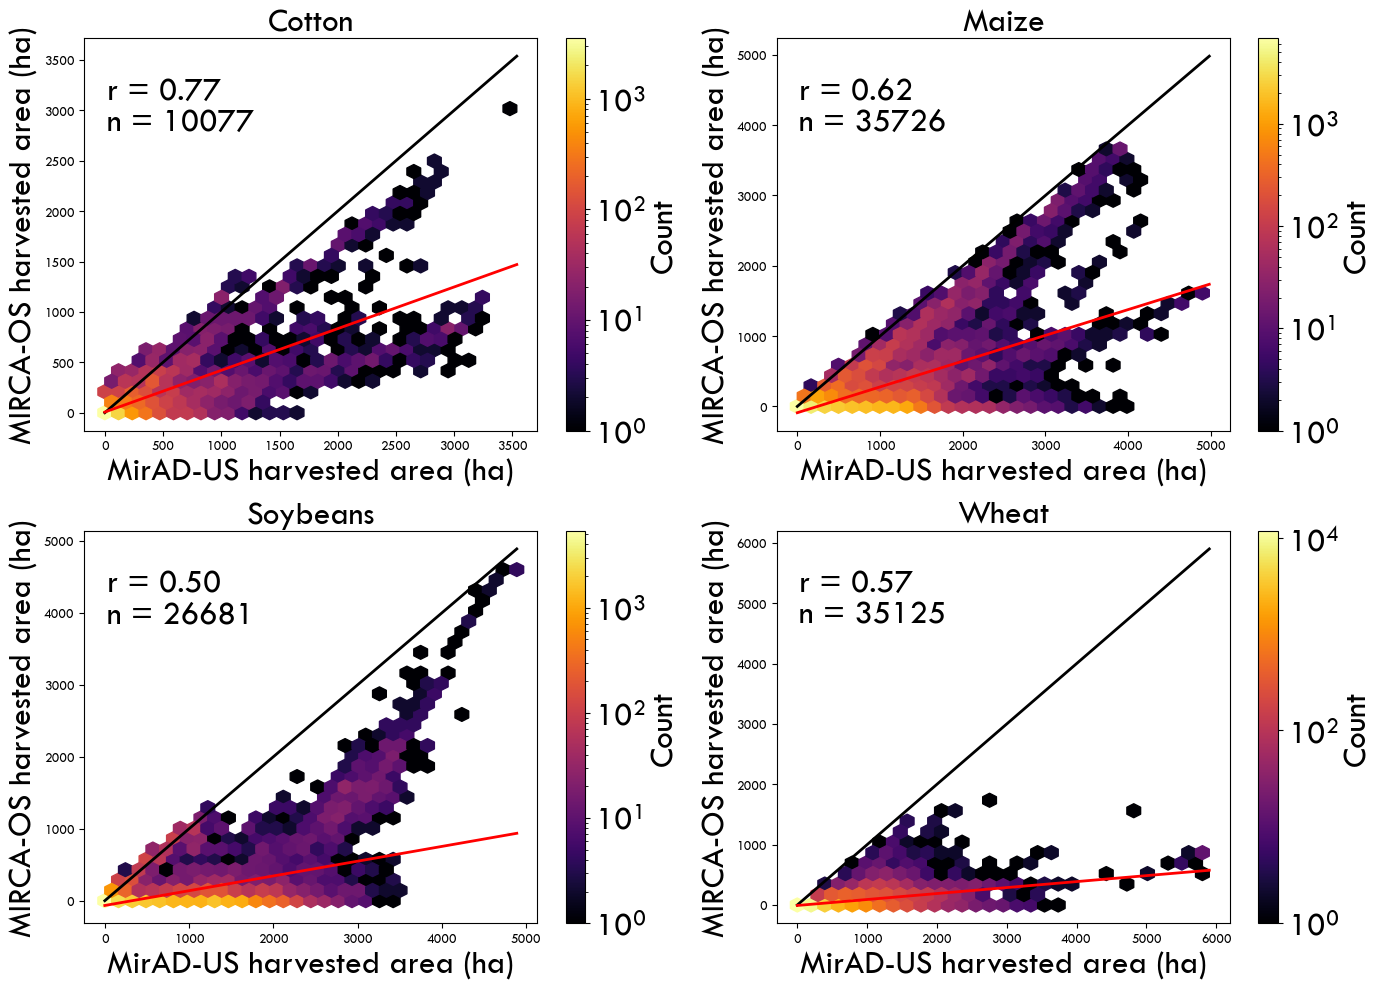

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from scipy.stats import linregress, pearsonr

# Set the font family globally for all plots
plt.rcParams['font.family'] = 'Tw Cen MT'

# Define the base font size
font_size = 24

# Define the clean_raster_data function
def clean_raster_data(raster_data):
    """
    Replace extreme negative and positive values in raster data with zero while keeping NaN values unchanged.

    Parameters:
    raster_data (np.array): The input raster data as a NumPy array.

    Returns:
    np.array: The raster data with extreme values set to zero.
    """
    return np.where((raster_data < 0) | (raster_data > 1e+38), 0, raster_data)

# Define the plot_scatter_and_regression function
def plot_scatter_and_regression(ax, x, y, crop_name):
    # Ensure that we remove no_data_values from the data before plotting
    mask = (x != no_data_value) & (y != no_data_value)
    x = x[mask]
    y = y[mask]
    
    # Calculate the Pearson correlation coefficient
    r, _ = pearsonr(x, y)

    # Calculate the common range for x and y axes
    common_min = min(np.nanmin(x), np.nanmin(y))
    common_max = max(np.nanmax(x), np.nanmax(y))
    
    # Create a hexbin plot 
    hb = ax.hexbin(x, y, gridsize=30, cmap='inferno', bins='log', extent=(common_min, common_max, common_min, common_max))
#     hb = ax.hexbin(x, y, gridsize=50, cmap='plasma', bins='log', )
    cbar = ax.figure.colorbar(hb, ax=ax, label='Count')
    cbar.ax.tick_params(labelsize=font_size)  # Set the fontsize for colorbar ticks
    cbar.set_label('Count', size=font_size)  # Set the fontsize for colorbar label

    # Add the 1:1 line
    ax.plot([common_min, common_max], [common_min, common_max], color='black', linestyle='-', linewidth=2)

    # Perform linear regression
    slope, intercept = linregress(x, y)[:2]
    ax.plot([common_min, common_max], [intercept + slope * common_min, intercept + slope * common_max], color='red', linewidth=2)

    # Add text annotation in the plot
    text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
    text_y = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1
    ax.text(text_x, text_y, f'r = {r:.2f}\nn = {len(x)}', color='black', ha='left', va='top', backgroundcolor='white', fontsize=font_size)

    # Set axis labels and title
    ax.set_xlabel('MirAD-US harvested area (ha)', fontsize=font_size)
    ax.set_ylabel('MIRCA-OS harvested area (ha)', fontsize=font_size)
    ax.set_title(f'{crop_name}', fontsize=font_size)


# Define no_data_value
no_data_value = 0

# Define the paths to the directories
folder1 = "E:\\US Validation\\2010\\MirAD-US"
folder2 = "E:\\US Validation\\2010\\MIRCA-OS"

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

# List the raster files
rasters1 = {os.path.splitext(file)[0]: os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.tif')}
rasters2 = {os.path.splitext(file)[0]: os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.tif')}

# Iterate over the rasters
# Iterate over the rasters
for crop_name, raster_path1 in rasters1.items():
    raster_path2 = rasters2.get(crop_name)
    if raster_path2:
        with rasterio.open(raster_path1) as src1, rasterio.open(raster_path2) as src2:
            # Read the data and apply the cleaning function
            data1 = clean_raster_data(src1.read(1))
            data2 = clean_raster_data(src2.read(1))

            # Flatten the arrays to create a 1D array for each
            data1 = data1.flatten()
            data2 = data2.flatten()

            # Check if there is any valid data left after cleaning
            if np.all(data1 == no_data_value) or np.all(data2 == no_data_value):
                print(f"All data for {crop_name} are no-data after cleaning.")
                continue

            # Find the next available subplot
            ax = next((ax for ax in axs if not ax.has_data()), None)
            if ax is None:
                print("No more empty subplots available.")
                break

            # Plot the data on the corresponding subplot axis
            plot_scatter_and_regression(ax, data1, data2, crop_name)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig(f'E:\\US Validation\\Maps\\Irrigated_MIRCA\\1_ir_2010.png', bbox_inches='tight')
plt.show()


In [72]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling


# Path to the directory containing raster files
raster_folder = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\AH Grid\\2010"

# Path to the shapefile
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\North America\\shapefile\\gadm41_USA_1.shp"

# Path to the output directory where clipped rasters will be saved
output_folder = "E:\\US Validation\\2010_all\\MirAD-US"
mirad_map_path = "E:\\US Validation\\validation\\MirAD\\Map\\MirAD_2010.tif"
# Load the MirAD map to get its transform and CRS
with rasterio.open(mirad_map_path) as mirad_src:
    mirad_transform = mirad_src.transform
    mirad_crs = mirad_src.crs
    mirad_width = mirad_src.width
    mirad_height = mirad_src.height
# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the shapefile using Geopandas
shapefile = gpd.read_file(shapefile_path)

# Loop through each file in the raster directory
for raster_file in os.listdir(raster_folder):
    if raster_file.endswith(('.tif', '.TIF')):
        # Construct the full file path
        raster_path = os.path.join(raster_folder, raster_file)
        
        # Open the raster file
        with rasterio.open(raster_path) as src:
             # Clip the raster with the shapefile's geometries
            out_image, out_transform = mask(src, shapefile.geometry, crop=True)
            out_meta = src.meta.copy()

            # Resample/Reproject the clipped raster to match the MirAD map's resolution, transform, and CRS
            resampled_image = np.zeros((src.count, mirad_height, mirad_width), dtype=rasterio.float32)
            reproject(
                source=out_image,
                destination=resampled_image,
                src_transform=out_transform,
                src_crs=out_meta['crs'],
                dst_transform=mirad_transform,
                dst_crs=mirad_crs,
                resampling=Resampling.nearest
            )

            # Update the metadata with new dimensions, transform, and CRS to match the MirAD map
            out_meta.update({
                "driver": "GTiff",
                "height": mirad_height,
                "width": mirad_width,
                "transform": mirad_transform,
                "crs": mirad_crs
            })

            # Save the clipped and resampled raster to the output directory
            output_path = os.path.join(output_folder, raster_file)
            with rasterio.open(output_path, "w", **out_meta) as dest:
                dest.write(resampled_image)

print("Clipping completed.")

Clipping completed.


In [73]:
import os
import rasterio
import numpy as np

# Define the path to the MirAD map and the folder for crop-specific maps
mirad_map_path  = "E:\\US Validation\\validation\\MirAD\\Map\\MirAD_2010.tif"
crop_dir_path  = "E:\\US Validation\\2010_all\\MirAD-US"
output_dir_path  = "E:\\US Validation\\2010_all\\MirAD-US\\MirAD-US"

# Open the MirAD map raster
with rasterio.open(mirad_map_path) as mirad_src:
    mirad_data = mirad_src.read(1)  # Assume data is in the first band

    # Get a list of all crop TIFF files in the directory
    crop_files = [f for f in os.listdir(crop_dir_path) if f.endswith('.tif')]

    # Process each crop TIFF file
    for crop_file in crop_files:
        crop_path = os.path.join(crop_dir_path, crop_file)
        output_path = os.path.join(output_dir_path, crop_file)

        # Open the crop-specific raster
        with rasterio.open(crop_path) as crop_src:
            crop_data = crop_src.read(1)  # Assume data is in the first band

            # Check if both rasters have the same shape
            if mirad_data.shape != crop_data.shape:
                raise ValueError(f"The MirAD map and crop-specific raster {crop_file} do not have the same dimensions.")

            # Create the condition array
            condition = (mirad_data > 0) & (crop_data > 0)

            # Apply the condition
            result_data = np.where(condition, crop_data, 0)

            # Create a new raster for the result
            meta = crop_src.meta.copy()
            with rasterio.open(output_path, 'w', **meta) as out_dst:
                out_dst.write(result_data, 1)
        print(f"Processed {crop_file}")

Processed Barley.tif
Processed Cassava.tif
Processed Coffee.tif
Processed Cotton.tif
Processed Fodder.tif
Processed Groundnuts.tif
Processed Maize.tif
Processed Millet.tif
Processed Oil palm.tif
Processed Others annual.tif
Processed Others perennial.tif
Processed Potatoes.tif
Processed Pulses.tif
Processed Rapeseed.tif
Processed Rice.tif
Processed Rye.tif
Processed Sorghum.tif
Processed Soybeans.tif
Processed Sugar beet.tif
Processed Sugar cane.tif
Processed Sunflower.tif
Processed Wheat.tif


In [76]:
from osgeo import gdal
import numpy as np
import glob
import os

from osgeo import gdal
import numpy as np
import glob

def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    """
    Cleans raster data by replacing extreme negative values with 0.
    
    Parameters:
    - raster_data: The raster data array.
    - extreme_value_threshold: Values below this threshold are considered missing/extreme.
    
    Returns:
    - Cleaned raster data array.
    """
    raster_data[np.isinf(raster_data)] = 0
    raster_data[np.isnan(raster_data)] = 0
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

def calculate_miou(map1, map2):
    """
    Calculates the mean Intersection over Union (mIoU) score between two maps.
    """
    intersection = np.logical_and(map1 > 0, map2 > 0).sum()
    union = np.logical_or(map1 > 0, map2 > 0).sum()
    miou = intersection / union if union != 0 else float('nan')
    return miou

def read_raster(file_path):
    """
    Reads a raster file and returns its data array.
    """
    raster = gdal.Open(file_path)
    band = raster.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

# Paths to the directories containing the TIF files for the datasets
dataset1_folder = "E:\\US Validation\\2015_all\\\MIRCA-OS"
dataset2_folder = "E:\\US Validation\\2015_all\\MirAD-US\\MirAD-US"

# Create lists of TIF files in each directory
dataset1_files = glob.glob(os.path.join(dataset1_folder, "*.tif"))
dataset2_files = glob.glob(os.path.join(dataset2_folder, "*.tif"))

# Create a dictionary with base filenames as keys and full paths as values for the second dataset
dataset2_dict = {os.path.basename(file): file for file in dataset2_files}

# Iterate through each file in the first dataset
for file1 in dataset1_files:
    base_name = os.path.basename(file1)
    if base_name in dataset2_dict:
        file2 = dataset2_dict[base_name]

        # Read and clean the raster data for both files
        raster_data1 = clean_raster_data(read_raster(file1))
        raster_data2 = clean_raster_data(read_raster(file2))

        # Calculate the mIoU score
        miou_score = calculate_miou(raster_data1, raster_data2)

        # Print the results
        crop_name = os.path.splitext(base_name)[0]  # Assuming the crop name is the file name without the extension
        print(f"mIoU Score for {crop_name}: {miou_score}")


mIoU Score for Barley: 0.4037576210028618
mIoU Score for Cotton: 0.5675310372446937
mIoU Score for Fodder: 0.6590744233280139
mIoU Score for Groundnuts: 0.42567628698091015
mIoU Score for Maize: 0.7685958553305492
mIoU Score for Millet: 0.0
mIoU Score for Others annual: 0.4769790308823766
mIoU Score for Others perennial: 0.6111925072914242
mIoU Score for Pulses: 0.36661873651964616
mIoU Score for Rapeseed: 0.18497254118821768
mIoU Score for Rice: 0.2191677933002854
mIoU Score for Rye: 0.2946750219477492
mIoU Score for Sorghum: 0.5358109022047883
mIoU Score for Soybeans: 0.7502933032990755
mIoU Score for Sugar beet: 0.33460982044081355
mIoU Score for Sugar cane: 0.32571428571428573
mIoU Score for Sunflower: 0.2437012694116889
mIoU Score for Wheat: 0.669332259776383


In [78]:
from osgeo import gdal
import numpy as np
import glob
import os

from osgeo import gdal
import numpy as np
import glob

def clean_raster_data(raster_data, extreme_value_threshold=-1e+38):
    """
    Cleans raster data by replacing extreme negative values with 0.
    
    Parameters:
    - raster_data: The raster data array.
    - extreme_value_threshold: Values below this threshold are considered missing/extreme.
    
    Returns:
    - Cleaned raster data array.
    """
    raster_data[np.isinf(raster_data)] = 0
    raster_data[np.isnan(raster_data)] = 0
    cleaned_data = np.where(raster_data < extreme_value_threshold, 0, raster_data)
    return cleaned_data

def calculate_miou(map1, map2):
    """
    Calculates the mean Intersection over Union (mIoU) score between two maps.
    """
    intersection = np.logical_and(map1 > 0, map2 > 0).sum()
    union = np.logical_or(map1 > 0, map2 > 0).sum()
    miou = intersection / union if union != 0 else float('nan')
    return miou

def read_raster(file_path):
    """
    Reads a raster file and returns its data array.
    """
    raster = gdal.Open(file_path)
    band = raster.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

# Paths to the directories containing the TIF files for the datasets
dataset1_folder = "E:\\US Validation\\2010_all\\\MIRCA-OS"
dataset2_folder = "E:\\US Validation\\2010_all\\MirAD-US\\MirAD-US"

# Create lists of TIF files in each directory
dataset1_files = glob.glob(os.path.join(dataset1_folder, "*.tif"))
dataset2_files = glob.glob(os.path.join(dataset2_folder, "*.tif"))

# Create a dictionary with base filenames as keys and full paths as values for the second dataset
dataset2_dict = {os.path.basename(file): file for file in dataset2_files}

# Iterate through each file in the first dataset
for file1 in dataset1_files:
    base_name = os.path.basename(file1)
    if base_name in dataset2_dict:
        file2 = dataset2_dict[base_name]

        # Read and clean the raster data for both files
        raster_data1 = clean_raster_data(read_raster(file1))
        raster_data2 = clean_raster_data(read_raster(file2))

        # Calculate the mIoU score
        miou_score = calculate_miou(raster_data1, raster_data2)

        # Print the results
        crop_name = os.path.splitext(base_name)[0]  # Assuming the crop name is the file name without the extension
        print(f"mIoU Score for {crop_name}: {miou_score}")


mIoU Score for Barley: 0.4292439453235778
mIoU Score for Cotton: 0.5017926501344487
mIoU Score for Fodder: 0.5741085455529592
mIoU Score for Groundnuts: 0.5091196071553841
mIoU Score for Maize: 0.569084711204562
mIoU Score for Millet: 0.0
mIoU Score for Others annual: 0.4931800043531887
mIoU Score for Others perennial: 0.5297414655929046
mIoU Score for Pulses: 0.37317470840126854
mIoU Score for Rapeseed: 0.09024027549503014
mIoU Score for Rice: 0.20976793568936752
mIoU Score for Rye: 0.18347405763126776
mIoU Score for Sorghum: 0.4168451652386781
mIoU Score for Soybeans: 0.593505090666728
mIoU Score for Sugar beet: 0.309936502488416
mIoU Score for Sugar cane: 0.36134453781512604
mIoU Score for Sunflower: 0.14675108044582608
mIoU Score for Wheat: 0.5502025384823116


In [ ]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.windows import Window
from rasterio.features import geometry_mask
from rasterio.transform import from_origin
import numpy as np

def mosaic_rasters(input_folder, output_file):
    # List all raster files in the input folder
    raster_files = [f for f in os.listdir(input_folder) if f.endswith('.tif')]

    if len(raster_files) == 0:
        print("No raster files found in the input folder.")
        return

    # Open all raster files
    src_files_to_mosaic = []
    for raster_file in raster_files:
        src = rasterio.open(os.path.join(input_folder, raster_file))
        src_files_to_mosaic.append(src)

    # Merge rasters
    mosaic, out_trans = merge(src_files_to_mosaic, method='max')

    # Get metadata of the first raster
    out_meta = src_files_to_mosaic[0].meta.copy()
    out_meta.update({'driver': 'GTiff',
                     'height': mosaic.shape[1],
                     'width': mosaic.shape[2],
                     'transform': out_trans,
                     'nodata': None})

    # Write the mosaic to a file
    with rasterio.open(output_file, "w", **out_meta) as dest:
        dest.write(mosaic)

    # Close all source raster files
    for src in src_files_to_mosaic:
        src.close()

# Example usage:
input_folder = "E:\\crop scape\\Corn"
output_file = "E:\\crop scape\\Resmapled\\Corn\\Corn_2015.tif"
mosaic_rasters(input_folder, output_file)


In [1]:
import os
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def pixel_area_in_hectares(lat, cell_size_degrees):
    # Constants for the calculations
    a = 6378137  # Semi-major axis of the earth in meters
    b = 6356752.3142  # Semi-minor axis of the earth in meters
    e = np.sqrt(1 - (b/a)**2)  # Eccentricity
    lat_rad = np.radians(lat)  # Convert latitude to radians
    M = (a * (1 - e**2)) / (1 - e**2 * np.sin(lat_rad)**2)**(1.5)  # Meridian radius of curvature
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)  # Prime vertical radius of curvature
    lat_degree_length = np.pi / 180 * M  # Length of a degree of latitude in meters
    lon_degree_length = np.pi / 180 * np.cos(lat_rad) * N  # Length of a degree of longitude in meters
    pixel_area_m2 = (lat_degree_length * lon_degree_length) * (cell_size_degrees**2)  # Pixel area in m^2
    return pixel_area_m2 / 10000  # Convert m^2 to hectares

# Set your paths accordingly
input_raster_path = "E:\\crop scape\\Corn\\_1_clipped.TIF"
output_directory = 'E:\\crop scape\\Resampled\\Corn'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Processing the raster
with rasterio.open(input_raster_path) as src:
    # Calculate the new transform and width/height for 5 arc-minute resolution
    transform, width, height = calculate_default_transform(
        src.crs, src.crs, src.width, src.height, *src.bounds,
        resolution=(5 / 60, 5 / 60)  # 5 arc minutes in degrees
    )

    # Define the metadata for the new raster
    kwargs = src.meta.copy()
    kwargs.update({
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': 'float32'  # Adjust dtype to float32 if necessary
    })

    # Initialize an empty array for the new data
    resampled_data = np.zeros((height, width), dtype='float32')

    # Reproject and resample the data
    reproject(
        source=rasterio.band(src, 1),
        destination=resampled_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.bilinear  # Use bilinear for continuous data, nearest for categorical
    )

    # Initialize an array to hold the area-adjusted values
    area_adjusted_data = np.zeros_like(resampled_data)

    # Calculate the area adjustment for each pixel
    for i in range(height):
        for j in range(width):
            # Calculate the latitude for the current pixel's center
            lat, lon = rasterio.transform.xy(transform, i, j, offset='center')
            
            # Calculate the pixel's area in hectares
            pixel_area_ha = pixel_area_in_hectares(lat, 5 / 60)  # Cell size for 5 arc minutes
            
            # Apply the area to the pixel value
            area_adjusted_data[i, j] = resampled_data[i, j] * pixel_area_ha

    # Save the area-adjusted raster
    output_raster_path = os.path.join(output_directory, '1.tif')
    with rasterio.open(output_raster_path, 'w', **kwargs) as dst:
        dst.write(area_adjusted_data, 1)

print("Area adjustment and resampling complete. The output is saved at:", output_raster_path)

MemoryError: Unable to allocate 541. TiB for an array with shape (12251880, 12148200) and data type float32

ValueError: Either four bounding values, ground control points, or rational polynomial coefficients must be specified

In [21]:
import rasterio
from rasterio.transform import from_origin
from rasterio.features import rasterize
import numpy as np

def create_5_arc_minute_raster(input_raster, output_raster):
    with rasterio.open(input_raster) as src:
        # Read the input data
        data = src.read(1)
        
        # Calculate the number of 30m pixels that fit into a 5 arc-minute cell
        # Note: The Earth's circumference is approximately 40,075 km.
        # Therefore, one degree is roughly 111 km, and 5 arc minutes is roughly 9.25 km.
        # At the equator, one arc-minute is approximately 1.85 km (1852 meters).
        pixels_per_cell = int((5 * 1852) / 30)  # Replace with actual calculation if not at equator
        
        # Calculate the new shape based on the 5 arc-minute resolution
        new_height = data.shape[0] // pixels_per_cell
        new_width = data.shape[1] // pixels_per_cell
        
        # Prepare the output metadata
        out_meta = src.meta.copy()
        out_meta.update({
            'driver': 'GTiff',
            'height': new_height,
            'width': new_width,
            'dtype': 'int32',  # Make sure to set to 'int32'
            'transform': from_origin(src.bounds.left, src.bounds.top, 5 / 60, 5 / 60),
            'compress': 'lzw',  # Optional: LZW compression
            'nodata': 0,  # Assuming 0 for no data
        })

        # Create a new array to store the aggregated data with the correct data type
        aggregated_data = np.zeros((new_height, new_width), dtype='int32') 
        
        # Loop through the new grid, summing the data from the input raster
        for i in range(new_height):
            for j in range(new_width):
                # Define the window in the input raster that corresponds to the current cell
                window = rasterio.windows.Window(
                    col_off=j * pixels_per_cell,
                    row_off=i * pixels_per_cell,
                    width=pixels_per_cell,
                    height=pixels_per_cell
                )
                
                # Sum the data in this window
                window_data = src.read(1, window=window)
                pixel_count = np.sum(window_data)
                
                # Calculate the area in hectares and assign it to the cell
                # Assuming each pixel represents an area of 0.09 hectares
                aggregated_data[i, j] = pixel_count * 0.09
        # Before writing, check the array's data type
        print(aggregated_data.dtype)
        # Write the aggregated data to the new raster
        with rasterio.open(output_raster, 'w', **out_meta) as out_raster:
            out_raster.write(aggregated_data, 1)

# Set your file paths here
input_raster_path = "E:\\crop scape\\Corn\\_1_clipped(12).TIF"
output_raster_path = 'E:\\crop scape\\Resampled\\Corn\\13.tif'
# Create the 5 arc-minute raster
create_5_arc_minute_raster(input_raster_path, output_raster_path)


int32


In [27]:
import rasterio
from rasterio.transform import from_origin
import numpy as np

def create_5_arc_minute_raster(input_raster, output_raster, reference_raster):
    # Open the reference raster to get the crs, transform, etc.
    with rasterio.open(reference_raster) as ref:
        ref_crs = ref.crs
    with rasterio.open(input_raster) as src:
        # Read the input data
        data = src.read(1)
        
        # Calculate the number of 30m pixels that fit into a 5 arc-minute cell
        # Note: The Earth's circumference is approximately 40,075 km.
        # Therefore, one degree is roughly 111 km, and 5 arc minutes is roughly 9.25 km.
        # At the equator, one arc-minute is approximately 1.85 km (1852 meters).
        pixels_per_cell = int((5 * 1852) / 30)  # Replace with actual calculation if not at equator
        
        # Calculate the new shape based on the 5 arc-minute resolution
        new_height = data.shape[0] // pixels_per_cell
        new_width = data.shape[1] // pixels_per_cell
        
        ## Prepare the output metadata
        out_meta = src.meta.copy()
        out_meta.update({
            'driver': 'GTiff',
            'height': new_height,
            'width': new_width,
            'dtype': 'int32',  # Use a 32-bit integer type to avoid overflow
            'transform': from_origin(src.bounds.left, src.bounds.top, 5 / 60, 5 / 60),
            'compress': 'lzw',  # Optional: LZW compression
            'nodata': 0,  # Assuming 0 for no data
            'crs': ref_crs  # Set the CRS to match the reference raster
        })

        # Create a new array to store the aggregated data
        aggregated_data = np.zeros((new_height, new_width), dtype='int32')  # Explicitly set to 'int32'

        
        # Loop through the new grid, summing the data from the input raster
        for i in range(new_height):
            for j in range(new_width):
                # Define the window in the input raster that corresponds to the current cell
                window = rasterio.windows.Window(
                    col_off=j * pixels_per_cell,
                    row_off=i * pixels_per_cell,
                    width=pixels_per_cell,
                    height=pixels_per_cell
                )
                
                # Sum the data in this window
                window_data = src.read(1, window=window)
                pixel_count = np.sum(window_data)
                
                # Calculate the area in hectares and assign it to the cell
                # Assuming each pixel represents an area of 0.09 hectares
                aggregated_data[i, j] = pixel_count * 0.09
        # Before writing, check the array's data type
        print(aggregated_data.dtype)
        # Write the aggregated data to the new raster
        with rasterio.open(output_raster, 'w', **out_meta) as out_raster:
            out_raster.write(aggregated_data, 1)

# Set your file paths here
input_raster_path = "E:\\crop scape\\Corn\\_1_clipped.TIF"
output_raster_path = 'E:\\crop scape\\Resampled\\Corn\\Corn\\1.tif'
reference_raster_path = "E:\\US Validation\\validation\\MirAD\\Area.tif"


# Create the 5 arc-minute raster using the projection from the reference raster
create_5_arc_minute_raster(input_raster_path, output_raster_path, reference_raster_path)

int32


In [25]:
import os
import glob
import rasterio
from rasterio.merge import merge
from rasterio.windows import Window

def mosaic_rasters_in_chunks(input_folder, output_path, search_criterion="*.tif"):
    # Search for all .tif files in the input_folder
    raster_files = glob.glob(os.path.join(input_folder, search_criterion))
    
    # Open the raster files and collect their properties
    src_files_to_mosaic = [rasterio.open(f) for f in raster_files]
    
    # Determine output metadata based on all input rasters
    out_meta = src_files_to_mosaic[0].meta.copy()
    mosaic, out_trans = merge(src_files_to_mosaic)
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans,
        "compress": "lzw",
        "dtype": 'float32'
    })

    # Calculate the chunk size (window) for processing
    # Adjust the chunk_size based on your system memory limitations
    chunk_size = (1024, 1024)  # This means 1024x1024 pixel windows

    # Define windowed reading/writing based on chunk size for the full mosaic
    width_in_chunks, width_remainder = divmod(mosaic.shape[2], chunk_size[0])
    height_in_chunks, height_remainder = divmod(mosaic.shape[1], chunk_size[1])
    
    # Create the output file
    with rasterio.open(output_path, 'w', **out_meta) as dst:
        # Loop over the chunks
        for i in range(0, height_in_chunks * chunk_size[1], chunk_size[1]):
            for j in range(0, width_in_chunks * chunk_size[0], chunk_size[0]):
                window = Window(j, i, chunk_size[0], chunk_size[1])
                temp_mosaic, _ = merge(src_files_to_mosaic, bounds=rasterio.windows.bounds(window, out_trans), method='max')
                dst.write(temp_mosaic, window=window)
                
        # Handle any remainder windows
        if width_remainder > 0:
            window = Window(width_in_chunks * chunk_size[0], 0, width_remainder, mosaic.shape[1])
            temp_mosaic, _ = merge(src_files_to_mosaic, bounds=rasterio.windows.bounds(window, out_trans), method='max')
            dst.write(temp_mosaic, window=window)
        if height_remainder > 0:
            window = Window(0, height_in_chunks * chunk_size[1], mosaic.shape[2], height_remainder)
            temp_mosaic, _ = merge(src_files_to_mosaic, bounds=rasterio.windows.bounds(window, out_trans), method='max')
            dst.write(temp_mosaic, window=window)

# Specify the folder where your rasters are located
input_folder = "E:\\crop scape\\Resampled\\Corn"

# Specify the output path for the mosaic
output_path = "E:\\crop scape\\Resampled\\Corn\\2015_corn.tif"

# Run the mosaic function
mosaic_rasters_in_chunks(input_folder, output_path)


MemoryError: Unable to allocate 5.76 PiB for an array with shape (1, 26935276, 60224213) and data type int32

In [1]:
import os
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from glob import glob

def mosaic_and_max(files, output_file):
    # List to hold all the opened raster files
    src_files_to_mosaic = []

    # Open each file and add it to the list
    for fp in files:
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)

    # Merge the rasters by taking the maximum value
    mosaic, out_trans = merge(src_files_to_mosaic, method='max')

    # Copy the metadata
    out_meta = src.meta.copy()

    # Update the metadata with the new dimensions, transform, and CRS
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans
    })

    # Write the mosaic raster to disk
    with rasterio.open(output_file, "w", **out_meta) as dest:
        dest.write(mosaic)

    # Close all the opened raster files
    for src in src_files_to_mosaic:
        src.close()

# Directory containing the 30m resolution maps
input_dir = "E:\\crop scape\\Corn"
# Output file path
output_file = 'E:\\crop scape\\Mosaiced\\Corn.tif'

# Find all TIFF files in the input directory
files = glob(os.path.join(input_dir, '*.tif'))

# Mosaic and save the result
mosaic_and_max(files, output_file)

print(f"Mosaic created and saved to {output_file}")


Mosaic created and saved to E:\crop scape\Mosaiced\Corn.tif


In [ ]:
import os
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from glob import glob

def mosaic_and_max(files, output_file):
    # List to hold all the opened raster files
    src_files_to_mosaic = []

    # Open each file and add it to the list
    for fp in files:
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)

    # Merge the rasters by taking the maximum value
    mosaic, out_trans = merge(src_files_to_mosaic, method='max')

    # Copy the metadata
    out_meta = src.meta.copy()

    # Update the metadata with the new dimensions, transform, and CRS
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans
    })

    # Write the mosaic raster to disk
    with rasterio.open(output_file, "w", **out_meta) as dest:
        dest.write(mosaic)

    # Close all the opened raster files
    for src in src_files_to_mosaic:
        src.close()

# Directory containing the 30m resolution maps
input_dir = "E:\\crop scape\\Cotton"
# Output file path
output_file = 'E:\\crop scape\\Mosaiced\\Cotton.tif'

# Find all TIFF files in the input directory
files = glob(os.path.join(input_dir, '*.tif'))

# Mosaic and save the result
mosaic_and_max(files, output_file)

print(f"Mosaic created and saved to {output_file}")


In [1]:
import os
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import from_origin
import geopandas as gpd

def pixel_area_in_hectares(lat, cell_size_degrees):
    # Constants for the calculations
    a = 6378137  # Semi-major axis of the earth in meters
    b = 6356752.3142  # Semi-minor axis of the earth in meters
    e = np.sqrt(1 - (b/a)**2)  # Eccentricity
    lat_rad = np.radians(lat)  # Convert latitude to radians
    M = (a * (1 - e**2)) / (1 - e**2 * np.sin(lat_rad)**2)**(1.5)  # Meridian radius of curvature
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)  # Prime vertical radius of curvature
    lat_degree_length = np.pi / 180 * M  # Length of a degree of latitude in meters
    lon_degree_length = np.pi / 180 * np.cos(lat_rad) * N  # Length of a degree of longitude in meters
    pixel_area_m2 = (lat_degree_length * lon_degree_length) * (cell_size_degrees**2)  # Pixel area in m^2
    return pixel_area_m2 / 10000  # Convert m^2 to hectares

# Paths
input_raster_path = 'E:\\crop scape\\Mosaiced\\Corn.tif'
output_directory = "E:\\crop scape\\Resampled\\Final"

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Reprojecting the raster to WGS 84
reprojected_raster_path = os.path.join(output_directory, 'reprojected_30m_to_wgs84.tif')

with rasterio.open(input_raster_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': 'EPSG:4326',
        'transform': transform,
        'width': width,
        'height': height
    })
    
    with rasterio.open(reprojected_raster_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs='EPSG:4326',
                resampling=Resampling.nearest)

# Aggregating the reprojected raster to 5 arc-minutes
aggregated_raster_path = os.path.join(output_directory, 'aggregated_to_5_arcminutes.tif')

with rasterio.open(reprojected_raster_path) as src:
    # Define the new transform and width/height for 5 arc-minute resolution
    transform, width, height = calculate_default_transform(
        src.crs, src.crs, src.width, src.height, *src.bounds,
        resolution=(0.083333, 0.083333)  # 5 arc minutes in degrees
    )

    # Define the metadata for the new aggregated raster
    kwargs = src.meta.copy()
    kwargs.update({
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': 'float32'  # Adjust dtype to float32 if necessary
    })

    # Initialize an empty array for the aggregated data
    aggregated_data = np.zeros((height, width), dtype='float32')
    
    # Reproject and aggregate the data using 'mean' reduction
    reproject(
        source=rasterio.band(src, 1),
        destination=aggregated_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.average
    )

    # Adjust the values based on the pixel area in hectares
    for i in range(height):
        for j in range(width):
            # Calculate the latitude for the current pixel
            lat, lon = rasterio.transform.xy(transform, i, j, offset='center')
            
            # Calculate the pixel area in hectares
            pixel_area_ha = pixel_area_in_hectares(lat, 0.083333)  # cell size for 5 arc minutes
            
            # Multiply the pixel value by its area in hectares
            aggregated_data[i, j] *= pixel_area_ha

    # Save the aggregated raster
    with rasterio.open(aggregated_raster_path, 'w', **kwargs) as dst:
        dst.write(aggregated_data, 1)


In [ ]:
# import os
# import numpy as np
# import rasterio
# from rasterio.warp import reproject, Resampling
# from rasterio.enums import Resampling
# from rasterio.features import geometry_window
# from rasterio.transform import from_bounds
# import geopandas as gpd

# # Function to reproject a raster to match another raster's projection and grid
# def reproject_raster(src_path, dst_path, dst_crs, dst_transform, dst_width, dst_height):
#     with rasterio.open(src_path) as src:
#         kwargs = src.meta.copy()
#         kwargs.update({
#             'crs': dst_crs,
#             'transform': dst_transform,
#             'width': dst_width,
#             'height': dst_height,
#             'nodata': 0
#         })

#         with rasterio.open(dst_path, 'w', **kwargs) as dst:
#             for i in range(1, src.count + 1):
#                 reproject(
#                     source=rasterio.band(src, i),
#                     destination=rasterio.band(dst, i),
#                     src_transform=src.transform,
#                     src_crs=src.crs,
#                     dst_transform=dst_transform,
#                     dst_crs=dst_crs,
#                     resampling=Resampling.nearest)

# # Paths
# crop_raster_path = 'E:\\crop scape\\Mosaiced\\Corn.tif'  # Replace with the actual path
# mirca_raster_path = "E:\\US Validation\\validation\\MirAD\\Map\\MirAD_2015.tif"  # Replace with the actual path
# output_raster_path = 'E:\\crop scape\\Resampled\\Final\\Corn.tif'  # Replace with the desired output path

# # Step 1: Reproject the CropScape raster to match MIRCA-US raster
# with rasterio.open(mirca_raster_path) as mirca:
#     mirca_crs = mirca.crs
#     mirca_transform = mirca.transform
#     mirca_width = mirca.width
#     mirca_height = mirca.height

#     reprojected_crop_raster_path = 'E:\\crop scape\\Resampled\\Final\\Corn_2015_reprojected.tif'
#     reproject_raster(crop_raster_path, reprojected_crop_raster_path, mirca_crs, mirca_transform, mirca_width, mirca_height)

# # Step 2: Aggregate the reprojected CropScape data to the 5 arcminute grid
# with rasterio.open(reprojected_crop_raster_path) as src:
#     crop_data = src.read(1)
#     transform = src.transform

#     # Initialize an empty array for the aggregated data
#     aggregated_data = np.zeros((mirca_height, mirca_width), dtype='float32')
    
#     # Count the number of irrigated soybean pixels in each 5 arcminute cell
#     for i in range(mirca_height):
#         for j in range(mirca_width):
#             window = geometry_window(src, [(mirca_transform * (j, i), mirca_transform * (j + 1, i + 1))])
#             window_data = src.read(1, window=window)
#             count = np.sum(window_data == 1)  # Assuming '1' represents irrigated soybean pixels
#             aggregated_data[i, j] = count * 0.09  # Convert to hectares

# # Step 3: Save the aggregated data to a new raster
# with rasterio.open(mirca_raster_path) as src:
#     kwargs = src.meta.copy()
#     kwargs.update({
#         'dtype': 'float32',
#         'count': 1,
#         'nodata': 0
#     })

#     with rasterio.open(output_raster_path, 'w', **kwargs) as dst:
#         dst.write(aggregated_data, 1)

# print("Aggregation and saving completed successfully.")


In [5]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling, calculate_default_transform, transform_bounds
from rasterio.mask import mask
from rasterio.windows import from_bounds
import geopandas as gpd
from shapely.geometry import box

# Paths
input_folder = "E:\\crop scape\\FInal Crop maps (30m)\\2015"  # Folder containing the input raster files
mirad_raster_path = "E:\\US Validation\\validation\\MirAD\\Map\\MirAD_2015.tif"  # Path to the MirAD-US raster
output_folder = 'E:\\crop scape\\Resampled\\Sugar cane'  # Folder to save the output rasters

# Function to reproject a raster to WGS84
def reproject_to_wgs84(input_path, output_path):
    with rasterio.open(input_path) as src:
        transform, width, height = calculate_default_transform(
            src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': 'EPSG:4326',
            'transform': transform,
            'width': width,
            'height': height
        })

        with rasterio.open(output_path, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs='EPSG:4326',
                    resampling=Resampling.nearest)

# Create necessary directories if they don't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
reprojected_folder = os.path.join(output_folder, 'Reprojected')
clipped_folder = os.path.join(output_folder, 'Clipped')
aggregated_folder = os.path.join(output_folder, 'Aggregated')

for folder in [reprojected_folder, clipped_folder, aggregated_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Process each input file
for input_file in os.listdir(input_folder):
    if input_file.endswith(".tif"):
        input_path = os.path.join(input_folder, input_file)
        
        base_name = os.path.splitext(input_file)[0]
        reprojected_crop_raster_path = os.path.join(reprojected_folder, f'reprojected_{base_name}.tif')
        reprojected_mirad_raster_path = os.path.join(reprojected_folder, 'reprojected_mirad_layer_wgs84.tif')
        clipped_mirad_path = os.path.join(clipped_folder, f'clipped_mirad_{base_name}.tif')
        output_raster_path = os.path.join(aggregated_folder, f'{base_name}.tif')
        
        # Reproject the CropScape raster to WGS84
        reproject_to_wgs84(input_path, reprojected_crop_raster_path)
        
        # Reproject the MirAD-US raster to WGS84 only once
        if not os.path.exists(reprojected_mirad_raster_path):
            reproject_to_wgs84(mirad_raster_path, reprojected_mirad_raster_path)

        print(f"Reprojected {input_file} to WGS84 successfully.")
        
        # Clip the MirAD-US map based on the extent of the reprojected crop raster
        with rasterio.open(reprojected_crop_raster_path) as src:
            crop_bounds = src.bounds
            crop_extent = [box(*crop_bounds)]

        with rasterio.open(reprojected_mirad_raster_path) as src:
            out_image, out_transform = mask(src, crop_extent, crop=True)
            out_meta = src.meta.copy()
            out_meta.update({
                "driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform,
                "crs": 'EPSG:4326'
            })

            with rasterio.open(clipped_mirad_path, "w", **out_meta) as dest:
                dest.write(out_image)

        print(f"MirAD-US map clipped for {input_file} successfully.")
        
        # Aggregate the 30m raster based on the 5 arcminute grid cells of the MirAD-US map
        with rasterio.open(clipped_mirad_path) as mirad_src, rasterio.open(reprojected_crop_raster_path) as crop_src:
            mirad_data = mirad_src.read(1)
            mirad_transform = mirad_src.transform
            mirad_bounds = mirad_src.bounds
            crop_transform = crop_src.transform
            aggregated_data = np.zeros(mirad_data.shape, dtype='float32')

            for i in range(mirad_data.shape[0]):
                for j in range(mirad_data.shape[1]):
                    if mirad_data[i, j] > 0:  # Only process cells with MirAD-US values > 0
                        cell_bounds = rasterio.windows.bounds(((i, i + 1), (j, j + 1)), transform=mirad_transform)
                        window = from_bounds(*cell_bounds, transform=crop_transform)
                        window_data = crop_src.read(1, window=window, boundless=True)
                        count = np.sum(window_data == 45)  # Count Corn pixels (value 1)
                        aggregated_data[i, j] = count * 0.09  # Convert to hectares

        print(f"Corn data aggregated for {input_file} successfully.")
        
        # Save the aggregated data
        output_transform = mirad_transform

        # Create the metadata for the output file
        out_meta = mirad_src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": aggregated_data.shape[0],
            "width": aggregated_data.shape[1],
            "transform": output_transform,
            "crs": 'EPSG:4326',
            "dtype": 'float32',
            "nodata": 0
        })

        with rasterio.open(output_raster_path, 'w', **out_meta) as dst:
            dst.write(aggregated_data, 1)

        print(f"Aggregated data saved for {input_file} successfully.")


Reprojected 1.tif to WGS84 successfully.
MirAD-US map clipped for 1.tif successfully.
Corn data aggregated for 1.tif successfully.
Aggregated data saved for 1.tif successfully.
Reprojected 10.tif to WGS84 successfully.
MirAD-US map clipped for 10.tif successfully.
Corn data aggregated for 10.tif successfully.
Aggregated data saved for 10.tif successfully.
Reprojected 11.tif to WGS84 successfully.
MirAD-US map clipped for 11.tif successfully.
Corn data aggregated for 11.tif successfully.
Aggregated data saved for 11.tif successfully.
Reprojected 12.tif to WGS84 successfully.
MirAD-US map clipped for 12.tif successfully.
Corn data aggregated for 12.tif successfully.
Aggregated data saved for 12.tif successfully.
Reprojected 13.tif to WGS84 successfully.
MirAD-US map clipped for 13.tif successfully.
Corn data aggregated for 13.tif successfully.
Aggregated data saved for 13.tif successfully.
Reprojected 14.tif to WGS84 successfully.
MirAD-US map clipped for 14.tif successfully.
Corn data a